In [0]:
# The /files/ in the URL maps to /FileStore/ on DBFS
file_path = "dbfs:/Volumes/commodity/silver/coffee_forecast_volume/distributions/coffee_distributions_sarimax_v0.csv"
# file_path = "dbfs:/FileStore/coffee_forecasts/distributions/coffee_point_distribution_sarimax_v0.csv"


# Let's first just check if it exists
dbutils.fs.ls(file_path)

# If the command above succeeds, then you can read it:
df = spark.read.format("csv") \
               .option("header", "true") \
               .option("inferSchema", "true") \
               .load(file_path)

display(df.limit(10))

df.select("model_version").distinct().show()


path_id forecast_start_date data_cutoff_date generation_timestamp model_version commodity day_1 day_2 day_3 day_4 day_5 day_6 day_7 day_8 day_9 day_10 day_11 day_12 day_13 day_14 1 2018-01-01 2017-12-31 2025-10-23T03:59:10.044818Z sarimax_v0 Coffee 125.38932874666206 129.16504556093346 134.37801766178237 118.70593958827438 122.50800994695729 118.1961579572425 129.23869013349966 110.10024456728664 150.93439157771007 136.5059963795598 124.36072381147451 78.57915073171915 120.7830419947173 121.91352672604154 2 2018-01-01 2017-12-31 2025-10-23T03:59:10.044888Z sarimax_v0 Coffee 128.51895933813904 129.31520147978395 131.12987694207564 123.67480178467582 101.28202952376114 142.78205114153167 131.14101763789228 118.34708003410375 129.04417118460952 161.28329057962998 142.20752140409854 84.81918524675514 141.13316880397701 138.50607092929 3 2018-01-01 2017-12-31 2025-10-23T03:59:10.044954Z sarimax_v0 Coffee 126.0432794481422 126.73513596647862 132.1861052635129 124.914466720583 122.43628540978925 109.95104230771764 106.95629360518677 115.48416889486725 121.72263257440822 167.11730550899102 137.60239701569577 88.58981655254988 115.67542847088605 118.98197956963136 4 2018-01-01 2017-12-31 2025-10-23T03:59:10.045018Z sarimax_v0 Coffee 128.61470469715965 124.96484551463935 125.06209275796793 131.24251587752124 136.3748639183006 116.60017748027188 115.68289327920267 125.06753565023278 117.87953415186378 94.5186969470588 103.71148236691047 80.92002561664677 101.17383726924665 79.3247421495373 5 2018-01-01 2017-12-31 2025-10-23T03:59:10.045082Z sarimax_v0 Coffee 126.1080597917195 123.85246396274809 122.34048519652816 126.04244446980596 111.50333308925968 130.07561824819058 154.33946353376808 88.34529027263414 129.0901258317315 141.68912240959187 72.43624084233136 135.03121170425587 107.92776240354077 107.79920060064225 6 2018-01-01 2017-12-31 2025-10-23T03:59:10.045146Z sarimax_v0 Coffee 125.60499137726576 124.75380650482258 130.68766274850307 119.23823629239945 134.75700686311086 127.830032764924 140.96649212967614 113.87601342877322 124.01880654310425 84.20205435814844 126.97302417642034 113.64065504610983 109.0863800453086 177.24018827713192 7 2018-01-01 2017-12-31 2025-10-23T03:59:10.045211Z sarimax_v0 Coffee 124.86107718298926 123.44856025712104 127.69629149646134 118.86692117596985 138.06874299997858 127.36805534040069 102.90687083998421 108.82419723978794 134.2845314666179 139.57801759213143 134.83742156388638 152.25499321255108 128.58745974329224 88.13745973490023 8 2018-01-01 2017-12-31 2025-10-23T03:59:10.045275Z sarimax_v0 Coffee 128.41157807453206 128.90892849396766 129.9158334542119 123.92516353770165 127.88639917499877 122.57440551150776 143.91555369044386 154.28689215720377 167.22360782268902 127.70867223969907 157.38898634733522 154.01614264521 120.64923075695597 140.0315159123783 9 2018-01-01 2017-12-31 2025-10-23T03:59:10.045339Z sarimax_v0 Coffee 124.74847687710388 124.77752424003651 127.55597589556284 129.88811848741366 128.274370053021 129.78332112911986 142.1753840582586 122.61995895503618 104.83224790610413 110.35494805374807 157.0456251856009 171.81831893354286 161.88857995947475 105.91876845656512 10 2018-01-01 2017-12-31 2025-10-23T03:59:10.045403Z sarimax_v0 Coffee 125.452747907481 126.654418075025 118.65755574128028 120.51100318594183 131.10528985705673 144.51245907925983 135.21720340248788 146.59017803706726 127.41716255589672 134.0482885228094 83.6448431430939 108.0618078166405 149.1850800459682 172.24170935812242

+-------------+
|model_version|
+-------------+
|   sarimax_v0|
+-------------+



In [0]:
# NOTEBOOK 00: SETUP AND CONFIGURATION (UPDATED)
# ============================================================================
# Databricks notebook source
# MAGIC %md
# MAGIC # Configuration and Setup
# MAGIC Define all parameters for both commodities

# COMMAND ----------

import json
import pandas as pd
from datetime import datetime
import os
import pickle

# COMMAND ----------

# Commodity-Specific Configurations
# Each commodity has its own harvest schedule, costs, and constraints
COMMODITY_CONFIGS = {
    'coffee': {
        'commodity': 'coffee',
        'harvest_volume': 50,  # tons per year
        'harvest_windows': [(5, 9)],  # May-September (list of tuples: (start_month, end_month))
        'storage_cost_pct_per_day': 0.025,
        'transaction_cost_pct': 0.25,
        'min_inventory_to_trade': 1.0,
        'max_holding_days': 365  # 12 months from harvest start
    },
    'sugar': {
        'commodity': 'sugar',
        'harvest_volume': 50,  # tons per year (same as coffee for MVP)
        'harvest_windows': [(10, 12)],  # October-December (simplified assumption)
        'storage_cost_pct_per_day': 0.025,  # Same as coffee for MVP
        'transaction_cost_pct': 0.25,  # Same as coffee for MVP
        'min_inventory_to_trade': 1.0,
        'max_holding_days': 365  # Same constraint for MVP
    }
}

# COMMAND ----------

# Strategy Parameters (shared across commodities)
BASELINE_PARAMS = {
    'equal_batch': {
        'batch_size': 0.25,
        'frequency_days': 30
    },
    'price_threshold': {
        'threshold_pct': 0.05
        # batch_fraction added directly in strategy init: 0.33
    },
    'moving_average': {
        'ma_period': 30
        # batch_fraction added directly in strategy init: 0.50
    }
}

PREDICTION_PARAMS = {
    'consensus': {
        'consensus_threshold': 0.70,
        'min_return': 0.03,
        'evaluation_day': 14
    },
    'expected_value': {
        'min_ev_improvement': 50,  # Minimum $ improvement to defer sale
        'baseline_batch': 0.15,    # Baseline batch size (15%)
        'baseline_frequency': 10   # Days between scheduled sales
    },
    'risk_adjusted': {
        'min_return': 0.03,  # Lower from 5% to 3% (realistic for commodity markets)
        'max_uncertainty': 0.35, # Increase from 8% to 35% (matches your prediction range)
        'consensus_threshold': 0.60, # Lower from 65% to 60% (more lenient)
        'evaluation_day': 14
    }
}

# COMMAND ----------

# Data Paths Configuration
USE_DELTA = False  # Set to True if using Delta tables
# BASE_PATH = '/dbfs/FileStore/gibbons_tony/commodity_data'
# BASE_PATH = '/dbfs/Volumes/commodity/trading_agent'
BASE_PATH = '/Volumes/commodity/silver/trading_agent_volume'


# def get_real_prediction_path(commodity_name):
#     """Generate DBFS path for real prediction data"""
#     return f"dbfs:/FileStore/{commodity_name.lower()}_forecasts/distributions/{commodity_name.lower()}_distributions_sarimax_v0.csv"

def get_real_prediction_path(commodity_name):
    """Generate DBFS path for real prediction data"""
    return f"/Volumes/commodity/silver/{commodity_name.lower()}_forecast_volume/distributions/{commodity_name.lower()}_distributions_sarimax_v0.csv"

def check_real_prediction_exists(commodity_name):
    """Check if real prediction file exists"""
    dbfs_path = get_real_prediction_path(commodity_name)
    # Convert dbfs: path to /dbfs/ path for file system check
    fs_path = dbfs_path.replace("dbfs:", "/dbfs")
    return os.path.exists(fs_path)

def get_data_paths(commodity_name):
    """Generate data paths for a specific commodity"""
    if USE_DELTA:
        return {
            'historical_prices': f'commodity_analysis.historical_prices_{commodity_name.lower()}',
            'predictions': f'commodity_analysis.predictions_{commodity_name.lower()}',
            'prices_prepared': f'commodity_analysis.prices_prepared_{commodity_name.lower()}',
            'predictions_prepared': f'commodity_analysis.predictions_prepared_{commodity_name.lower()}',
            'results': f'commodity_analysis.results_{commodity_name.lower()}'
        }
    else:
        return {
            'historical_prices': f'{BASE_PATH}/historical_prices_{commodity_name.lower()}.csv',
            'predictions': f'{BASE_PATH}/predictions_{commodity_name.lower()}.csv',
            'predictions_real_source': get_real_prediction_path(commodity_name),
            'prices_prepared': f'{BASE_PATH}/prices_prepared_{commodity_name.lower()}.csv',
            'predictions_prepared': f'{BASE_PATH}/predictions_prepared_{commodity_name.lower()}.csv',
            'results': f'{BASE_PATH}/results_{commodity_name.lower()}.csv',
            'prediction_matrices': f'{BASE_PATH}/prediction_matrices_{commodity_name.lower()}.pkl',
            'prediction_matrices_real': f'{BASE_PATH}/prediction_matrices_{commodity_name.lower()}_real.pkl',
            'results_detailed': f'{BASE_PATH}/results_detailed_{commodity_name.lower()}.pkl',
            'statistical_results': f'{BASE_PATH}/statistical_results_{commodity_name.lower()}.pkl',
            'feature_analysis': f'{BASE_PATH}/feature_analysis_{commodity_name.lower()}.pkl',
            'sensitivity_results': f'{BASE_PATH}/sensitivity_results_{commodity_name.lower()}.pkl',
            'cumulative_returns': f'{BASE_PATH}/cumulative_returns_{commodity_name.lower()}.png',
            'final_dashboard': f'{BASE_PATH}/final_dashboard_{commodity_name.lower()}.png',
            'final_summary': f'{BASE_PATH}/final_summary_{commodity_name.lower()}.csv',
            'statistical_comparisons': f'{BASE_PATH}/statistical_comparisons_{commodity_name.lower()}.csv',
            'bootstrap_summary': f'{BASE_PATH}/bootstrap_summary_{commodity_name.lower()}.csv',
            'summary_stats': f'{BASE_PATH}/summary_stats_{commodity_name.lower()}.csv'
        }

# COMMAND ----------

# Analysis Configuration
ANALYSIS_CONFIG = {
    'backtest_start_date': '2018-01-01',  # Match prediction start
    'backtest_end_date': '2025-09-24',    # Match prediction end
    'bootstrap_iterations': 1000,
    'confidence_level': 0.95,
    'random_seed': 42,
    'prediction_runs': 2000,  # For synthetic generation
    'forecast_horizon': 14    # Days ahead
}

# COMMAND ----------

# Harvest Schedule Calculation Functions

def calculate_weeks_in_window(start_month, end_month):
    """
    Calculate approximate number of weeks in a harvest window.
    Assumes ~4.33 weeks per month.
    """
    if end_month >= start_month:
        months = end_month - start_month + 1
    else:
        # Handle wrap-around (e.g., Nov-Feb would be Nov, Dec, Jan, Feb)
        months = (12 - start_month + 1) + end_month
    
    return int(months * 4.33)  # Approximate weeks

def is_date_in_harvest_window(date, harvest_windows):
    """
    Check if a date falls within any harvest window.
    
    Args:
        date: pandas datetime
        harvest_windows: list of tuples [(start_month, end_month), ...]
    
    Returns:
        bool: True if date is in any harvest window
    """
    month = date.month
    
    for start_month, end_month in harvest_windows:
        if end_month >= start_month:
            # Normal case: e.g., May-September (5-9)
            if start_month <= month <= end_month:
                return True
        else:
            # Wrap-around case: e.g., November-February (11-2)
            if month >= start_month or month <= end_month:
                return True
    
    return False

def create_harvest_schedule(date_range, harvest_windows, annual_volume):
    """
    Create a harvest schedule for a date range.
    
    Args:
        date_range: pandas DatetimeIndex or Series
        harvest_windows: list of tuples [(start_month, end_month), ...]
        annual_volume: float, total tons to harvest per year
    
    Returns:
        dict: {date: {'is_harvest_window_start': bool, 
                     'is_harvest_week': bool, 
                     'weekly_increment': float,
                     'harvest_year': int}}
    """
    # Calculate total weeks across all windows
    total_weeks_per_year = sum(calculate_weeks_in_window(start, end) 
                               for start, end in harvest_windows)
    
    # Weekly increment to reach annual volume
    weekly_increment = annual_volume / total_weeks_per_year
    
    schedule = {}
    harvest_year_starts = {}  # Track when each harvest year starts
    
    for date in date_range:
        is_in_window = is_date_in_harvest_window(date, harvest_windows)
        
        # Determine harvest year (year when the main harvest window starts)
        # For coffee (May-Sept), harvest year = calendar year
        # For sugar (Oct-Dec), harvest year = calendar year (even though it spans to next year)
        harvest_year = date.year
        
        # Check if this is the first day of a harvest window for this year
        is_window_start = False
        if is_in_window and harvest_year not in harvest_year_starts:
            # Check if yesterday was NOT in the harvest window
            yesterday = date - pd.Timedelta(days=1)
            if yesterday not in date_range or not is_date_in_harvest_window(yesterday, harvest_windows):
                is_window_start = True
                harvest_year_starts[harvest_year] = date
        
        schedule[date] = {
            'is_harvest_window_start': is_window_start,
            'is_harvest_week': is_in_window,
            'weekly_increment': weekly_increment if is_in_window else 0.0,
            'harvest_year': harvest_year
        }
    
    return schedule

# COMMAND ----------

def load_prediction_matrices(commodity_name):
    """
    Load prediction matrices with automatic fallback from real to synthetic.
    
    Args:
        commodity_name: string, name of commodity (e.g., 'coffee', 'sugar')
    
    Returns:
        tuple: (prediction_matrices dict, source string 'REAL' or 'SYNTHETIC')
    
    Raises:
        FileNotFoundError: If neither real nor synthetic predictions exist
    """
    DATA_PATHS = get_data_paths(commodity_name)
    prediction_matrices = None
    predictions_source = None
    
    real_matrix_path = DATA_PATHS['prediction_matrices_real']
    synthetic_matrix_path = DATA_PATHS['prediction_matrices']
    
    # Try real predictions first
    if os.path.exists(real_matrix_path):
        try:
            with open(real_matrix_path, 'rb') as f:
                prediction_matrices = pickle.load(f)
            predictions_source = 'REAL'
            print(f"✓ Loaded REAL predictions from: {real_matrix_path}")
        except Exception as e:
            print(f"⚠️  Failed to load real predictions: {e}")
            print(f"   Falling back to synthetic predictions...")
    
    # Fall back to synthetic if real not available or failed
    if prediction_matrices is None:
        if os.path.exists(synthetic_matrix_path):
            with open(synthetic_matrix_path, 'rb') as f:
                prediction_matrices = pickle.load(f)
            predictions_source = 'SYNTHETIC'
            print(f"✓ Loaded SYNTHETIC predictions from: {synthetic_matrix_path}")
        else:
            raise FileNotFoundError(
                f"No prediction matrices found for {commodity_name}. "
                f"Please run Notebook 00A (synthetic) or 01B (real) first."
            )
    
    return prediction_matrices, predictions_source

# COMMAND ----------

# Display configuration summary
print("=" * 80)
print("CONFIGURATION LOADED - MULTI-COMMODITY ANALYSIS")
print("=" * 80)

print("\n" + "=" * 80)
print("COMMODITY CONFIGURATIONS")
print("=" * 80)

for commodity_name, config in COMMODITY_CONFIGS.items():
    print(f"\n{commodity_name.upper()}:")
    print(json.dumps(config, indent=2))
    
    # Calculate harvest window details
    total_weeks = sum(calculate_weeks_in_window(start, end) 
                     for start, end in config['harvest_windows'])
    weekly_increment = config['harvest_volume'] / total_weeks
    
    print(f"\nHarvest Schedule Details:")
    print(f"  Total harvest weeks per year: {total_weeks}")
    print(f"  Weekly increment: {weekly_increment:.2f} tons/week")
    
    # Cost analysis - UPDATED FOR PERCENTAGE-BASED COSTS
    print(f"\nCost Structure:")
    print(f"  Storage cost: {config['storage_cost_pct_per_day']}% per day (~{config['storage_cost_pct_per_day'] * 365:.1f}% per year)")
    print(f"  Transaction cost: {config['transaction_cost_pct']}% per sale")
    
    # Example calculations at typical prices
    typical_prices = {'coffee': 4466, 'sugar': 375}
    if commodity_name in typical_prices:
        typical_price = typical_prices[commodity_name]
        storage_per_day = config['harvest_volume'] * typical_price * (config['storage_cost_pct_per_day'] / 100)
        transaction_full = config['harvest_volume'] * typical_price * (config['transaction_cost_pct'] / 100)
        print(f"\n  Example at ${typical_price}/ton:")
        print(f"    Transaction cost (full harvest): ${transaction_full:,.2f}")
        print(f"    Storage per day (full harvest): ${storage_per_day:.2f}")
        print(f"    Storage per month (full harvest): ${storage_per_day * 30:,.2f}")
        print(f"    Storage for 6 months: ${storage_per_day * 180:,.2f}")
    
    # Check for real prediction data
    print(f"\nReal Prediction Data:")
    has_real = check_real_prediction_exists(commodity_name)
    if has_real:
        print(f"  ✓ Real prediction file found: {get_real_prediction_path(commodity_name)}")
    else:
        print(f"  ⓘ No real prediction file found (will use synthetic)")
        print(f"    Expected path: {get_real_prediction_path(commodity_name)}")

print("\n" + "=" * 80)
print("STRATEGY PARAMETERS (SHARED)")
print("=" * 80)
print("\nBaseline Strategy Parameters:")
print(json.dumps(BASELINE_PARAMS, indent=2))
print("\nPrediction Strategy Parameters:")
print(json.dumps(PREDICTION_PARAMS, indent=2))

print("\n" + "=" * 80)
print("ANALYSIS CONFIGURATION")
print("=" * 80)
print(json.dumps(ANALYSIS_CONFIG, indent=2))
print(f"\nBase path: {BASE_PATH}")
print(f"Using Delta tables: {USE_DELTA}")

print("\n" + "=" * 80)
print("COMMODITIES TO ANALYZE")
print("=" * 80)
print(f"Will run analysis for: {list(COMMODITY_CONFIGS.keys())}")

print("\n✓ Configuration complete")

CONFIGURATION LOADED - MULTI-COMMODITY ANALYSIS

COMMODITY CONFIGURATIONS

COFFEE:
{
  "commodity": "coffee",
  "harvest_volume": 50,
  "harvest_windows": [
    [
      5,
      9
    ]
  ],
  "storage_cost_pct_per_day": 0.025,
  "transaction_cost_pct": 0.25,
  "min_inventory_to_trade": 1.0,
  "max_holding_days": 365
}

Harvest Schedule Details:
  Total harvest weeks per year: 21
  Weekly increment: 2.38 tons/week

Cost Structure:
  Storage cost: 0.025% per day (~9.1% per year)
  Transaction cost: 0.25% per sale

  Example at $4466/ton:
    Transaction cost (full harvest): $558.25
    Storage per day (full harvest): $55.83
    Storage per month (full harvest): $1,674.75
    Storage for 6 months: $10,048.50

Real Prediction Data:
  ✓ Real prediction file found: /Volumes/commodity/silver/coffee_forecast_volume/distributions/coffee_distributions_sarimax_v0.csv

SUGAR:
{
  "commodity": "sugar",
  "harvest_volume": 50,
  "harvest_windows": [
    [
      10,
      12
    ]
  ],
  "storage_co

In [0]:
# NOTEBOOK 00A: GENERATE SYNTHETIC PREDICTIONS (MEMORY-EFFICIENT)
# ============================================================================
# Databricks notebook source
# MAGIC %md
# MAGIC # Generate Synthetic Predictions - All Commodities (Memory-Efficient)
# MAGIC 
# MAGIC Generates synthetic predictions using chunk-based processing for Unity Catalog Volumes.

# COMMAND ----------

# MAGIC %run ./00_setup_and_config

# COMMAND ----------

import pandas as pd
import numpy as np
import os
import gc
import time

# COMMAND ----------

# MAGIC %md
# MAGIC ## Generate Predictions for All Commodities

# COMMAND ----------

# Load price data from Catalog
prices_spark = spark.table("workspace_ingestion_data.default.prices_daily")

print(f"Loaded price data from catalog")
commodity_counts = prices_spark.groupBy("commodity").count().collect()
print(f"Available commodities: {[row.commodity for row in commodity_counts]}")
for row in commodity_counts:
    print(f"  - {row.commodity}: {row['count']} rows")

# COMMAND ----------

def generate_predictions_streaming(prices_df, predictions_path, n_runs=2000, n_horizons=14,
                                   base_accuracy=0.65, noise_level=0.10, chunk_size=20):
    """
    Generate synthetic predictions in chunks, then write once (for Unity Catalog Volumes).
    
    Parameters:
    - chunk_size: Number of dates to process per chunk (smaller = less memory per chunk)
    """
    n_dates = len(prices_df) - n_horizons
    
    # Collect chunks instead of writing incrementally (Volumes don't support append)
    all_chunks = []
    
    # Process in small chunks to manage memory
    for chunk_start in range(0, n_dates, chunk_size):
        chunk_end = min(chunk_start + chunk_size, n_dates)
        
        # Build predictions for this chunk
        chunk_records = []
        
        for i in range(chunk_start, chunk_end):
            current_date = prices_df.loc[i, 'date']
            current_price = prices_df.loc[i, 'price']
            future_prices = prices_df.loc[i+1:i+n_horizons, 'price'].values
            
            # Generate predictions for this date (still vectorized per date)
            # But we limit memory by only doing one date at a time
            random_components = current_price * (1 + np.random.normal(0, noise_level, (n_runs, n_horizons)))
            run_biases = np.random.normal(0, noise_level * 0.3, (n_runs, 1))
            
            future_prices_matrix = np.tile(future_prices, (n_runs, 1))
            predicted_prices_matrix = (base_accuracy * future_prices_matrix + 
                                      (1 - base_accuracy) * random_components)
            predicted_prices_matrix *= (1 + run_biases)
            
            # Append to chunk records
            for run_id in range(1, n_runs + 1):
                for day_ahead in range(1, n_horizons + 1):
                    chunk_records.append({
                        'timestamp': current_date,
                        'run_id': run_id,
                        'day_ahead': day_ahead,
                        'predicted_price': predicted_prices_matrix[run_id-1, day_ahead-1]
                    })
        
        # Convert chunk to DataFrame and store
        chunk_df = pd.DataFrame(chunk_records)
        all_chunks.append(chunk_df)
        
        # Clear memory
        del chunk_records
        gc.collect()
        
        # Progress update
        if chunk_end % 100 == 0 or chunk_end == n_dates:
            print(f"  Progress: {chunk_end}/{n_dates} dates... ({len(all_chunks)} chunks collected)")
    
    # Concatenate all chunks and write once
    print(f"\n  Combining {len(all_chunks)} chunks and writing to Volume...")
    final_df = pd.concat(all_chunks, ignore_index=True)
    total_predictions = len(final_df)
    
    print(f"  Writing {total_predictions:,} predictions to: {predictions_path}")
    final_df.to_csv(predictions_path, index=False)
    
    # Clear memory
    del all_chunks
    del final_df
    gc.collect()
    
    return total_predictions

# COMMAND ----------

def process_single_commodity(commodity_name, prices_raw_pd, analysis_config, base_path):
    """
    Process a single commodity with memory-efficient streaming writes
    """
    print(f"\n{'='*80}")
    print(f"GENERATING PREDICTIONS FOR: {commodity_name.upper()}")
    print(f"{'='*80}")
    
    start_time = time.time()
    
    # --------------------------------------------------------------------------
    # Filter and prepare price data
    # --------------------------------------------------------------------------
    print(f"\nPreparing price data...")
    
    prices = prices_raw_pd[prices_raw_pd['commodity'].str.lower() == commodity_name.lower()].copy()
    prices['price'] = prices['close']
    prices['date'] = pd.to_datetime(prices['date'])
    prices = prices[['date', 'price']].sort_values('date').reset_index(drop=True)
    
    print(f"✓ Prepared {len(prices)} days of {commodity_name} prices")
    print(f"  Date range: {prices['date'].min()} to {prices['date'].max()}")
    print(f"  Price range: ${prices['price'].min():.2f} to ${prices['price'].max():.2f}")
    
    # --------------------------------------------------------------------------
    # Save historical prices
    # --------------------------------------------------------------------------
    prices_path = f'{base_path}/historical_prices_{commodity_name.lower()}.csv'
    prices.to_csv(prices_path, index=False)
    print(f"\n✓ Saved historical prices: {prices_path}")
    
    # --------------------------------------------------------------------------
    # Generate synthetic predictions (chunked processing)
    # --------------------------------------------------------------------------
    print(f"\nGenerating synthetic predictions (chunked processing)...")
    print(f"  Runs per timestamp: {analysis_config['prediction_runs']}")
    print(f"  Forecast horizon: {analysis_config['forecast_horizon']} days")
    print(f"  Memory strategy: Process in chunks, write once to Volume")
    print(f"  (Chunk size: 20 dates to manage memory)\n")
    
    predictions_path = f'{base_path}/predictions_{commodity_name.lower()}.csv'
    
    total_predictions = generate_predictions_streaming(
        prices, 
        predictions_path,
        n_runs=analysis_config['prediction_runs'], 
        n_horizons=analysis_config['forecast_horizon'],
        base_accuracy=0.65,
        noise_level=0.10,
        chunk_size=20  # Process 20 dates at a time (adjustable)
    )
    
    print(f"\n✓ Generated {total_predictions:,} prediction rows")
    
    # --------------------------------------------------------------------------
    # Validate predictions (read back a sample without loading full file)
    # --------------------------------------------------------------------------
    print("\nValidating predictions...")
    
    # Read just first chunk for validation
    sample_chunk = pd.read_csv(predictions_path, nrows=analysis_config['prediction_runs'] * analysis_config['forecast_horizon'] * 2)
    sample_date = sample_chunk['timestamp'].iloc[0]
    sample_data = sample_chunk[sample_chunk['timestamp'] == sample_date]
    
    expected_preds = analysis_config['prediction_runs'] * analysis_config['forecast_horizon']
    print(f"  Sample date: {sample_date}")
    print(f"  Unique runs: {sample_data['run_id'].nunique()} (expected: {analysis_config['prediction_runs']})")
    print(f"  Unique horizons: {sample_data['day_ahead'].nunique()} (expected: {analysis_config['forecast_horizon']})")
    print(f"  Total predictions for date: {len(sample_data):,} (expected: {expected_preds:,})")
    
    # Check if predictions have signal
    sample_price = prices[prices['date'] == pd.to_datetime(sample_date)]['price'].iloc[0]
    future_idx = prices[prices['date'] == pd.to_datetime(sample_date)].index[0] + analysis_config['forecast_horizon']
    
    if future_idx < len(prices):
        sample_future = prices.loc[future_idx, 'price']
        sample_pred_median = sample_data[sample_data['day_ahead'] == analysis_config['forecast_horizon']]['predicted_price'].median()
        
        print(f"\n  Signal check (day {analysis_config['forecast_horizon']}):")
        print(f"    Current price:      ${sample_price:.2f}")
        print(f"    Actual future:      ${sample_future:.2f}")
        print(f"    Predicted median:   ${sample_pred_median:.2f}")
        print(f"    Prediction error:   {abs(sample_pred_median - sample_future) / sample_future * 100:.1f}%")
        
        actual_return = (sample_future - sample_price) / sample_price
        predicted_return = (sample_pred_median - sample_price) / sample_price
        print(f"    Actual return:      {actual_return:+.2%}")
        print(f"    Predicted return:   {predicted_return:+.2%}")
        
        if np.sign(actual_return) == np.sign(predicted_return):
            print(f"    ✓ Direction correct")
        else:
            print(f"    ✗ Direction incorrect (just one example)")
    
    # Clean up
    del sample_chunk
    del sample_data
    gc.collect()
    
    # --------------------------------------------------------------------------
    # Summary
    # --------------------------------------------------------------------------
    elapsed_time = time.time() - start_time
    
    # Get file sizes
    prices_size = os.path.getsize(prices_path) / (1024 * 1024)  # MB
    predictions_size = os.path.getsize(predictions_path) / (1024 * 1024)  # MB
    
    print(f"\n✓ Files saved:")
    print(f"  Historical prices: {prices_path}")
    print(f"    ({len(prices)} days, {prices_size:.1f} MB)")
    print(f"  Predictions: {predictions_path}")
    print(f"    ({total_predictions:,} rows, {predictions_size:.1f} MB)")
    
    print(f"\n{'='*80}")
    print(f"✓ PREDICTION GENERATION COMPLETE - {commodity_name.upper()} (took {elapsed_time:.1f}s)")
    print(f"{'='*80}")
    
    return {
        'commodity': commodity_name,
        'success': True,
        'elapsed_time': elapsed_time,
        'num_predictions': total_predictions,
        'file_size_mb': predictions_size
    }

# COMMAND ----------

# Convert to Pandas once
prices_raw_pd = prices_spark.toPandas()
print(f"\nConverted {len(prices_raw_pd)} rows to Pandas")

# COMMAND ----------

# MAGIC %md
# MAGIC ## Process All Commodities Sequentially (Memory Safe)

# COMMAND ----------

print("\n" + "=" * 80)
print("STARTING SEQUENTIAL COMMODITY PROCESSING (MEMORY-EFFICIENT)")
print("=" * 80)
print(f"Commodities to process: {', '.join([c.upper() for c in COMMODITY_CONFIGS.keys()])}")
print(f"Strategy: Process one commodity at a time to minimize memory usage")
print(f"Memory optimization: Chunk-based processing (20 dates per chunk)")
print("\n")

results = []
overall_start = time.time()

# Process commodities sequentially to avoid memory issues
for commodity in COMMODITY_CONFIGS.keys():
    try:
        result = process_single_commodity(
            commodity, 
            prices_raw_pd, 
            ANALYSIS_CONFIG, 
            BASE_PATH
        )
        results.append(result)
        
        # Force garbage collection between commodities
        gc.collect()
        
    except Exception as exc:
        print(f'\n{"!"*80}')
        print(f'ERROR processing {commodity}: {exc}')
        print(f'{"!"*80}\n')
        results.append({
            'commodity': commodity,
            'success': False,
            'error': str(exc)
        })

overall_elapsed = time.time() - overall_start

# COMMAND ----------

# MAGIC %md
# MAGIC ## Summary

# COMMAND ----------

print("\n" + "=" * 80)
print("ALL COMMODITIES PROCESSED")
print("=" * 80)

successful = [r for r in results if r['success']]
failed = [r for r in results if not r['success']]

print(f"\n✓ Successfully processed: {len(successful)}/{len(results)} commodities")
if successful:
    print(f"  - {', '.join([r['commodity'].upper() for r in successful])}")
    total_predictions = sum(r['num_predictions'] for r in successful)
    total_size = sum(r['file_size_mb'] for r in successful)
    avg_time = sum(r['elapsed_time'] for r in successful) / len(successful)
    
    print(f"\nPerformance:")
    print(f"  - Total predictions generated: {total_predictions:,}")
    print(f"  - Total file size: {total_size:.1f} MB")
    print(f"  - Average time per commodity: {avg_time:.1f}s")
    print(f"  - Total elapsed time: {overall_elapsed:.1f}s")
    print(f"  - Memory strategy: Chunk-based processing (OOM-safe)")

if failed:
    print(f"\n✗ Failed: {len(failed)} commodities")
    for r in failed:
        print(f"  - {r['commodity'].upper()}: {r.get('error', 'Unknown error')}")

print(f"\nFiles saved to: {BASE_PATH}")
print(f"\nPrediction configuration:")
print(f"  Runs per timestamp: {ANALYSIS_CONFIG['prediction_runs']}")
print(f"  Forecast horizon: {ANALYSIS_CONFIG['forecast_horizon']} days")
print(f"  Quality: ~65% signal (realistic for testing)")
print("\n⚠️  Remember: These are SYNTHETIC predictions for testing only!")
print("   Replace with your real predictions when available.")
print("\n✓ Ready to run Notebook 01 - Data Preparation!")

Loaded price data from catalog
Available commodities: ['Coffee', 'Sugar']
  - Coffee: 2711 rows
  - Sugar: 2711 rows

Converted 5422 rows to Pandas

STARTING SEQUENTIAL COMMODITY PROCESSING (MEMORY-EFFICIENT)
Commodities to process: COFFEE, SUGAR
Strategy: Process one commodity at a time to minimize memory usage
Memory optimization: Chunk-based processing (20 dates per chunk)



GENERATING PREDICTIONS FOR: COFFEE

Preparing price data...
✓ Prepared 2711 days of coffee prices
  Date range: 2015-01-02 00:00:00 to 2025-10-10 00:00:00
  Price range: $86.65 to $438.90

✓ Saved historical prices: /Volumes/commodity/silver/trading_agent_volume/historical_prices_coffee.csv

Generating synthetic predictions (chunked processing)...
  Runs per timestamp: 2000
  Forecast horizon: 14 days
  Memory strategy: Process in chunks, write once to Volume
  (Chunk size: 20 dates to manage memory)

  Progress: 100/2697 dates... (5 chunks collected)
  Progress: 200/2697 dates... (10 chunks collected)
  Progre

In [0]:
# NOTEBOOK 01A: DATA PREPARATION (Synthetic Predictions) - MEMORY-EFFICIENT VERSION
# ============================================================================
# Databricks notebook source
# MAGIC %md
# MAGIC # Data Preparation - All Commodities
# MAGIC 
# MAGIC This notebook prepares data for all configured commodities sequentially.
# MAGIC Uses memory-efficient Spark PIVOT to handle large synthetic prediction datasets.

# COMMAND ----------

# MAGIC %run ./00_setup_and_config

# COMMAND ----------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pyspark.sql.functions import to_date, col

# COMMAND ----------

# MAGIC %md
# MAGIC ## Process All Commodities

# COMMAND ----------

# Loop through all commodities
for CURRENT_COMMODITY in COMMODITY_CONFIGS.keys():
    print("\n" + "=" * 80)
    print(f"PROCESSING: {CURRENT_COMMODITY.upper()}")
    print("=" * 80)
    
    # Get configuration for this commodity
    CURRENT_CONFIG = COMMODITY_CONFIGS[CURRENT_COMMODITY]
    DATA_PATHS = get_data_paths(CURRENT_COMMODITY)
    
    print(f"\nConfiguration:")
    print(f"  Harvest windows: {CURRENT_CONFIG['harvest_windows']}")
    print(f"  Annual volume: {CURRENT_CONFIG['harvest_volume']} tons")
    
    # --------------------------------------------------------------------------
    # Load Historical Prices
    # --------------------------------------------------------------------------
    print(f"\nLoading price data...")
    
    if USE_DELTA:
        prices = spark.table(DATA_PATHS['historical_prices']).toPandas()
    else:
        prices = pd.read_csv(DATA_PATHS['historical_prices'])
    
    prices['date'] = pd.to_datetime(prices['date']).dt.normalize()  # Normalize to remove time component
    prices = prices.sort_values('date').reset_index(drop=True)
    
    print(f"✓ Loaded {len(prices)} days of {CURRENT_COMMODITY.upper()} price data")
    print(f"  Date range: {prices['date'].min()} to {prices['date'].max()}")
    print(f"  Price range: ${prices['price'].min():.2f} to ${prices['price'].max():.2f}")
    
    # Validation
    assert prices['date'].is_unique, "Duplicate dates found"
    assert prices['price'].isnull().sum() == 0, "Missing prices"
    assert (prices['price'] > 0).all(), "Non-positive prices"
    print("✓ Price data validated")
    
    # --------------------------------------------------------------------------
    # Load and Reshape Predictions - MEMORY-EFFICIENT SPARK VERSION
    # --------------------------------------------------------------------------
    print(f"\nLoading and reshaping predictions using Spark PIVOT...")
    
    if USE_DELTA:
        # Load predictions in Spark (do NOT convert to pandas yet)
        predictions_sdf = spark.table(DATA_PATHS['predictions'])
        
        # Normalize timestamp
        predictions_sdf = predictions_sdf.withColumn('timestamp', to_date(col('timestamp')))
        
        print(f"✓ Loaded predictions in Spark")
        
        # Pivot in Spark (reduces 78M rows to ~5.6M rows before collecting)
        print(f"  Pivoting in Spark (this reduces memory usage dramatically)...")
        predictions_sdf.createOrReplaceTempView("predictions_tmp")
        
        pivoted = spark.sql("""
            SELECT
                timestamp,
                run_id,
                {cols}
            FROM (
                SELECT timestamp, run_id, day_ahead, predicted_price
                FROM predictions_tmp
            )
            PIVOT (
                FIRST(predicted_price) FOR day_ahead IN ({horizons})
            )
        """.format(
            cols=", ".join([f"`{i}`" for i in range(1, 15)]),
            horizons=", ".join([str(i) for i in range(1, 15)])
        ))
        
        print(f"✓ Pivoted in Spark")
        
        # Get unique timestamps
        timestamps_list = [row.timestamp for row in 
                           pivoted.select('timestamp').distinct().orderBy('timestamp').collect()]
        print(f"✓ Found {len(timestamps_list)} unique timestamps")
        
        # Collect in chunks to avoid OOM on driver
        prediction_matrices = {}
        chunk_size = 100  # Process 100 timestamps at a time
        
        print(f"  Collecting data in chunks of {chunk_size} timestamps...")
        for i in range(0, len(timestamps_list), chunk_size):
            chunk_ts = timestamps_list[i:i+chunk_size]
            
            # Filter to this chunk and collect to pandas
            chunk_df = pivoted.filter(col('timestamp').isin(chunk_ts)).toPandas()
            
            # Convert each timestamp's data to a matrix
            for ts, group in chunk_df.groupby('timestamp'):
                matrix = group.sort_values('run_id').drop(['timestamp', 'run_id'], axis=1).values
                prediction_matrices[pd.Timestamp(ts).normalize()] = matrix
            
            # Clear memory
            del chunk_df
            
            # Progress update
            if (i + chunk_size) % 500 == 0 or (i + chunk_size) >= len(timestamps_list):
                print(f"    Processed {min(i+chunk_size, len(timestamps_list))}/{len(timestamps_list)} timestamps")
        
        print(f"✓ Created {len(prediction_matrices)} prediction matrices")
        
    else:
        # For CSV files (typically smaller), use pandas approach
        print(f"  Loading from CSV...")
        predictions = pd.read_csv(DATA_PATHS['predictions'])
        predictions['timestamp'] = pd.to_datetime(predictions['timestamp']).dt.normalize()
        
        print(f"✓ Loaded {len(predictions):,} prediction rows")
        print(f"  Reshaping using pandas groupby...")
        
        prediction_matrices = {}
        for timestamp, day_data in predictions.groupby('timestamp'):
            matrix = day_data.pivot(index='run_id', columns='day_ahead', values='predicted_price')
            prediction_matrices[pd.Timestamp(timestamp).normalize()] = matrix.values
        
        print(f"✓ Created {len(prediction_matrices)} prediction matrices")
    
    # Verify shape (data-driven)
    sample_matrix = list(prediction_matrices.values())[0]
    n_runs_actual = sample_matrix.shape[0]
    n_horizons_actual = sample_matrix.shape[1]
    
    print(f"  Matrix shape: ({n_runs_actual} runs × {n_horizons_actual} horizons)")
    
    # Check for consistency across all matrices
    all_shapes = [m.shape for m in prediction_matrices.values()]
    unique_shapes = set(all_shapes)
    
    if len(unique_shapes) == 1:
        print(f"  ✓ All matrices have consistent shape")
    else:
        print(f"  ⚠️  WARNING: Inconsistent matrix shapes found!")
        print(f"     Unique shapes: {unique_shapes}")
    
    # --------------------------------------------------------------------------
    # Align Datasets
    # --------------------------------------------------------------------------
    print("\nAligning datasets...")
    
    price_dates = set(prices['date'])
    pred_dates = set(prediction_matrices.keys())
    common_dates = sorted(price_dates.intersection(pred_dates))
    
    print(f"  Price dates: {len(price_dates)}")
    print(f"  Prediction dates: {len(pred_dates)}")
    print(f"  Common dates: {len(common_dates)}")
    
    if len(common_dates) == 0:
        print("\n  ⚠️  WARNING: No common dates found!")
        print(f"  Sample price dates: {sorted(list(price_dates))[:5]}")
        print(f"  Sample pred dates: {sorted(list(pred_dates))[:5]}")
        print(f"  Price date types: {type(list(price_dates)[0])}")
        print(f"  Pred date types: {type(list(pred_dates)[0])}")
        raise ValueError("No overlapping dates between prices and predictions. Check date formats.")
    
    # Filter to backtest period
    backtest_start = pd.to_datetime(ANALYSIS_CONFIG['backtest_start_date'])
    backtest_end = pd.to_datetime(ANALYSIS_CONFIG['backtest_end_date'])
    common_dates = [d for d in common_dates if backtest_start <= d <= backtest_end]
    
    print(f"  Backtest period: {len(common_dates)} days")
    print(f"  Date range: {min(common_dates)} to {max(common_dates)}")
    
    if len(common_dates) == 0:
        print(f"\n  ⚠️  WARNING: No dates in backtest period!")
        print(f"  Backtest range: {backtest_start} to {backtest_end}")
        print(f"  Available date range: {min(price_dates)} to {max(price_dates)}")
        raise ValueError("No dates fall within the specified backtest period. Adjust ANALYSIS_CONFIG dates.")
    
    prices_aligned = prices[prices['date'].isin(common_dates)].copy()
    prediction_matrices_aligned = {k: v for k, v in prediction_matrices.items() if k in common_dates}
    
    # Check harvest coverage
    harvest_schedule = create_harvest_schedule(
        pd.to_datetime(prices_aligned['date']),
        CURRENT_CONFIG['harvest_windows'],
        CURRENT_CONFIG['harvest_volume']
    )
    harvest_days = sum(1 for d in harvest_schedule.values() if d['is_harvest_week'])
    harvest_cycles = sum(1 for d in harvest_schedule.values() if d['is_harvest_window_start'])
    
    print(f"  Harvest days in period: {harvest_days}")
    print(f"  Harvest cycles: {harvest_cycles}")
    
    # --------------------------------------------------------------------------
    # Save Prepared Data
    # --------------------------------------------------------------------------
    print(f"\nSaving prepared data...")
    
    if USE_DELTA:
        spark.createDataFrame(prices_aligned).write.format("delta").mode("overwrite") \
            .saveAsTable(DATA_PATHS['prices_prepared'])
        print(f"  ✓ Saved to Delta: {DATA_PATHS['prices_prepared']}")
    else:
        prices_aligned.to_csv(DATA_PATHS['prices_prepared'], index=False)
        print(f"  ✓ Saved: {DATA_PATHS['prices_prepared']}")
    
    # Save prediction matrices
    with open(DATA_PATHS['prediction_matrices'], 'wb') as f:
        pickle.dump(prediction_matrices_aligned, f)
    print(f"  ✓ Saved: {DATA_PATHS['prediction_matrices']}")
    
    print(f"\n{'='*80}")
    print(f"✓ DATA PREPARATION COMPLETE - {CURRENT_COMMODITY.upper()}")
    print(f"{'='*80}")
    print(f"  {len(prices_aligned)} days of aligned price data")
    print(f"  {len(prediction_matrices_aligned)} prediction matrices")
    print(f"  Matrix structure: {n_runs_actual} runs × {n_horizons_actual} horizons")
    print(f"  Harvest cycles: {harvest_cycles}")

# COMMAND ----------

print("\n" + "=" * 80)
print("ALL COMMODITIES PROCESSED")
print("=" * 80)
print(f"Commodities prepared: {', '.join([c.upper() for c in COMMODITY_CONFIGS.keys()])}")
print("\n✓ Data preparation complete for all commodities")


PROCESSING: COFFEE

Configuration:
  Harvest windows: [(5, 9)]
  Annual volume: 50 tons

Loading price data...
✓ Loaded 2711 days of COFFEE price data
  Date range: 2015-01-02 00:00:00 to 2025-10-10 00:00:00
  Price range: $86.65 to $438.90
✓ Price data validated

Loading and reshaping predictions using Spark PIVOT...
  Loading from CSV...
✓ Loaded 75,516,000 prediction rows
  Reshaping using pandas groupby...
✓ Created 2697 prediction matrices
  Matrix shape: (2000 runs × 14 horizons)
  ✓ All matrices have consistent shape

Aligning datasets...
  Price dates: 2711
  Prediction dates: 2697
  Common dates: 2697
  Backtest period: 1944 days
  Date range: 2018-01-02 00:00:00 to 2025-09-22 00:00:00
  Harvest days in period: 841
  Harvest cycles: 8

Saving prepared data...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/prices_prepared_coffee.csv
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/prediction_matrices_coffee.pkl

✓ DATA PREPARATION COMPLETE - COFFEE
  1944 d

In [0]:
# NOTEBOOK 01B: DATA PREPARATION (Real Predictions)
# ============================================================================
# Databricks notebook source
# MAGIC %md
# MAGIC # Real Prediction Data Preparation
# MAGIC 
# MAGIC Ingests real prediction data from SARIMAX model outputs.
# MAGIC Processes wide format (day_1...day_14) into matrix format for backtesting.
# MAGIC Handles multiple commodities, skipping gracefully if data not available.

# COMMAND ----------

# MAGIC %run ./00_setup_and_config

# COMMAND ----------

import pandas as pd
import numpy as np
import pickle
import os

# COMMAND ----------

# MAGIC %md
# MAGIC ## Process Real Predictions for All Commodities

# COMMAND ----------

print("=" * 80)
print("REAL PREDICTION DATA INGESTION")
print("=" * 80)

for CURRENT_COMMODITY in COMMODITY_CONFIGS.keys():
    print(f"\n{'=' * 80}")
    print(f"PROCESSING: {CURRENT_COMMODITY.upper()}")
    print(f"{'=' * 80}")
    
    # Get configuration for this commodity
    CURRENT_CONFIG = COMMODITY_CONFIGS[CURRENT_COMMODITY]
    DATA_PATHS = get_data_paths(CURRENT_COMMODITY)
    
    # Check if real prediction file exists
    real_pred_path = DATA_PATHS['predictions_real_source']
    fs_path = real_pred_path.replace("dbfs:", "/dbfs")
    
    if not os.path.exists(fs_path):
        print(f"\n⓵ Real prediction file not found:")
        print(f"   {real_pred_path}")
        print(f"   Skipping {CURRENT_COMMODITY.upper()} - will fall back to synthetic predictions")
        continue
    
    print(f"\n✓ Found real prediction file:")
    print(f"  {real_pred_path}")
    
    # --------------------------------------------------------------------------
    # Load Real Predictions
    # --------------------------------------------------------------------------
    print(f"\nLoading real predictions...")
    
    try:
        # Read the CSV file
        predictions_wide = pd.read_csv(fs_path)
        print(f"✓ Loaded {len(predictions_wide):,} prediction paths")
        
        # Display structure
        print(f"\nData structure:")
        print(f"  Columns: {list(predictions_wide.columns)}")
        print(f"  Shape: {predictions_wide.shape}")
        print(f"  Date range: {predictions_wide['forecast_start_date'].min()} to {predictions_wide['forecast_start_date'].max()}")
        
        # Verify it's the correct commodity
        if 'commodity' in predictions_wide.columns:
            commodities_in_file = predictions_wide['commodity'].unique()
            expected_commodity = CURRENT_COMMODITY.title()  # 'Coffee' or 'Sugar'
            
            if expected_commodity not in commodities_in_file:
                print(f"\n⚠️  WARNING: Expected commodity '{expected_commodity}' not found in file")
                print(f"   Found: {commodities_in_file}")
                print(f"   Skipping {CURRENT_COMMODITY.upper()}")
                continue
            
            # Filter to only this commodity
            predictions_wide = predictions_wide[predictions_wide['commodity'] == expected_commodity].copy()
            print(f"✓ Filtered to {len(predictions_wide):,} {expected_commodity} predictions")
        
    except Exception as e:
        print(f"\n❌ Error loading real predictions for {CURRENT_COMMODITY.upper()}: {e}")
        print(f"   Skipping - will fall back to synthetic predictions")
        continue
    
    # --------------------------------------------------------------------------
    # Transform to Matrix Format
    # --------------------------------------------------------------------------
    print(f"\nTransforming to matrix format...")
    
    # Convert forecast_start_date to datetime
    # predictions_wide['forecast_start_date'] = pd.to_datetime(predictions_wide['forecast_start_date'])
    predictions_wide['forecast_start_date'] = pd.to_datetime(predictions_wide['forecast_start_date']).dt.normalize()

    
    # Identify day columns (day_1 through day_14)
    day_columns = [f'day_{i}' for i in range(1, 15)]
    
    # Verify all day columns exist
    missing_cols = [col for col in day_columns if col not in predictions_wide.columns]
    if missing_cols:
        print(f"\n❌ Error: Missing day columns: {missing_cols}")
        print(f"   Skipping {CURRENT_COMMODITY.upper()}")
        continue
    
    # Create prediction matrices dictionary
    # Structure: {timestamp: numpy_array(n_paths, 14)}
    prediction_matrices = {}
    
    for timestamp in predictions_wide['forecast_start_date'].unique():
        # Get all prediction paths for this timestamp
        day_data = predictions_wide[predictions_wide['forecast_start_date'] == timestamp]
        
        # Extract the 14-day forecast values into a matrix
        # Each row is a prediction path, each column is a day ahead
        matrix = day_data[day_columns].values
        
        # Store in dictionary with timestamp as key
        # prediction_matrices[timestamp] = matrix
        prediction_matrices[pd.Timestamp(timestamp)] = matrix

    
    print(f"✓ Created {len(prediction_matrices)} prediction matrices")
    
    # Verify structure
    if len(prediction_matrices) > 0:
        sample_timestamp = list(prediction_matrices.keys())[0]
        sample_matrix = prediction_matrices[sample_timestamp]
        n_paths = sample_matrix.shape[0]
        n_horizons = sample_matrix.shape[1]
        
        print(f"\nMatrix structure:")
        print(f"  Shape: ({n_paths} paths × {n_horizons} horizons)")
        print(f"  Sample timestamp: {sample_timestamp}")
        print(f"  Sample values (first path): {sample_matrix[0, :5]}...")
        
        # Check for consistency across all matrices
        all_shapes = [m.shape for m in prediction_matrices.values()]
        unique_shapes = set(all_shapes)
        
        if len(unique_shapes) == 1:
            print(f"  ✓ All matrices have consistent shape")
        else:
            print(f"  ⚠️  WARNING: Inconsistent matrix shapes found!")
            print(f"     Unique shapes: {unique_shapes}")
    
    # --------------------------------------------------------------------------
    # Save Prepared Data
    # --------------------------------------------------------------------------
    print(f"\nSaving prepared data...")
    
    output_path = DATA_PATHS['prediction_matrices_real']
    
    with open(output_path, 'wb') as f:
        pickle.dump(prediction_matrices, f)
    
    print(f"  ✓ Saved: {output_path}")
    
    print(f"\n{'=' * 80}")
    print(f"✓ REAL PREDICTION DATA PREPARED - {CURRENT_COMMODITY.upper()}")
    print(f"{'=' * 80}")
    print(f"  {len(prediction_matrices)} prediction matrices")
    print(f"  Matrix structure: {n_paths} paths × {n_horizons} horizons")
    print(f"  Date range: {min(prediction_matrices.keys())} to {max(prediction_matrices.keys())}")

# COMMAND ----------

print("\n" + "=" * 80)
print("REAL PREDICTION DATA INGESTION COMPLETE")
print("=" * 80)

# Summary of what was processed
commodities_processed = []
commodities_skipped = []

for commodity in COMMODITY_CONFIGS.keys():
    DATA_PATHS = get_data_paths(commodity)
    if os.path.exists(DATA_PATHS['prediction_matrices_real']):
        commodities_processed.append(commodity.upper())
    else:
        commodities_skipped.append(commodity.upper())

if commodities_processed:
    print(f"\n✓ Commodities with real predictions: {', '.join(commodities_processed)}")
if commodities_skipped:
    print(f"⓵ Commodities without real predictions (will use synthetic): {', '.join(commodities_skipped)}")

print("\n✓ Ready for backtesting with real prediction data")

REAL PREDICTION DATA INGESTION

PROCESSING: COFFEE

✓ Found real prediction file:
  /Volumes/commodity/silver/coffee_forecast_volume/distributions/coffee_distributions_sarimax_v0.csv

Loading real predictions...
✓ Loaded 5,648,000 prediction paths

Data structure:
  Columns: ['path_id', 'forecast_start_date', 'data_cutoff_date', 'generation_timestamp', 'model_version', 'commodity', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14']
  Shape: (5648000, 20)
  Date range: 2018-01-01 to 2025-09-24
✓ Filtered to 5,648,000 Coffee predictions

Transforming to matrix format...
✓ Created 2824 prediction matrices

Matrix structure:
  Shape: (2000 paths × 14 horizons)
  Sample timestamp: 2018-01-01 00:00:00
  Sample values (first path): [125.38932875 129.16504556 134.37801766 118.70593959 122.50800995]...
  ✓ All matrices have consistent shape

Saving prepared data...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_

In [0]:
# NOTEBOOK 02: STRATEGY IMPLEMENTATIONS (UPDATED - MATCHED PAIRS + INDICATORS)
# ============================================================================
# Databricks notebook source
# MAGIC %md
# MAGIC # Strategy Implementations - Enhanced with Technical Indicators
# MAGIC 
# MAGIC **VERSION: 3.0 - Complete Restructure with Backward Compatibility**
# MAGIC 
# MAGIC **KEY CHANGES:**
# MAGIC - Matched pairs: PriceThreshold and MovingAverage (baseline identical, predictions add overlay)
# MAGIC - Daily evaluation for all signal-based strategies
# MAGIC - Technical indicators: RSI, ADX, Std Dev (both historical and predicted)
# MAGIC - Cost-benefit analysis for prediction strategies
# MAGIC - ALL ORIGINAL CONSTRUCTOR SIGNATURES PRESERVED - No downstream changes required

# COMMAND ----------

#### MAGIC %run ./00_setup_and_config

# COMMAND ----------

import numpy as np
import pandas as pd
from abc import ABC, abstractmethod

# COMMAND ----------

# =============================================================================
# TECHNICAL INDICATOR CALCULATIONS
# =============================================================================

def calculate_rsi(prices, period=14):
    """Calculate Relative Strength Index"""
    if len(prices) < period + 1:
        return 50.0
    
    deltas = np.diff(prices[-period-1:])
    gains = np.where(deltas > 0, deltas, 0)
    losses = np.where(deltas < 0, -deltas, 0)
    
    avg_gain = np.mean(gains)
    avg_loss = np.mean(losses)
    
    if avg_loss == 0:
        return 100.0
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


def calculate_adx(price_history, period=14):
    """Calculate Average Directional Index"""
    if len(price_history) < period + 1:
        return 20.0, 0.0, 0.0
    
    if 'high' in price_history.columns and 'low' in price_history.columns:
        high = price_history['high'].values
        low = price_history['low'].values
    else:
        high = price_history['price'].values
        low = price_history['price'].values
    
    close = price_history['price'].values
    
    tr = np.maximum(high[1:] - low[1:], 
                    np.maximum(abs(high[1:] - close[:-1]), 
                              abs(low[1:] - close[:-1])))
    
    plus_dm = np.where((high[1:] - high[:-1]) > (low[:-1] - low[1:]), 
                       np.maximum(high[1:] - high[:-1], 0), 0)
    minus_dm = np.where((low[:-1] - low[1:]) > (high[1:] - high[:-1]), 
                        np.maximum(low[:-1] - low[1:], 0), 0)
    
    atr = np.mean(tr[-period:])
    if atr > 0:
        plus_di = 100 * np.mean(plus_dm[-period:]) / atr
        minus_di = 100 * np.mean(minus_dm[-period:]) / atr
    else:
        plus_di = 0.0
        minus_di = 0.0
    
    di_sum = plus_di + minus_di
    if di_sum > 0:
        dx = 100 * abs(plus_di - minus_di) / di_sum
        adx = dx
    else:
        adx = 0.0
    
    return adx, plus_di, minus_di


def calculate_std_dev_historical(prices, period=14):
    """Calculate standard deviation of recent price returns"""
    if len(prices) < period + 1:
        return 0.10
    
    recent_prices = prices[-period:]
    returns = np.diff(recent_prices) / recent_prices[:-1]
    std_dev = np.std(returns)
    
    return std_dev


def calculate_prediction_confidence(predictions, horizon_day):
    """Calculate confidence from prediction ensemble using std dev"""
    if predictions is None or predictions.size == 0:
        return 1.0
    
    if horizon_day >= predictions.shape[1]:
        horizon_day = predictions.shape[1] - 1
    
    day_predictions = predictions[:, horizon_day]
    median_pred = np.median(day_predictions)
    std_dev = np.std(day_predictions)
    
    cv = std_dev / median_pred if median_pred > 0 else 1.0
    
    return cv


def calculate_rsi_predicted(predictions, period=14):
    """Calculate RSI on predicted price trajectory"""
    if predictions is None or predictions.size == 0:
        return 50.0
    
    predicted_medians = np.array([np.median(predictions[:, h]) 
                                 for h in range(predictions.shape[1])])
    
    return calculate_rsi(predicted_medians, period=min(period, len(predicted_medians)-1))


def calculate_adx_predicted(predictions):
    """Calculate ADX on predicted price trajectory"""
    if predictions is None or predictions.size == 0:
        return 20.0, 0.0, 0.0
    
    predicted_medians = np.array([np.median(predictions[:, h]) 
                                 for h in range(predictions.shape[1])])
    
    pred_df = pd.DataFrame({'price': predicted_medians})
    
    return calculate_adx(pred_df, period=min(14, len(predicted_medians)-1))


# COMMAND ----------

# =============================================================================
# BASE STRATEGY CLASS
# =============================================================================

class Strategy(ABC):
    """Base class for all strategies - UNCHANGED"""
    
    def __init__(self, name, max_holding_days=365):
        self.name = name
        self.history = []
        self.max_holding_days = max_holding_days
        self.harvest_start_day = None
    
    @abstractmethod
    def decide(self, day, inventory, current_price, price_history, predictions=None):
        pass
    
    def set_harvest_start(self, day):
        self.harvest_start_day = day
    
    def reset(self):
        self.history = []
        self.harvest_start_day = None
    
    def _days_held(self, day):
        if self.harvest_start_day is None:
            return 0
        return day - self.harvest_start_day
    
    def _force_liquidation_check(self, day, inventory):
        if self.harvest_start_day is None:
            return None
        
        days_held = self._days_held(day)
        days_remaining = self.max_holding_days - days_held
        
        if days_remaining <= 0 and inventory > 0:
            return {'action': 'SELL', 'amount': inventory, 
                   'reason': 'max_holding_365d_reached'}
        elif days_remaining <= 30 and inventory > 0:
            sell_fraction = min(1.0, 0.05 * (31 - days_remaining))
            amount = inventory * sell_fraction
            return {'action': 'SELL', 'amount': amount,
                   'reason': f'approaching_365d_deadline_{days_remaining}d_left'}
        
        return None
    
    def force_liquidate_before_new_harvest(self, inventory):
        if inventory > 0:
            return {'action': 'SELL', 'amount': inventory, 
                   'reason': 'new_harvest_starting_liquidate_old_inventory'}
        return None


# COMMAND ----------

# MAGIC %md
# MAGIC ## BASELINE STRATEGIES

# COMMAND ----------

class ImmediateSaleStrategy(Strategy):
    """
    Baseline 1: Sell all inventory weekly - NO CHANGES
    """
    
    def __init__(self, min_batch_size=5.0, sale_frequency_days=7):
        super().__init__("Immediate Sale")
        self.min_batch_size = min_batch_size
        self.sale_frequency_days = sale_frequency_days
        self.days_since_last_sale = sale_frequency_days
    
    def decide(self, day, inventory, current_price, price_history, predictions=None):
        if inventory <= 0:
            return {'action': 'HOLD', 'amount': 0, 'reason': 'no_inventory'}
        
        forced = self._force_liquidation_check(day, inventory)
        if forced:
            return forced
        
        ready_to_sell = (self.days_since_last_sale >= self.sale_frequency_days)
        enough_inventory = (inventory >= self.min_batch_size)
        
        if ready_to_sell and enough_inventory:
            self.days_since_last_sale = 0
            return {'action': 'SELL', 'amount': inventory, 
                   'reason': f'immediate_weekly_sale_{inventory:.1f}t'}
        
        self.days_since_last_sale += 1
        if not enough_inventory:
            return {'action': 'HOLD', 'amount': 0, 
                   'reason': f'accumulating_need_{self.min_batch_size:.1f}t_have_{inventory:.1f}t'}
        else:
            return {'action': 'HOLD', 'amount': 0, 
                   'reason': f'waiting_for_weekly_sale_day_{self.days_since_last_sale}'}
    
    def reset(self):
        super().reset()
        self.days_since_last_sale = self.sale_frequency_days


# COMMAND ----------

class EqualBatchStrategy(Strategy):
    """
    Baseline 2: Sell equal batches on fixed schedule - NO CHANGES
    """
    
    def __init__(self, batch_size=0.25, frequency_days=30):
        super().__init__("Equal Batches")
        self.batch_size = batch_size
        self.frequency = frequency_days
        self.last_sale_day = -frequency_days
        self.num_sales = 0
    
    def decide(self, day, inventory, current_price, price_history, predictions=None):
        if inventory <= 0:
            return {'action': 'HOLD', 'amount': 0, 'reason': 'no_inventory'}
        
        forced = self._force_liquidation_check(day, inventory)
        if forced:
            return forced
        
        days_since_sale = day - self.last_sale_day
        
        if days_since_sale >= self.frequency:
            amount = inventory * self.batch_size
            self.last_sale_day = day
            self.num_sales += 1
            return {'action': 'SELL', 'amount': amount, 'reason': f'scheduled_batch_{self.num_sales}'}
        
        return {'action': 'HOLD', 'amount': 0, 'reason': 'waiting_for_schedule'}
    
    def reset(self):
        super().reset()
        self.last_sale_day = -self.frequency
        self.num_sales = 0


# COMMAND ----------

# MAGIC %md
# MAGIC ## MATCHED PAIR 1: PRICE THRESHOLD

# COMMAND ----------

class PriceThresholdStrategy(Strategy):
    """
    MATCHED PAIR BASELINE: Price Threshold with Historical Indicators
    
    CHANGES FROM ORIGINAL:
    - Fixed: Use 30-day MA threshold (not reference price)
    - Added: Daily evaluation (already had it)
    - Added: RSI_historical, ADX_historical, Std_dev_historical
    - Changed: Batch sizing 20-35% based on historical signals
    - Changed: Cooldown to 7 days (was variable)
    
    CONSTRUCTOR: UNCHANGED for backward compatibility
    """
    
    def __init__(self, threshold_pct=0.05, batch_fraction=0.25, max_days_without_sale=60):
        super().__init__("Price Threshold")
        self.threshold_pct = threshold_pct
        self.baseline_batch = batch_fraction  # Used as baseline for dynamic sizing
        self.max_days_without_sale = max_days_without_sale
        self.cooldown_days = 7  # Standardized cooldown
        self.last_sale_day = -self.max_days_without_sale
    
    def decide(self, day, inventory, current_price, price_history, predictions=None):
        if inventory <= 0:
            return {'action': 'HOLD', 'amount': 0, 'reason': 'no_inventory'}
        
        forced = self._force_liquidation_check(day, inventory)
        if forced:
            return forced
        
        days_since_sale = day - self.last_sale_day
        
        # Calculate 30-day MA threshold (FIXED from reference price)
        if len(price_history) >= 30:
            ma_30 = price_history['price'].tail(30).mean()
            threshold = ma_30 * (1 + self.threshold_pct)
        else:
            threshold = current_price * (1 + self.threshold_pct)
        
        signal_triggered = current_price > threshold
        can_trade = days_since_sale >= self.cooldown_days
        
        if not signal_triggered:
            if days_since_sale >= self.max_days_without_sale:
                batch_size = self.baseline_batch
                return self._execute_trade(day, inventory, batch_size,
                                          f'fallback_{days_since_sale}d')
            return {'action': 'HOLD', 'amount': 0, 
                   'reason': f'below_threshold_{current_price:.2f}<{threshold:.2f}'}
        
        if not can_trade:
            return {'action': 'HOLD', 'amount': 0, 
                   'reason': f'cooldown_{self.cooldown_days - days_since_sale}d'}
        
        # ADDED: Analyze with historical indicators
        batch_size, reason = self._analyze_with_historical(current_price, price_history)
        
        return self._execute_trade(day, inventory, batch_size, reason)
    
    def _analyze_with_historical(self, current_price, price_history):
        """NEW: Analyze using historical technical indicators"""
        
        prices = price_history['price'].values
        rsi = calculate_rsi(prices, period=14)
        adx, plus_di, minus_di = calculate_adx(price_history, period=14)
        std_dev = calculate_std_dev_historical(prices, period=14)
        
        batch_size = self.baseline_batch
        
        if rsi > 70 and adx > 25:
            batch_size = 0.35
            reason = f'overbought_strong_trend_rsi{rsi:.0f}_adx{adx:.0f}'
        elif rsi > 70:
            batch_size = 0.30
            reason = f'overbought_rsi{rsi:.0f}_adx{adx:.0f}'
        elif std_dev > 0.03:
            batch_size = 0.30
            reason = f'high_volatility_stddev{std_dev:.3f}'
        elif adx > 25 and rsi < 65:
            batch_size = 0.20
            reason = f'strong_trend_not_overbought_rsi{rsi:.0f}_adx{adx:.0f}'
        else:
            reason = f'baseline_rsi{rsi:.0f}_adx{adx:.0f}'
        
        return batch_size, reason
    
    def _execute_trade(self, day, inventory, batch_size, reason):
        amount = inventory * batch_size
        self.last_sale_day = day
        return {'action': 'SELL', 'amount': amount, 'reason': reason}
    
    def reset(self):
        super().reset()
        self.last_sale_day = -self.max_days_without_sale


# COMMAND ----------

class PriceThresholdPredictive(Strategy):
    """
    MATCHED PAIR PREDICTIVE: Price Threshold with Historical + Predicted Indicators
    
    CHANGES FROM ORIGINAL:
    - MATCHED: Same 30-day MA threshold as baseline
    - MATCHED: Same cooldown (7 days)
    - MATCHED: Same historical indicator logic as baseline
    - Added: RSI_predicted, ADX_predicted, Std_dev_predictions
    - Added: Cost-benefit check
    - Changed: Batch adjustments ±10% from baseline based on predictions
    
    CONSTRUCTOR: Optional cost parameters added for cost-benefit (backward compatible)
    """
    
    def __init__(self, threshold_pct=0.05, batch_fraction=0.25, max_days_without_sale=60,
                 storage_cost_pct_per_day=0.025, transaction_cost_pct=0.25):
        super().__init__("Price Threshold Predictive")
        self.threshold_pct = threshold_pct
        self.baseline_batch = batch_fraction
        self.max_days_without_sale = max_days_without_sale
        self.cooldown_days = 7
        self.last_sale_day = -self.max_days_without_sale
        
        # Cost parameters for cost-benefit
        self.storage_cost_pct = storage_cost_pct_per_day
        self.transaction_cost_pct = transaction_cost_pct
    
    def decide(self, day, inventory, current_price, price_history, predictions=None):
        if inventory <= 0:
            return {'action': 'HOLD', 'amount': 0, 'reason': 'no_inventory'}
        
        forced = self._force_liquidation_check(day, inventory)
        if forced:
            return forced
        
        days_since_sale = day - self.last_sale_day
        
        # IDENTICAL baseline logic as PriceThresholdStrategy
        if len(price_history) >= 30:
            ma_30 = price_history['price'].tail(30).mean()
            threshold = ma_30 * (1 + self.threshold_pct)
        else:
            threshold = current_price * (1 + self.threshold_pct)
        
        signal_triggered = current_price > threshold
        can_trade = days_since_sale >= self.cooldown_days
        
        if not signal_triggered:
            if days_since_sale >= self.max_days_without_sale:
                batch_size = self.baseline_batch
                return self._execute_trade(day, inventory, batch_size,
                                          f'fallback_{days_since_sale}d')
            return {'action': 'HOLD', 'amount': 0, 
                   'reason': f'below_threshold_{current_price:.2f}<{threshold:.2f}'}
        
        if not can_trade:
            return {'action': 'HOLD', 'amount': 0, 
                   'reason': f'cooldown_{self.cooldown_days - days_since_sale}d'}
        
        # Choose analysis path
        if predictions is None or predictions.size == 0:
            # No predictions - use baseline historical analysis
            batch_size, reason = self._analyze_with_historical(current_price, price_history)
        else:
            # Full predictive analysis
            batch_size, reason = self._analyze_with_predictions(
                current_price, price_history, predictions
            )
        
        return self._execute_trade(day, inventory, batch_size, reason)
    
    def _analyze_with_historical(self, current_price, price_history):
        """IDENTICAL to PriceThresholdStrategy baseline analysis"""
        
        prices = price_history['price'].values
        rsi = calculate_rsi(prices, period=14)
        adx, plus_di, minus_di = calculate_adx(price_history, period=14)
        std_dev = calculate_std_dev_historical(prices, period=14)
        
        batch_size = self.baseline_batch
        
        if rsi > 70 and adx > 25:
            batch_size = 0.35
            reason = f'overbought_strong_trend_rsi{rsi:.0f}_adx{adx:.0f}'
        elif rsi > 70:
            batch_size = 0.30
            reason = f'overbought_rsi{rsi:.0f}_adx{adx:.0f}'
        elif std_dev > 0.03:
            batch_size = 0.30
            reason = f'high_volatility_stddev{std_dev:.3f}'
        elif adx > 25 and rsi < 65:
            batch_size = 0.20
            reason = f'strong_trend_not_overbought_rsi{rsi:.0f}_adx{adx:.0f}'
        else:
            reason = f'baseline_rsi{rsi:.0f}_adx{adx:.0f}'
        
        return batch_size, reason
    
    def _analyze_with_predictions(self, current_price, price_history, predictions):
        """ADDED: Full predictive analysis with historical + predicted indicators"""
        
        # Start with baseline historical analysis
        prices = price_history['price'].values
        rsi_hist = calculate_rsi(prices, period=14)
        adx_hist, _, _ = calculate_adx(price_history, period=14)
        std_dev_hist = calculate_std_dev_historical(prices, period=14)
        
        # Get baseline batch from historical signals
        batch_size = self.baseline_batch
        if rsi_hist > 70 and adx_hist > 25:
            batch_size = 0.35
        elif rsi_hist > 70:
            batch_size = 0.30
        elif std_dev_hist > 0.03:
            batch_size = 0.30
        elif adx_hist > 25 and rsi_hist < 65:
            batch_size = 0.20
        
        # Calculate predicted indicators
        rsi_pred = calculate_rsi_predicted(predictions, period=14)
        adx_pred, _, _ = calculate_adx_predicted(predictions)
        cv_pred = calculate_prediction_confidence(predictions, horizon_day=13)
        
        # Calculate cost-benefit
        net_benefit = self._calculate_cost_benefit(current_price, predictions)
        
        # Adjust batch based on predictions (±10% from baseline)
        adjustment = 0.0
        reasons = []
        
        if cv_pred < 0.05 and net_benefit > 100:
            adjustment -= 0.10
            reasons.append(f'high_conf_defer_cv{cv_pred:.2%}_netben${net_benefit:.0f}')
        elif rsi_hist < rsi_pred and rsi_pred > 75:
            adjustment += 0.10
            reasons.append(f'pred_reversal_rsi_hist{rsi_hist:.0f}_pred{rsi_pred:.0f}')
        elif cv_pred > 0.20 or net_benefit < 0:
            adjustment += 0.10
            reasons.append(f'low_conf_cv{cv_pred:.2%}_netben${net_benefit:.0f}')
        elif adx_pred > 30 and rsi_pred < 70:
            adjustment -= 0.05
            reasons.append(f'strong_pred_trend_adx{adx_pred:.0f}')
        
        batch_size = np.clip(batch_size + adjustment, 0.10, 0.45)
        
        reason = f'hist_rsi{rsi_hist:.0f}_adx{adx_hist:.0f}_' + '_'.join(reasons)
        
        return batch_size, reason
    
    def _calculate_cost_benefit(self, current_price, predictions):
        """Calculate net benefit of waiting vs selling today"""
        
        ev_by_day = []
        max_horizon = predictions.shape[1]
        
        for h in range(max_horizon):
            future_price = np.median(predictions[:, h])
            days_to_wait = h + 1
            storage_cost = current_price * (self.storage_cost_pct / 100) * days_to_wait
            transaction_cost = future_price * (self.transaction_cost_pct / 100)
            ev = future_price - storage_cost - transaction_cost
            ev_by_day.append(ev)
        
        transaction_cost_today = current_price * (self.transaction_cost_pct / 100)
        ev_today = current_price - transaction_cost_today
        
        optimal_ev = max(ev_by_day)
        net_benefit = optimal_ev - ev_today
        
        return net_benefit
    
    def _execute_trade(self, day, inventory, batch_size, reason):
        amount = inventory * batch_size
        self.last_sale_day = day
        return {'action': 'SELL', 'amount': amount, 'reason': reason}
    
    def reset(self):
        super().reset()
        self.last_sale_day = -self.max_days_without_sale


# COMMAND ----------

# MAGIC %md
# MAGIC ## MATCHED PAIR 2: MOVING AVERAGE

# COMMAND ----------

class MovingAverageStrategy(Strategy):
    """
    MATCHED PAIR BASELINE: Moving Average with Historical Indicators
    
    CHANGES FROM ORIGINAL:
    - Kept: Crossover trigger (daily evaluation already existed)
    - Changed: Cooldown to 7 days (was 5)
    - Added: RSI_historical, ADX_historical, Std_dev_historical
    - Changed: Batch sizing 20-35% based on historical signals
    
    CONSTRUCTOR: UNCHANGED for backward compatibility
    """
    
    def __init__(self, ma_period=30, batch_fraction=0.25, max_days_without_sale=60):
        super().__init__("Moving Average")
        self.period = ma_period
        self.baseline_batch = batch_fraction
        self.max_days_without_sale = max_days_without_sale
        self.cooldown_days = 7  # Changed from 5 to 7
        self.last_sale_day = -self.max_days_without_sale
    
    def decide(self, day, inventory, current_price, price_history, predictions=None):
        if inventory <= 0:
            return {'action': 'HOLD', 'amount': 0, 'reason': 'no_inventory'}
        
        forced = self._force_liquidation_check(day, inventory)
        if forced:
            return forced
        
        days_since_sale = day - self.last_sale_day
        
        if days_since_sale >= self.max_days_without_sale:
            batch_size = self.baseline_batch
            return self._execute_trade(day, inventory, batch_size,
                                      f'fallback_{days_since_sale}d')
        
        if len(price_history) < self.period + 1:
            return {'action': 'HOLD', 'amount': 0, 'reason': 'insufficient_history'}
        
        # Crossover detection
        recent_prices = price_history['price'].tail(self.period + 1).values
        ma_current = np.mean(recent_prices[-self.period:])
        ma_prev = np.mean(recent_prices[-(self.period+1):-1])
        prev_price = recent_prices[-2]
        
        crossover = (prev_price <= ma_prev and current_price > ma_current)
        can_trade = days_since_sale >= self.cooldown_days
        
        if not crossover:
            return {'action': 'HOLD', 'amount': 0, 'reason': 'no_crossover'}
        
        if not can_trade:
            return {'action': 'HOLD', 'amount': 0, 
                   'reason': f'cooldown_{self.cooldown_days - days_since_sale}d'}
        
        # ADDED: Analyze with historical indicators
        batch_size, reason = self._analyze_with_historical(current_price, price_history)
        
        return self._execute_trade(day, inventory, batch_size, reason)
    
    def _analyze_with_historical(self, current_price, price_history):
        """NEW: Analyze using historical technical indicators"""
        
        prices = price_history['price'].values
        rsi = calculate_rsi(prices, period=14)
        adx, plus_di, minus_di = calculate_adx(price_history, period=14)
        std_dev = calculate_std_dev_historical(prices, period=14)
        
        batch_size = self.baseline_batch
        
        if adx > 25 and rsi >= 45 and rsi <= 70:
            batch_size = 0.20
            reason = f'strong_momentum_rsi{rsi:.0f}_adx{adx:.0f}'
        elif rsi > 70 and adx > 25:
            batch_size = 0.35
            reason = f'overbought_strong_trend_rsi{rsi:.0f}_adx{adx:.0f}'
        elif rsi > 70:
            batch_size = 0.30
            reason = f'overbought_rsi{rsi:.0f}'
        elif std_dev > 0.03:
            batch_size = 0.30
            reason = f'high_volatility_stddev{std_dev:.3f}'
        elif adx < 20:
            batch_size = 0.25
            reason = f'weak_trend_choppy_adx{adx:.0f}'
        else:
            reason = f'baseline_crossover_rsi{rsi:.0f}_adx{adx:.0f}'
        
        return batch_size, reason
    
    def _execute_trade(self, day, inventory, batch_size, reason):
        amount = inventory * batch_size
        self.last_sale_day = day
        return {'action': 'SELL', 'amount': amount, 'reason': reason}
    
    def reset(self):
        super().reset()
        self.last_sale_day = -self.max_days_without_sale


# COMMAND ----------

class MovingAveragePredictive(Strategy):
    """
    MATCHED PAIR PREDICTIVE: Moving Average with Historical + Predicted Indicators
    
    CHANGES FROM ORIGINAL:
    - MATCHED: Same crossover trigger as baseline
    - MATCHED: Same cooldown (7 days)
    - MATCHED: Same historical indicator logic as baseline
    - Added: RSI_predicted, ADX_predicted, Std_dev_predictions
    - Added: Cost-benefit check
    - Changed: Batch adjustments ±10% from baseline based on predictions
    
    CONSTRUCTOR: Optional cost parameters added for cost-benefit (backward compatible)
    """
    
    def __init__(self, ma_period=30, batch_fraction=0.25, max_days_without_sale=60,
                 storage_cost_pct_per_day=0.025, transaction_cost_pct=0.25):
        super().__init__("Moving Average Predictive")
        self.period = ma_period
        self.baseline_batch = batch_fraction
        self.max_days_without_sale = max_days_without_sale
        self.cooldown_days = 7
        self.last_sale_day = -self.max_days_without_sale
        
        # Cost parameters for cost-benefit
        self.storage_cost_pct = storage_cost_pct_per_day
        self.transaction_cost_pct = transaction_cost_pct
    
    def decide(self, day, inventory, current_price, price_history, predictions=None):
        if inventory <= 0:
            return {'action': 'HOLD', 'amount': 0, 'reason': 'no_inventory'}
        
        forced = self._force_liquidation_check(day, inventory)
        if forced:
            return forced
        
        days_since_sale = day - self.last_sale_day
        
        if days_since_sale >= self.max_days_without_sale:
            batch_size = self.baseline_batch
            return self._execute_trade(day, inventory, batch_size,
                                      f'fallback_{days_since_sale}d')
        
        if len(price_history) < self.period + 1:
            return {'action': 'HOLD', 'amount': 0, 'reason': 'insufficient_history'}
        
        # IDENTICAL baseline logic as MovingAverageStrategy
        recent_prices = price_history['price'].tail(self.period + 1).values
        ma_current = np.mean(recent_prices[-self.period:])
        ma_prev = np.mean(recent_prices[-(self.period+1):-1])
        prev_price = recent_prices[-2]
        
        crossover = (prev_price <= ma_prev and current_price > ma_current)
        can_trade = days_since_sale >= self.cooldown_days
        
        if not crossover:
            return {'action': 'HOLD', 'amount': 0, 'reason': 'no_crossover'}
        
        if not can_trade:
            return {'action': 'HOLD', 'amount': 0, 
                   'reason': f'cooldown_{self.cooldown_days - days_since_sale}d'}
        
        # Choose analysis path
        if predictions is None or predictions.size == 0:
            # No predictions - use baseline historical analysis
            batch_size, reason = self._analyze_with_historical(current_price, price_history)
        else:
            # Full predictive analysis
            batch_size, reason = self._analyze_with_predictions(
                current_price, price_history, predictions
            )
        
        return self._execute_trade(day, inventory, batch_size, reason)
    
    def _analyze_with_historical(self, current_price, price_history):
        """IDENTICAL to MovingAverageStrategy baseline analysis"""
        
        prices = price_history['price'].values
        rsi = calculate_rsi(prices, period=14)
        adx, plus_di, minus_di = calculate_adx(price_history, period=14)
        std_dev = calculate_std_dev_historical(prices, period=14)
        
        batch_size = self.baseline_batch
        
        if adx > 25 and rsi >= 45 and rsi <= 70:
            batch_size = 0.20
            reason = f'strong_momentum_rsi{rsi:.0f}_adx{adx:.0f}'
        elif rsi > 70 and adx > 25:
            batch_size = 0.35
            reason = f'overbought_strong_trend_rsi{rsi:.0f}_adx{adx:.0f}'
        elif rsi > 70:
            batch_size = 0.30
            reason = f'overbought_rsi{rsi:.0f}'
        elif std_dev > 0.03:
            batch_size = 0.30
            reason = f'high_volatility_stddev{std_dev:.3f}'
        elif adx < 20:
            batch_size = 0.25
            reason = f'weak_trend_choppy_adx{adx:.0f}'
        else:
            reason = f'baseline_crossover_rsi{rsi:.0f}_adx{adx:.0f}'
        
        return batch_size, reason
    
    def _analyze_with_predictions(self, current_price, price_history, predictions):
        """ADDED: Full predictive analysis with historical + predicted indicators"""
        
        # Start with baseline historical analysis
        prices = price_history['price'].values
        rsi_hist = calculate_rsi(prices, period=14)
        adx_hist, _, _ = calculate_adx(price_history, period=14)
        std_dev_hist = calculate_std_dev_historical(prices, period=14)
        
        # Get baseline batch from historical signals
        batch_size = self.baseline_batch
        if adx_hist > 25 and rsi_hist >= 45 and rsi_hist <= 70:
            batch_size = 0.20
        elif rsi_hist > 70 and adx_hist > 25:
            batch_size = 0.35
        elif rsi_hist > 70:
            batch_size = 0.30
        elif std_dev_hist > 0.03:
            batch_size = 0.30
        elif adx_hist < 20:
            batch_size = 0.25
        
        # Calculate predicted indicators
        rsi_pred = calculate_rsi_predicted(predictions, period=14)
        adx_pred, _, _ = calculate_adx_predicted(predictions)
        cv_pred = calculate_prediction_confidence(predictions, horizon_day=13)
        
        # Calculate cost-benefit
        net_benefit = self._calculate_cost_benefit(current_price, predictions)
        
        # Adjust batch based on predictions (±10% from baseline)
        adjustment = 0.0
        reasons = []
        
        if adx_pred > 25 and cv_pred < 0.05 and net_benefit > 100:
            adjustment -= 0.10
            reasons.append(f'momentum_continues_adx{adx_pred:.0f}_defer')
        elif adx_pred < 15 or (adx_hist > adx_pred * 1.2):
            adjustment += 0.10
            reasons.append(f'momentum_fading_adx_hist{adx_hist:.0f}_pred{adx_pred:.0f}')
        elif cv_pred > 0.20 or net_benefit < 0:
            adjustment += 0.10
            reasons.append(f'low_conf_cv{cv_pred:.2%}_netben${net_benefit:.0f}')
        elif rsi_pred > 75:
            adjustment += 0.05
            reasons.append(f'pred_overbought_rsi{rsi_pred:.0f}')
        
        batch_size = np.clip(batch_size + adjustment, 0.10, 0.45)
        
        reason = f'hist_rsi{rsi_hist:.0f}_adx{adx_hist:.0f}_' + '_'.join(reasons)
        
        return batch_size, reason
    
    def _calculate_cost_benefit(self, current_price, predictions):
        """Calculate net benefit of waiting vs selling today"""
        
        ev_by_day = []
        max_horizon = predictions.shape[1]
        
        for h in range(max_horizon):
            future_price = np.median(predictions[:, h])
            days_to_wait = h + 1
            storage_cost = current_price * (self.storage_cost_pct / 100) * days_to_wait
            transaction_cost = future_price * (self.transaction_cost_pct / 100)
            ev = future_price - storage_cost - transaction_cost
            ev_by_day.append(ev)
        
        transaction_cost_today = current_price * (self.transaction_cost_pct / 100)
        ev_today = current_price - transaction_cost_today
        
        optimal_ev = max(ev_by_day)
        net_benefit = optimal_ev - ev_today
        
        return net_benefit
    
    def _execute_trade(self, day, inventory, batch_size, reason):
        amount = inventory * batch_size
        self.last_sale_day = day
        return {'action': 'SELL', 'amount': amount, 'reason': reason}
    
    def reset(self):
        super().reset()
        self.last_sale_day = -self.max_days_without_sale


# COMMAND ----------

# MAGIC %md
# MAGIC ## STANDALONE PREDICTION STRATEGIES

# COMMAND ----------

class ConsensusStrategy(Strategy):
    """
    Standalone Prediction Strategy: Consensus with Full Indicators
    
    CHANGES FROM ORIGINAL:
    - Changed: Daily evaluation (was every 14 days)
    - Added: RSI_historical, ADX_historical, Std_dev_historical
    - Added: RSI_predicted, ADX_predicted, Std_dev_predictions
    - Added: Cost-benefit check
    - Changed: Batch 5-40% based on all signals
    
    CONSTRUCTOR: Optional cost parameters added (backward compatible)
    """
    
    def __init__(self, consensus_threshold=0.70, min_return=0.03, evaluation_day=14,
                 storage_cost_pct_per_day=0.025, transaction_cost_pct=0.25):
        super().__init__("Consensus")
        self.consensus_threshold = consensus_threshold
        self.min_return = min_return
        self.evaluation_day = evaluation_day  # Keep for horizon day selection
        self.cooldown_days = 7  # Changed from implicit 14 to explicit 7
        self.last_sale_day = -self.cooldown_days
        
        # Cost parameters
        self.storage_cost_pct = storage_cost_pct_per_day
        self.transaction_cost_pct = transaction_cost_pct
    
    def decide(self, day, inventory, current_price, price_history, predictions=None):
        if inventory <= 0:
            return {'action': 'HOLD', 'amount': 0, 'reason': 'no_inventory'}
        
        forced = self._force_liquidation_check(day, inventory)
        if forced:
            return forced
        
        days_since_sale = day - self.last_sale_day
        
        # CHANGED: Check cooldown daily (not scheduled every 14 days)
        if days_since_sale < self.cooldown_days:
            return {'action': 'HOLD', 'amount': 0, 
                   'reason': f'cooldown_{self.cooldown_days - days_since_sale}d'}
        
        if predictions is None or predictions.size == 0:
            if days_since_sale >= 30:
                return self._execute_trade(day, inventory, 0.20, 'no_predictions_fallback')
            return {'action': 'HOLD', 'amount': 0, 'reason': 'no_predictions_waiting'}
        
        # ADDED: Full analysis with all indicators
        batch_size, reason = self._analyze_consensus(
            current_price, price_history, predictions
        )
        
        if batch_size > 0:
            return self._execute_trade(day, inventory, batch_size, reason)
        else:
            return {'action': 'HOLD', 'amount': 0, 'reason': reason}
    
    def _analyze_consensus(self, current_price, price_history, predictions):
        """ENHANCED: Analyze using historical + predicted indicators + consensus"""
        
        # Historical indicators
        prices = price_history['price'].values
        rsi_hist = calculate_rsi(prices, period=14)
        adx_hist, _, _ = calculate_adx(price_history, period=14)
        
        # Predicted indicators
        rsi_pred = calculate_rsi_predicted(predictions, period=14)
        adx_pred, _, _ = calculate_adx_predicted(predictions)
        cv_pred = calculate_prediction_confidence(predictions, horizon_day=min(self.evaluation_day-1, predictions.shape[1]-1))
        
        # Consensus analysis
        eval_day_idx = min(self.evaluation_day, predictions.shape[1]) - 1
        day_preds = predictions[:, eval_day_idx]
        median_pred = np.median(day_preds)
        expected_return = (median_pred - current_price) / current_price
        bullish_pct = np.mean(day_preds > current_price)
        
        # Cost-benefit
        net_benefit = self._calculate_cost_benefit(current_price, predictions)
        
        # Decision matrix
        batch_size = 0.0
        
        if (bullish_pct >= 0.80 and expected_return >= self.min_return and
            cv_pred < 0.05 and adx_pred > 25 and net_benefit > 100):
            batch_size = 0.05
            reason = f'very_strong_consensus_{bullish_pct:.0%}_defer'
        elif (bullish_pct >= self.consensus_threshold and expected_return >= self.min_return and
              cv_pred < 0.10 and net_benefit > 50):
            batch_size = 0.10
            reason = f'strong_consensus_{bullish_pct:.0%}_conf{cv_pred:.1%}'
        elif bullish_pct >= 0.60 and expected_return >= self.min_return * 0.5:
            batch_size = 0.20
            reason = f'moderate_consensus_{bullish_pct:.0%}'
        elif cv_pred > 0.20 or bullish_pct < 0.55:
            batch_size = 0.30
            reason = f'weak_consensus_{bullish_pct:.0%}_or_high_unc{cv_pred:.1%}'
        elif bullish_pct < 0.40 or expected_return < -self.min_return:
            batch_size = 0.40
            reason = f'bearish_consensus_{bullish_pct:.0%}_ret{expected_return:.1%}'
        else:
            batch_size = 0.20
            reason = f'mixed_signals_cons{bullish_pct:.0%}_ret{expected_return:.1%}'
        
        return batch_size, reason
    
    def _calculate_cost_benefit(self, current_price, predictions):
        ev_by_day = []
        for h in range(predictions.shape[1]):
            future_price = np.median(predictions[:, h])
            days_to_wait = h + 1
            storage_cost = current_price * (self.storage_cost_pct / 100) * days_to_wait
            transaction_cost = future_price * (self.transaction_cost_pct / 100)
            ev = future_price - storage_cost - transaction_cost
            ev_by_day.append(ev)
        
        transaction_cost_today = current_price * (self.transaction_cost_pct / 100)
        ev_today = current_price - transaction_cost_today
        
        return max(ev_by_day) - ev_today
    
    def _execute_trade(self, day, inventory, batch_size, reason):
        amount = inventory * batch_size
        self.last_sale_day = day
        return {'action': 'SELL', 'amount': amount, 'reason': reason}
    
    def reset(self):
        super().reset()
        self.last_sale_day = -self.cooldown_days


# COMMAND ----------

class ExpectedValueStrategy(Strategy):
    """
    Standalone Prediction Strategy: Expected Value with Full Indicators
    
    CHANGES FROM ORIGINAL:
    - Changed: Daily evaluation (was every 10 days)
    - Added: RSI_historical, ADX_historical, Std_dev_historical
    - Added: RSI_predicted, ADX_predicted, Std_dev_predictions
    - Kept: Cost-benefit (already existed)
    - Changed: Batch 10-35% based on EV and confidence
    
    CONSTRUCTOR: UNCHANGED (already had cost parameters)
    """
    
    def __init__(self, storage_cost_pct_per_day, transaction_cost_pct,
                 min_ev_improvement=50, baseline_batch=0.15, baseline_frequency=10):
        super().__init__("Expected Value")
        self.storage_cost_pct_per_day = storage_cost_pct_per_day
        self.transaction_cost_pct = transaction_cost_pct
        self.min_ev_improvement = min_ev_improvement
        self.baseline_batch = baseline_batch
        self.baseline_frequency = baseline_frequency  # Keep for reference but not used in scheduling
        self.cooldown_days = 7  # Changed from implicit 10 to explicit 7
        self.last_sale_day = -self.cooldown_days
    
    def decide(self, day, inventory, current_price, price_history, predictions=None):
        if inventory <= 0:
            return {'action': 'HOLD', 'amount': 0, 'reason': 'no_inventory'}
        
        forced = self._force_liquidation_check(day, inventory)
        if forced:
            return forced
        
        days_since_sale = day - self.last_sale_day
        
        # CHANGED: Check cooldown daily (not scheduled every 10 days)
        if days_since_sale < self.cooldown_days:
            return {'action': 'HOLD', 'amount': 0, 
                   'reason': f'cooldown_{self.cooldown_days - days_since_sale}d'}
        
        if predictions is None or predictions.size == 0:
            if days_since_sale >= 30:
                return self._execute_trade(day, inventory, self.baseline_batch, 'no_predictions_fallback')
            return {'action': 'HOLD', 'amount': 0, 'reason': 'no_predictions_waiting'}
        
        # ENHANCED: Full EV analysis with all indicators
        batch_size, reason = self._analyze_expected_value(
            current_price, price_history, predictions
        )
        
        if batch_size > 0:
            return self._execute_trade(day, inventory, batch_size, reason)
        else:
            return {'action': 'HOLD', 'amount': 0, 'reason': reason}
    
    def _analyze_expected_value(self, current_price, price_history, predictions):
        """ENHANCED: EV optimization + all indicators"""
        
        # Historical indicators
        prices = price_history['price'].values
        rsi_hist = calculate_rsi(prices, period=14)
        adx_hist, _, _ = calculate_adx(price_history, period=14)
        
        # Predicted indicators
        rsi_pred = calculate_rsi_predicted(predictions, period=14)
        adx_pred, _, _ = calculate_adx_predicted(predictions)
        cv_pred = calculate_prediction_confidence(predictions, horizon_day=13)
        
        # Find optimal sale day
        optimal_day, net_benefit = self._find_optimal_sale_day(current_price, predictions)
        
        # Decision matrix
        batch_size = 0.0
        
        if optimal_day <= 3 and cv_pred < 0.08 and net_benefit > self.min_ev_improvement:
            batch_size = 0.20
            reason = f'peak_soon_day{optimal_day}_ev${net_benefit:.0f}_conf{cv_pred:.1%}'
        elif optimal_day <= 7 and cv_pred < 0.12 and net_benefit > self.min_ev_improvement:
            batch_size = 0.15
            reason = f'peak_mid_day{optimal_day}_ev${net_benefit:.0f}'
        elif optimal_day > 7 and cv_pred < 0.08 and adx_pred > 25:
            batch_size = 0.10
            reason = f'peak_late_day{optimal_day}_high_conf_defer'
        elif optimal_day > 7:
            batch_size = 0.15
            reason = f'peak_late_day{optimal_day}_uncertain_cv{cv_pred:.1%}'
        elif net_benefit < self.min_ev_improvement:
            if cv_pred < 0.08:
                batch_size = 0.10
                reason = f'no_ev_benefit_high_conf_cv{cv_pred:.1%}'
            elif cv_pred < 0.15:
                batch_size = 0.15
                reason = f'no_ev_benefit_mod_conf_cv{cv_pred:.1%}'
            else:
                batch_size = 0.35
                reason = f'no_ev_benefit_low_conf_cv{cv_pred:.1%}'
        else:
            batch_size = 0.15
            reason = f'baseline_ev${net_benefit:.0f}_day{optimal_day}'
        
        return batch_size, reason
    
    def _find_optimal_sale_day(self, current_price, predictions):
        ev_by_day = []
        for h in range(predictions.shape[1]):
            future_price = np.median(predictions[:, h])
            days_to_wait = h + 1
            storage_cost = current_price * (self.storage_cost_pct_per_day / 100) * days_to_wait
            transaction_cost = future_price * (self.transaction_cost_pct / 100)
            ev = future_price - storage_cost - transaction_cost
            ev_by_day.append(ev)
        
        transaction_cost_today = current_price * (self.transaction_cost_pct / 100)
        ev_today = current_price - transaction_cost_today
        
        optimal_day = np.argmax(ev_by_day)
        net_benefit = ev_by_day[optimal_day] - ev_today
        
        return optimal_day, net_benefit
    
    def _execute_trade(self, day, inventory, batch_size, reason):
        amount = inventory * batch_size
        self.last_sale_day = day
        return {'action': 'SELL', 'amount': amount, 'reason': reason}
    
    def reset(self):
        super().reset()
        self.last_sale_day = -self.cooldown_days


# COMMAND ----------

class RiskAdjustedStrategy(Strategy):
    """
    Standalone Prediction Strategy: Risk-Adjusted with Full Indicators
    
    CHANGES FROM ORIGINAL:
    - Changed: Daily evaluation (was every 12 days)
    - Added: RSI_historical, ADX_historical, Std_dev_historical
    - Added: RSI_predicted, ADX_predicted, Std_dev_predictions
    - Added: Cost-benefit check
    - Changed: Batch 8-40% based on risk/uncertainty
    - Std_dev_predictions is PRIMARY driver
    
    CONSTRUCTOR: Optional cost parameters added (backward compatible)
    """
    
    def __init__(self, min_return=0.05, max_uncertainty=0.08, 
                 consensus_threshold=0.65, evaluation_day=14,
                 storage_cost_pct_per_day=0.025, transaction_cost_pct=0.25):
        super().__init__("Risk-Adjusted")
        self.min_return = min_return
        self.max_uncertainty = max_uncertainty  # Keep for reference
        self.consensus_threshold = consensus_threshold  # Keep for reference
        self.evaluation_day = evaluation_day  # Keep for horizon day selection
        self.cooldown_days = 7  # Changed from implicit 12 to explicit 7
        self.last_sale_day = -self.cooldown_days
        
        # Cost parameters
        self.storage_cost_pct = storage_cost_pct_per_day
        self.transaction_cost_pct = transaction_cost_pct
    
    def decide(self, day, inventory, current_price, price_history, predictions=None):
        if inventory <= 0:
            return {'action': 'HOLD', 'amount': 0, 'reason': 'no_inventory'}
        
        forced = self._force_liquidation_check(day, inventory)
        if forced:
            return forced
        
        days_since_sale = day - self.last_sale_day
        
        # CHANGED: Check cooldown daily (not scheduled every 12 days)
        if days_since_sale < self.cooldown_days:
            return {'action': 'HOLD', 'amount': 0, 
                   'reason': f'cooldown_{self.cooldown_days - days_since_sale}d'}
        
        if predictions is None or predictions.size == 0:
            if days_since_sale >= 30:
                return self._execute_trade(day, inventory, 0.18, 'no_predictions_fallback')
            return {'action': 'HOLD', 'amount': 0, 'reason': 'no_predictions_waiting'}
        
        # ENHANCED: Full risk-adjusted analysis
        batch_size, reason = self._analyze_risk_adjusted(
            current_price, price_history, predictions
        )
        
        if batch_size > 0:
            return self._execute_trade(day, inventory, batch_size, reason)
        else:
            return {'action': 'HOLD', 'amount': 0, 'reason': reason}
    
    def _analyze_risk_adjusted(self, current_price, price_history, predictions):
        """ENHANCED: Analyze risk/return using all indicators"""
        
        # Historical indicators
        prices = price_history['price'].values
        rsi_hist = calculate_rsi(prices, period=14)
        adx_hist, _, _ = calculate_adx(price_history, period=14)
        
        # Predicted indicators (cv_pred is PRIMARY driver)
        rsi_pred = calculate_rsi_predicted(predictions, period=14)
        adx_pred, _, _ = calculate_adx_predicted(predictions)
        cv_pred = calculate_prediction_confidence(predictions, horizon_day=min(self.evaluation_day-1, predictions.shape[1]-1))
        
        # Expected return
        eval_day_idx = min(self.evaluation_day, predictions.shape[1]) - 1
        day_preds = predictions[:, eval_day_idx]
        median_pred = np.median(day_preds)
        expected_return = (median_pred - current_price) / current_price
        
        # Trajectory
        predicted_medians = [np.median(predictions[:, h]) for h in range(predictions.shape[1])]
        daily_changes = np.diff(predicted_medians)
        pct_positive = np.mean(daily_changes > 0)
        
        # Cost-benefit
        net_benefit = self._calculate_cost_benefit(current_price, predictions)
        
        # Risk assessment - cv_pred is PRIMARY driver
        batch_size = 0.0
        
        if (cv_pred < 0.05 and adx_pred > 25 and expected_return >= self.min_return and
            pct_positive > 0.70 and net_benefit > 100):
            batch_size = 0.08
            reason = f'very_low_risk_cv{cv_pred:.1%}_adx{adx_pred:.0f}_defer'
        elif cv_pred < 0.10 and adx_pred > 20 and expected_return >= self.min_return * 0.67 and net_benefit > 50:
            batch_size = 0.12
            reason = f'low_risk_cv{cv_pred:.1%}_ret{expected_return:.1%}'
        elif cv_pred < 0.15 and expected_return > 0:
            batch_size = 0.18
            reason = f'medium_risk_cv{cv_pred:.1%}_baseline'
        elif cv_pred < 0.25 or adx_pred < 15:
            batch_size = 0.25
            reason = f'med_high_risk_cv{cv_pred:.1%}_weak_trend'
        elif cv_pred >= 0.25 or expected_return < 0:
            batch_size = 0.30
            reason = f'high_risk_cv{cv_pred:.1%}_reduce_exposure'
        else:
            batch_size = 0.40
            reason = f'very_high_risk_cv{cv_pred:.1%}_exit_fast'
        
        return batch_size, reason
    
    def _calculate_cost_benefit(self, current_price, predictions):
        ev_by_day = []
        for h in range(predictions.shape[1]):
            future_price = np.median(predictions[:, h])
            days_to_wait = h + 1
            storage_cost = current_price * (self.storage_cost_pct / 100) * days_to_wait
            transaction_cost = future_price * (self.transaction_cost_pct / 100)
            ev = future_price - storage_cost - transaction_cost
            ev_by_day.append(ev)
        
        transaction_cost_today = current_price * (self.transaction_cost_pct / 100)
        ev_today = current_price - transaction_cost_today
        
        return max(ev_by_day) - ev_today
    
    def _execute_trade(self, day, inventory, batch_size, reason):
        amount = inventory * batch_size
        self.last_sale_day = day
        return {'action': 'SELL', 'amount': amount, 'reason': reason}
    
    def reset(self):
        super().reset()
        self.last_sale_day = -self.cooldown_days


# COMMAND ----------

# MAGIC %md
# MAGIC ## TESTING ALL STRATEGIES

# COMMAND ----------

# Test all strategies with sample data
test_day = 30
test_inventory = 50
test_price = 200.0
test_predictions = np.random.normal(210, 15, (2000, 14))

# Create minimal price history
test_price_history = pd.DataFrame({
    'date': pd.date_range('2022-01-01', periods=test_day + 1),
    'price': np.linspace(195, test_price, test_day + 1)
})

# Initialize all strategies with realistic parameters
all_strategies = [
    ImmediateSaleStrategy(min_batch_size=5.0, sale_frequency_days=7),
    EqualBatchStrategy(batch_size=0.25, frequency_days=30),
    PriceThresholdStrategy(threshold_pct=0.05, batch_fraction=0.25, max_days_without_sale=60),
    MovingAverageStrategy(ma_period=30, batch_fraction=0.25, max_days_without_sale=60),
    ConsensusStrategy(consensus_threshold=0.70, min_return=0.03, evaluation_day=14),
    ExpectedValueStrategy(
        storage_cost_pct_per_day=0.025,
        transaction_cost_pct=0.25,
        min_ev_improvement=50,
        baseline_batch=0.15,
        baseline_frequency=10
    ),
    RiskAdjustedStrategy(min_return=0.05, max_uncertainty=0.08, 
                        consensus_threshold=0.65, evaluation_day=14),
    PriceThresholdPredictive(threshold_pct=0.05, batch_fraction=0.25, max_days_without_sale=60),
    MovingAveragePredictive(ma_period=30, batch_fraction=0.25, max_days_without_sale=60)
]

# Test harvest start functionality
for strategy in all_strategies:
    strategy.set_harvest_start(0)  # Simulate harvest starting at day 0

print("=" * 80)
print("TESTING ALL STRATEGIES - VERSION 3.0 (ENHANCED WITH INDICATORS)")
print("=" * 80)
print(f"\nTest scenario: Day {test_day}, Inventory {test_inventory}t, Price ${test_price}")
print(f"Predictions: Mean=${np.mean(test_predictions[:, 13]):.2f}, Std=${np.std(test_predictions[:, 13]):.2f}\n")

for strategy in all_strategies:
    decision = strategy.decide(
        day=test_day,
        inventory=test_inventory,
        current_price=test_price,
        price_history=test_price_history,
        predictions=test_predictions
    )
    
    action = decision.get('action', 'N/A')
    amount = decision.get('amount', 0)
    reason = decision.get('reason', 'N/A')
    
    print(f"{strategy.name:30s}: {action:4s} {amount:5.1f}t - {reason}")

print("\n" + "=" * 80)
print("✓ All 9 strategies implemented and tested successfully!")
print("✓ CHANGES FROM ORIGINAL:")
print("  - PriceThreshold: Fixed to use 30-day MA (not reference price)")
print("  - MovingAverage: Cooldown 7 days (was 5)")
print("  - Consensus/ExpectedValue/RiskAdjusted: Daily evaluation (not scheduled)")
print("  - All baselines: Added RSI/ADX/Std_dev_historical")
print("  - All predictive: Added RSI/ADX/Std_dev_predictions + cost-benefit")
print("  - Matched pairs: Identical baseline logic, predictions add overlay only")
print("✓ ENHANCEMENTS:")
print("  - Technical indicators: RSI, ADX, Standard Deviation")
print("  - Cost-benefit analysis for all prediction strategies")
print("  - Dynamic batch sizing based on signals (20-40% range)")
print("  - Daily signal evaluation (not scheduled checks)")
print(f"✓ Max holding period: {all_strategies[0].max_holding_days} days (365 days from harvest)")
print("=" * 80)

TESTING ALL STRATEGIES - VERSION 3.0 (ENHANCED WITH INDICATORS)

Test scenario: Day 30, Inventory 50t, Price $200.0
Predictions: Mean=$209.64, Std=$15.34

Immediate Sale                : SELL  50.0t - immediate_weekly_sale_50.0t
Equal Batches                 : SELL  12.5t - scheduled_batch_1
Price Threshold               : SELL  12.5t - fallback_90d
Moving Average                : SELL  12.5t - fallback_90d
Consensus                     : SELL  10.0t - moderate_consensus_73%
Expected Value                : SELL   5.0t - no_ev_benefit_high_conf_cv7.3%
Risk-Adjusted                 : SELL   9.0t - medium_risk_cv7.3%_baseline
Price Threshold Predictive    : SELL  12.5t - fallback_90d
Moving Average Predictive     : SELL  12.5t - fallback_90d

✓ All 9 strategies implemented and tested successfully!
✓ CHANGES FROM ORIGINAL:
  - PriceThreshold: Fixed to use 30-day MA (not reference price)
  - MovingAverage: Cooldown 7 days (was 5)
  - Consensus/ExpectedValue/RiskAdjusted: Daily evaluation (n

In [0]:
# NOTEBOOK 03: BACKTESTING ENGINE (UPDATED)
# ============================================================================
# Databricks notebook source
# MAGIC %md
# MAGIC # Backtesting Engine - Updated for Harvest Cycles
# MAGIC 
# MAGIC Now handles:
# MAGIC - Gradual inventory accumulation during harvest windows
# MAGIC - Multiple harvest cycles across simulation period
# MAGIC - 365-day max holding from harvest window start
# MAGIC - Force liquidation before new harvest begins
# MAGIC - Percentage-based costs (storage and transaction scale with price)

# COMMAND ----------

# MAGIC %run ./00_setup_and_config
# MAGIC %run ./02_strategy_implementations

# COMMAND ----------

import pandas as pd
import numpy as np
import pickle

# COMMAND ----------

class BacktestEngine:
    """
    Backtesting engine for commodity trading strategies.
    Tracks net earnings from selling commodity inventory with harvest cycle awareness.
    Uses percentage-based costs that scale with commodity price.
    """
    
    def __init__(self, prices, prediction_matrices, producer_config):
        """
        Initialize backtest engine with harvest schedule.
        
        Args:
            prices: DataFrame with columns ['date', 'price']
            prediction_matrices: dict mapping dates to N×H prediction arrays
            producer_config: dict with commodity configuration including harvest_windows
        """
        self.prices = prices.copy().sort_values('date').reset_index(drop=True)
        self.prediction_matrices = prediction_matrices
        self.config = producer_config
        
        # Create harvest schedule from config
        self.harvest_schedule = self._create_harvest_schedule()
        
        # Detect prediction structure
        if len(prediction_matrices) > 0:
            sample_matrix = list(prediction_matrices.values())[0]
            self.n_runs = sample_matrix.shape[0]
            self.n_horizons = sample_matrix.shape[1]
            print(f"Backtest engine initialized:")
            print(f"  Commodity: {self.config['commodity']}")
            print(f"  Price days: {len(self.prices)}")
            print(f"  Prediction matrices: {len(self.prediction_matrices)}")
            print(f"  Matrix structure: {self.n_runs} runs × {self.n_horizons} horizons")
            print(f"  Harvest windows: {self.config['harvest_windows']}")
            print(f"  Annual harvest volume: {self.config['harvest_volume']} tons")
            print(f"  Storage cost: {self.config.get('storage_cost_pct_per_day', 'N/A')}% per day")
            print(f"  Transaction cost: {self.config.get('transaction_cost_pct', 'N/A')}% per sale")
            
            # Report harvest schedule stats
            harvest_days = sum(1 for d in self.harvest_schedule.values() if d['is_harvest_day'])
            harvest_starts = sum(1 for d in self.harvest_schedule.values() if d['is_harvest_window_start'])
            print(f"  Harvest days in simulation: {harvest_days}")
            print(f"  Harvest cycles in simulation: {harvest_starts}")
    
    def _create_harvest_schedule(self):
        """
        Create a harvest schedule showing when inventory accumulates.
        Returns dict mapping date -> harvest info
        """
        harvest_schedule = {}
        
        # Get harvest windows from config (list of (start_month, end_month) tuples)
        harvest_windows = self.config['harvest_windows']
        annual_volume = self.config['harvest_volume']
        
        # For each date in prices, determine if it's in a harvest window
        for idx, row in self.prices.iterrows():
            date = row['date']
            month = date.month
            year = date.year
            
            # Check if this date falls in any harvest window
            is_harvest = False
            for start_month, end_month in harvest_windows:
                if start_month <= end_month:
                    # Window within same year (e.g., May-September)
                    if start_month <= month <= end_month:
                        is_harvest = True
                        break
                else:
                    # Window crosses year boundary (e.g., October-December wraps to Jan-Feb)
                    if month >= start_month or month <= end_month:
                        is_harvest = True
                        break
            
            if is_harvest:
                # Calculate which harvest year this belongs to
                # For simplicity, use year if window is in same calendar year,
                # otherwise use year of the start month
                for start_month, end_month in harvest_windows:
                    if start_month <= end_month:
                        if start_month <= month <= end_month:
                            harvest_year = year
                            break
                    else:
                        if month >= start_month:
                            harvest_year = year
                        else:
                            harvest_year = year - 1
                        break
                
                # Determine if this is the first day of the harvest window
                is_window_start = False
                if idx > 0:
                    prev_date = self.prices.loc[idx - 1, 'date']
                    prev_month = prev_date.month
                    prev_was_harvest = False
                    for start_month, end_month in harvest_windows:
                        if start_month <= end_month:
                            if start_month <= prev_month <= end_month:
                                prev_was_harvest = True
                                break
                        else:
                            if prev_month >= start_month or prev_month <= end_month:
                                prev_was_harvest = True
                                break
                    # Window starts if previous day wasn't harvest but today is
                    is_window_start = not prev_was_harvest
                else:
                    # First day of simulation - check if it's start of window
                    is_window_start = (month == harvest_windows[0][0])
                
                # Calculate daily increment
                # Distribute annual volume evenly across all harvest days in the year
                # Count how many harvest days there are in a typical year
                days_in_window = 0
                for start_month, end_month in harvest_windows:
                    if start_month <= end_month:
                        # Simple case: May (5) to Sep (9) = 5 months
                        days_in_window += (end_month - start_month + 1) * 30  # Approximate
                    else:
                        # Cross-year case: Oct (10) to Feb (2) = Oct-Dec + Jan-Feb
                        days_in_window += (12 - start_month + 1 + end_month) * 30
                
                # Daily increment = annual volume / number of days in harvest
                daily_increment = annual_volume / days_in_window if days_in_window > 0 else 0
                
                harvest_schedule[date] = {
                    'is_harvest_day': True,
                    'is_harvest_window_start': is_window_start,
                    'daily_increment': daily_increment,
                    'harvest_year': harvest_year
                }
            else:
                harvest_schedule[date] = {
                    'is_harvest_day': False,
                    'is_harvest_window_start': False,
                    'daily_increment': 0.0,
                    'harvest_year': None
                }
        
        return harvest_schedule
    
    def run(self, strategy):
        """Run backtest for a strategy with harvest cycle tracking"""
        strategy.reset()
        
        # Start with ZERO inventory - will accumulate during harvest
        self.inventory = 0
        self.trades = []
        self.daily_state = []
        self.total_storage_costs = 0
        
        for idx in range(len(self.prices)):
            current_date = self.prices.loc[idx, 'date']
            current_price = self.prices.loc[idx, 'price']
            
            # Get harvest schedule for this date
            schedule = self.harvest_schedule.get(current_date, {
                'is_harvest_window_start': False,
                'is_harvest_day': False,
                'daily_increment': 0.0,
                'harvest_year': None
            })
            
            # CRITICAL: Before new harvest starts, force-liquidate old inventory
            if schedule['is_harvest_window_start'] and self.inventory > 0:
                liquidation = strategy.force_liquidate_before_new_harvest(self.inventory)
                if liquidation and liquidation['action'] == 'SELL':
                    amount = liquidation['amount']
                    self._execute_trade(idx, current_date, current_price, amount, 
                                      liquidation['reason'])
            
            # Check if harvest window is starting (reset 365-day clock)
            if schedule['is_harvest_window_start']:
                strategy.set_harvest_start(idx)
            
            # Add daily harvest increment if in harvest window
            if schedule['is_harvest_day']:
                daily_increment = schedule['daily_increment']
                self.inventory += daily_increment
            else:
                daily_increment = 0.0
            
            # Get predictions and price history
            predictions = self.prediction_matrices.get(current_date, None)
            price_history = self.prices.loc[:idx]
            
            # Get strategy decision
            decision = strategy.decide(idx, self.inventory, current_price, price_history, predictions)
            
            # Execute trades
            if decision['action'] == 'SELL' and decision.get('amount', 0) > 0:
                amount = min(decision['amount'], self.inventory)
                if amount >= self.config.get('min_inventory_to_trade', 0):
                    self._execute_trade(idx, current_date, current_price, amount, decision.get('reason', ''))
            
            # Accumulate storage costs for remaining inventory (percentage-based)
            # Storage cost = inventory × current_price × (storage_cost_pct_per_day / 100)
            storage_cost_pct = self.config.get('storage_cost_pct_per_day', 
                                              self.config.get('storage_cost_per_ton_per_day', 0))
            
            # Convert price from cents/lb to $/ton (cents/lb × 20 = $/ton)
            price_per_ton = current_price * 20
            
            # Check if using percentage-based or legacy fixed cost
            if 'storage_cost_pct_per_day' in self.config:
                daily_storage_cost = self.inventory * price_per_ton * (storage_cost_pct / 100)
            else:
                # Legacy: fixed dollar amount per ton per day
                daily_storage_cost = self.inventory * storage_cost_pct
            
            self.total_storage_costs += daily_storage_cost
            
            # Track daily state (including harvest activity)
            self.daily_state.append({
                'date': current_date,
                'day': idx,
                'price': current_price,
                'inventory': self.inventory,
                'harvest_added': daily_increment,  # Track daily harvest additions
                'is_harvest_window': schedule['is_harvest_day'],  # Track harvest status
                'harvest_year': schedule.get('harvest_year'),  # Track which harvest year
                'daily_storage_cost': daily_storage_cost,
                'cumulative_storage_cost': self.total_storage_costs
            })
        
        # Force liquidation at end if inventory remains
        if self.inventory > 0:
            final_date = self.prices.iloc[-1]['date']
            final_price = self.prices.iloc[-1]['price']
            self._execute_trade(len(self.prices)-1, final_date, final_price, 
                              self.inventory, 'end_of_simulation_forced_liquidation')
        
        # Calculate summary metrics
        total_revenue = sum(t['revenue'] for t in self.trades)
        total_transaction_costs = sum(t['transaction_cost'] for t in self.trades)
        net_earnings = total_revenue - total_transaction_costs - self.total_storage_costs
        
        return {
            'strategy_name': strategy.name,
            'trades': self.trades,
            'daily_state': pd.DataFrame(self.daily_state),
            'total_revenue': total_revenue,
            'total_transaction_costs': total_transaction_costs,
            'total_storage_costs': self.total_storage_costs,
            'net_earnings': net_earnings,
            'harvest_schedule': self.harvest_schedule  # Include for analysis
        }
    
    def _execute_trade(self, day, date, price, amount, reason):
        """Execute a trade and update state with percentage-based transaction costs"""
        # Convert price from cents/lb to $/ton (cents/lb × 20 = $/ton)
        price_per_ton = price * 20
        
        revenue = amount * price_per_ton
        
        # Transaction cost = amount × price × (transaction_cost_pct / 100)
        transaction_cost_pct = self.config.get('transaction_cost_pct',
                                              self.config.get('transaction_cost_per_ton', 0))
        
        # Check if using percentage-based or legacy fixed cost
        if 'transaction_cost_pct' in self.config:
            transaction_cost = amount * price_per_ton * (transaction_cost_pct / 100)
        else:
            # Legacy: fixed dollar amount per ton
            transaction_cost = amount * transaction_cost_pct
        
        net_revenue = revenue - transaction_cost
        
        self.inventory -= amount
        
        self.trades.append({
            'day': day,
            'date': date,
            'price': price,
            'amount': amount,
            'revenue': revenue,
            'transaction_cost': transaction_cost,
            'net_revenue': net_revenue,
            'reason': reason
        })

# COMMAND ----------

def calculate_metrics(results):
    """
    Calculate comprehensive performance metrics including risk-adjusted measures.
    """
    
    trades = results['trades']
    daily_state = results['daily_state']
    
    # Core financial metrics
    total_revenue = results['total_revenue']
    total_transaction_costs = results['total_transaction_costs']
    total_storage_costs = results['total_storage_costs']
    net_earnings = results['net_earnings']
    
    # Trading pattern metrics
    n_trades = len(trades)
    
    if n_trades > 0:
        total_volume = sum(t['amount'] for t in trades)
        avg_sale_price = total_revenue / total_volume if total_volume > 0 else 0
        
        # Days to liquidate
        first_trade_day = trades[0]['day']
        last_trade_day = trades[-1]['day']
        days_to_liquidate = last_trade_day - first_trade_day
        
        # Average days between trades
        if n_trades > 1:
            trade_days = [t['day'] for t in trades]
            days_between_trades = np.mean(np.diff(trade_days))
        else:
            days_between_trades = 0
        
        # First and last sale prices
        first_sale_price = trades[0]['price']
        last_sale_price = trades[-1]['price']
        
    else:
        avg_sale_price = 0
        days_to_liquidate = 0
        days_between_trades = 0
        first_sale_price = 0
        last_sale_price = 0
    
    # Calculate portfolio values over time for risk metrics
    trades_by_day = {t['day']: t for t in trades}
    accumulated_net_proceeds = 0
    portfolio_values = []
    
    for idx, row in daily_state.iterrows():
        day = row['day']
        inventory = row['inventory']
        price = row['price']
        
        # Add net proceeds from any sales today
        if day in trades_by_day:
            trade = trades_by_day[day]
            accumulated_net_proceeds += (trade['revenue'] - trade['transaction_cost'])
        
        # Subtract daily storage costs
        accumulated_net_proceeds -= row['daily_storage_cost']
        
        # Portfolio = net proceeds + remaining inventory market value
        inventory_value = inventory * price
        portfolio_value = accumulated_net_proceeds + inventory_value
        portfolio_values.append(portfolio_value)
    
    portfolio_values = np.array(portfolio_values)
    
    # Calculate risk-return metrics
    if len(portfolio_values) > 1:
        # Daily changes
        daily_changes = np.diff(portfolio_values)
        
        # Total return (from first to last portfolio value)
        initial_value = portfolio_values[0]
        final_value = portfolio_values[-1]
        total_return = (final_value - initial_value) / abs(initial_value) if initial_value != 0 else 0
        
        # Annualized return (assuming ~252 trading days per year)
        n_days = len(portfolio_values)
        annualized_return = (1 + total_return) ** (252 / n_days) - 1 if n_days > 0 else 0
        
        # Volatility (std of daily changes, annualized)
        volatility = np.std(daily_changes) * np.sqrt(252)
        
        # Sharpe ratio (assuming risk-free rate = 0 for simplicity)
        sharpe_ratio = annualized_return / volatility if volatility > 0 else 0
    else:
        total_return = 0
        annualized_return = 0
        volatility = 0
        sharpe_ratio = 0
    
    return {
        'strategy': results['strategy_name'],
        'net_earnings': net_earnings,
        'total_revenue': total_revenue,
        'total_costs': total_transaction_costs + total_storage_costs,
        'transaction_costs': total_transaction_costs,
        'storage_costs': total_storage_costs,
        'avg_sale_price': avg_sale_price,
        'first_sale_price': first_sale_price,
        'last_sale_price': last_sale_price,
        'n_trades': n_trades,
        'days_to_liquidate': days_to_liquidate,
        'avg_days_between_trades': days_between_trades,
        # Risk-return metrics
        'total_return': total_return,
        'annualized_return': annualized_return,
        'volatility': volatility,
        'sharpe_ratio': sharpe_ratio
    }

# COMMAND ----------

print("=" * 80)
print("BACKTESTING ENGINE - MULTI-COMMODITY ANALYSIS")
print("=" * 80)
print("✓ BacktestEngine class ready (with harvest cycle support)")
print("✓ calculate_metrics function ready")
print("\nEngine features:")
print("  - Harvest-aware: tracks inventory accumulation during harvest windows")
print("  - Multi-cycle: handles multiple harvest seasons across simulation")
print("  - Age tracking: enforces 365-day max holding from harvest start")
print("  - Pre-harvest liquidation: forces sale of old inventory before new harvest")
print("  - Percentage-based costs: storage and transaction costs scale with price")
print("  - Data-driven: adapts to actual prediction matrix structure")
print("  - Tracks: net earnings, trades, daily inventory state, harvest events")
print("  - Handles: transaction costs, storage costs, forced liquidation")
print("\nNEW: Inventory starts at zero and accumulates during harvest windows")
print("NEW: Each harvest window resets the 365-day holding period")
print("NEW: Old inventory is liquidated before new harvest begins")
print("NEW: Costs are percentage-based and scale automatically with commodity value")

BACKTESTING ENGINE - MULTI-COMMODITY ANALYSIS
✓ BacktestEngine class ready (with harvest cycle support)
✓ calculate_metrics function ready

Engine features:
  - Harvest-aware: tracks inventory accumulation during harvest windows
  - Multi-cycle: handles multiple harvest seasons across simulation
  - Age tracking: enforces 365-day max holding from harvest start
  - Pre-harvest liquidation: forces sale of old inventory before new harvest
  - Percentage-based costs: storage and transaction costs scale with price
  - Data-driven: adapts to actual prediction matrix structure
  - Tracks: net earnings, trades, daily inventory state, harvest events
  - Handles: transaction costs, storage costs, forced liquidation

NEW: Inventory starts at zero and accumulates during harvest windows
NEW: Each harvest window resets the 365-day holding period
NEW: Old inventory is liquidated before new harvest begins
NEW: Costs are percentage-based and scale automatically with commodity value



STARTING ANALYSIS FOR: COFFEE

Loading prepared data for COFFEE...
✓ Loaded REAL predictions from: /Volumes/commodity/silver/trading_agent_volume/prediction_matrices_coffee_real.pkl
✓ Loaded 1944 days of prices
✓ Loaded 2824 prediction matrices (REAL)

DATE ALIGNMENT DIAGNOSTIC

First 5 prediction keys:
  [0] 2018-01-01 00:00:00
      Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
      Repr: Timestamp('2018-01-01 00:00:00')
  [1] 2018-01-02 00:00:00
      Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
      Repr: Timestamp('2018-01-02 00:00:00')
  [2] 2018-01-03 00:00:00
      Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
      Repr: Timestamp('2018-01-03 00:00:00')
  [3] 2018-01-04 00:00:00
      Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
      Repr: Timestamp('2018-01-04 00:00:00')
  [4] 2018-01-05 00:00:00
      Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
      Repr: Timestamp('2018-01-05 00:00:00')

First 5 price dates:
  

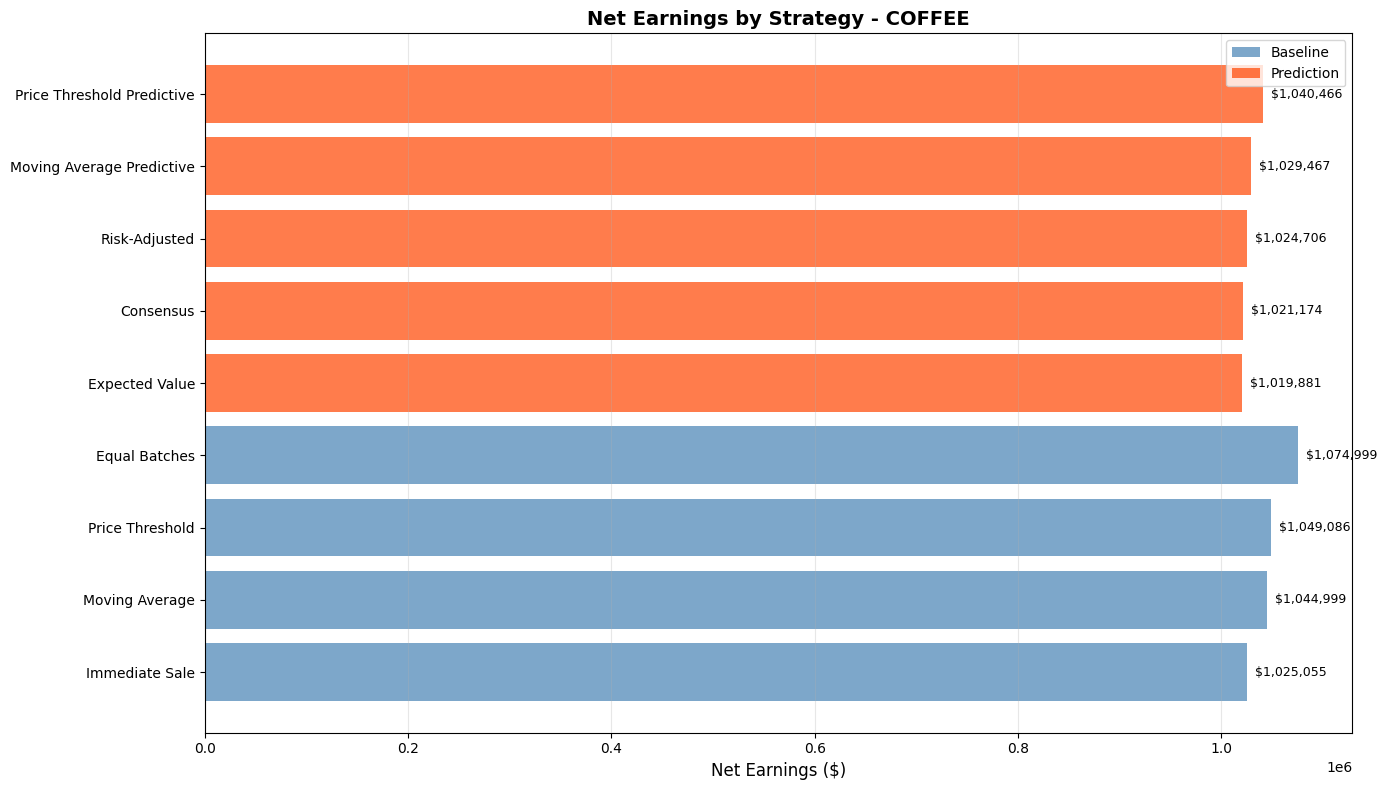


Generating trading timeline visualization...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/trading_timeline_coffee.png


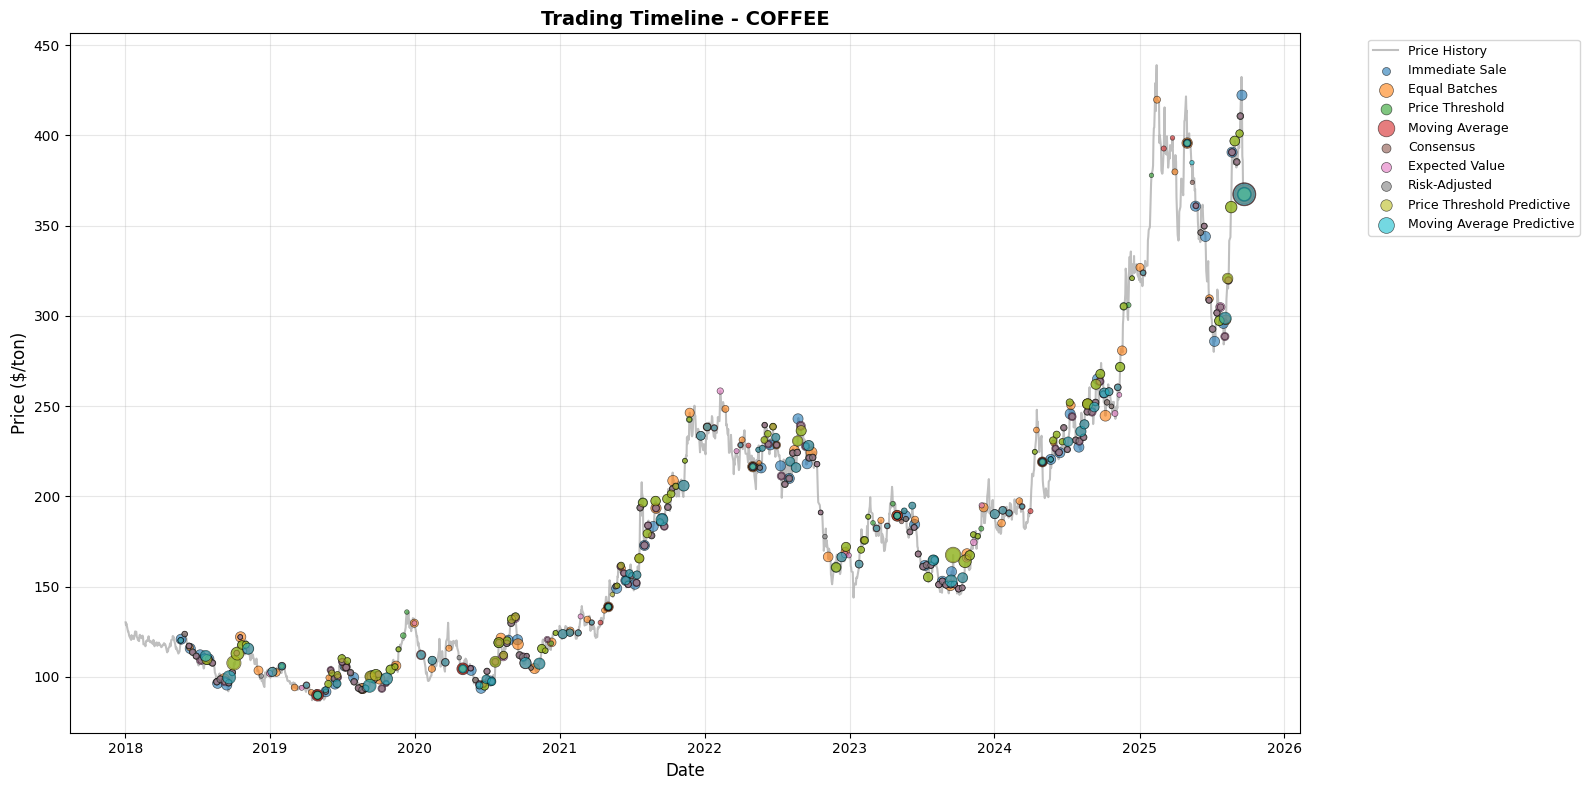


Generating total revenue (without costs) chart for COFFEE...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/total_revenue_no_costs_coffee.png


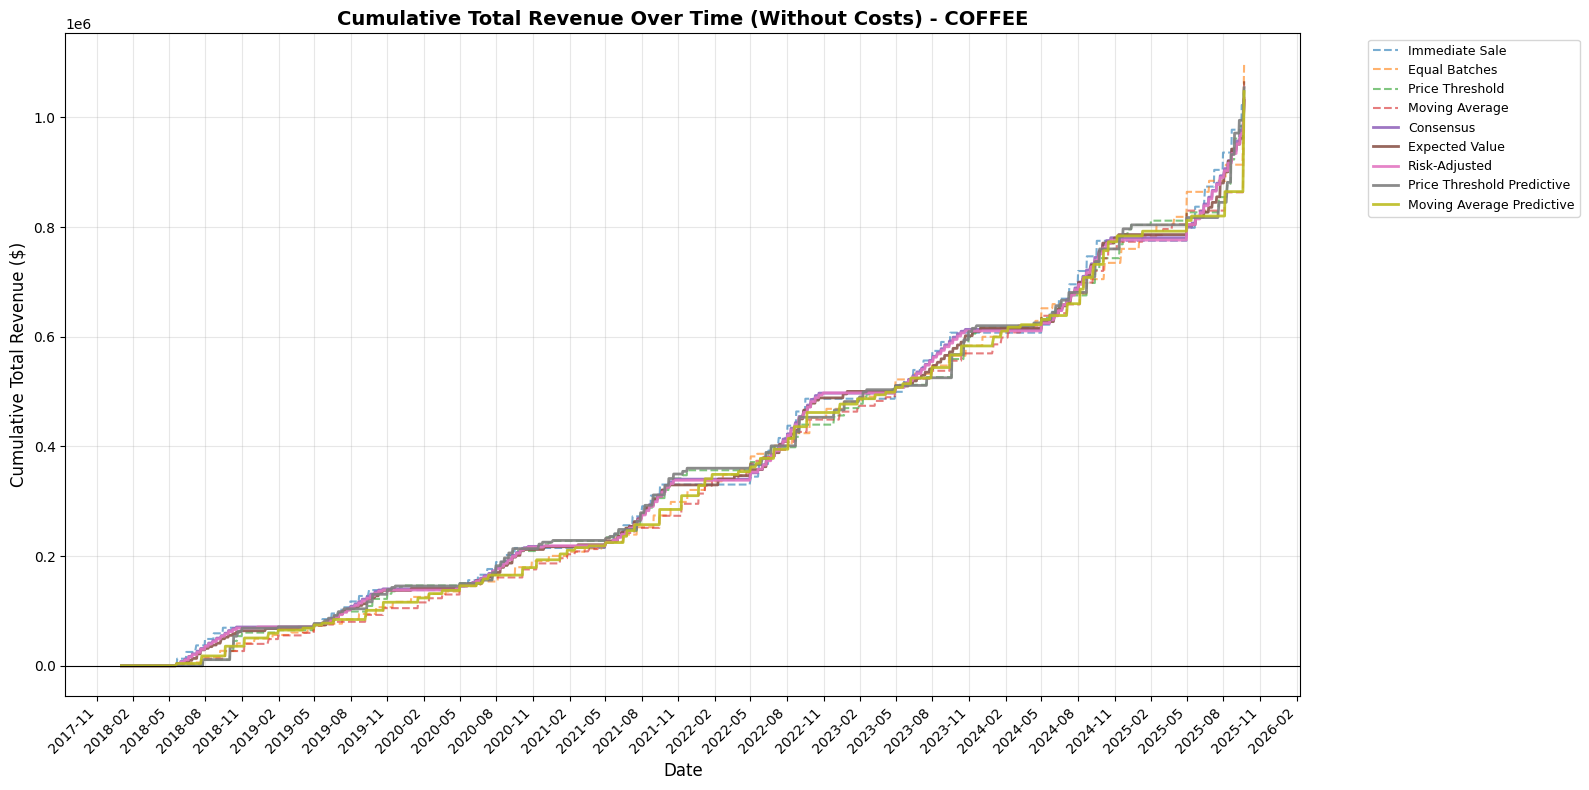


Generating cumulative net revenue chart for COFFEE...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/cumulative_returns_coffee.png


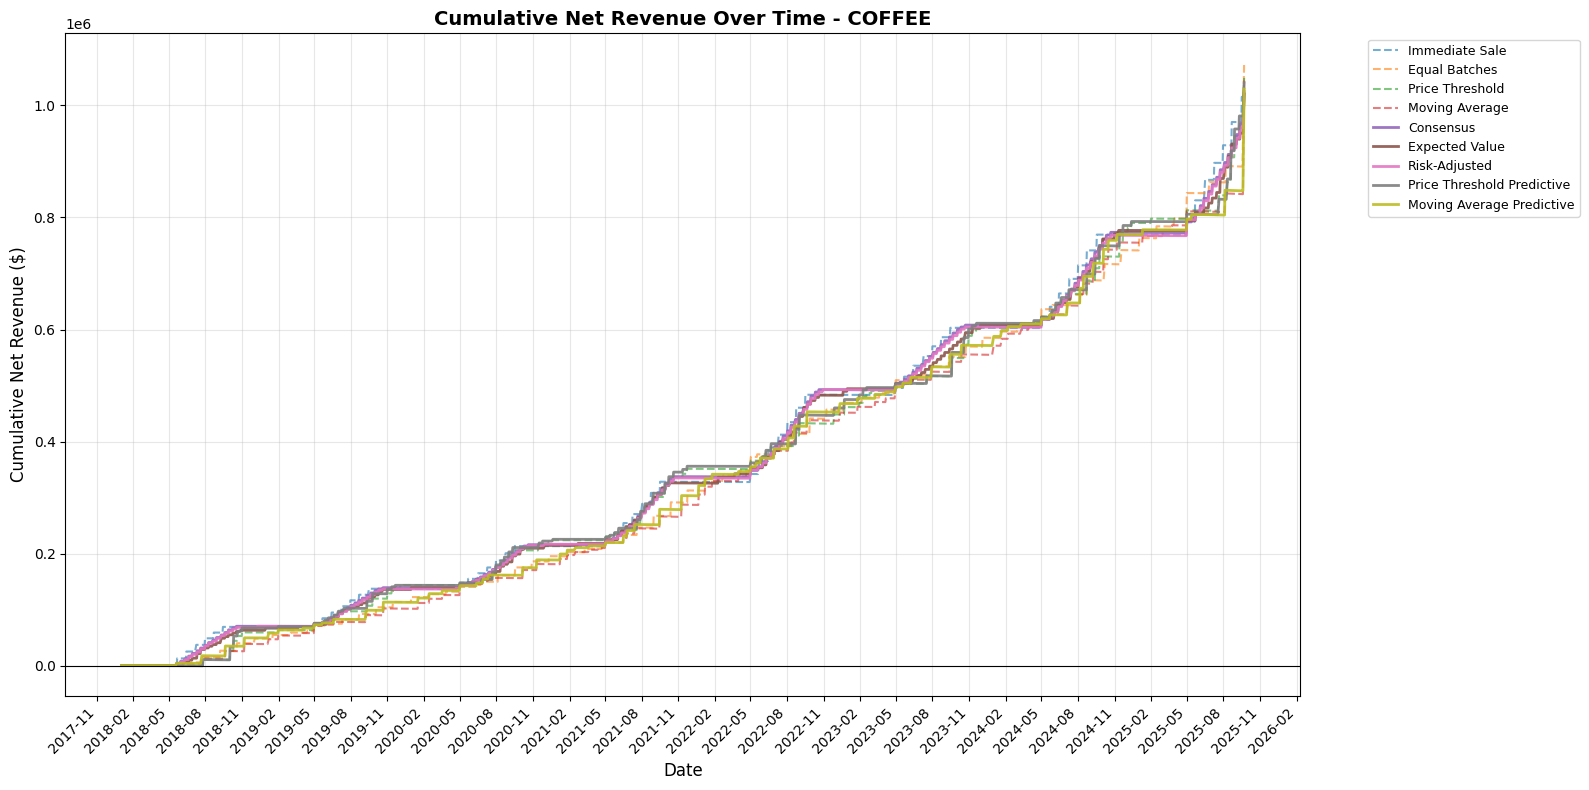


Generating inventory drawdown chart for COFFEE...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/inventory_drawdown_coffee.png


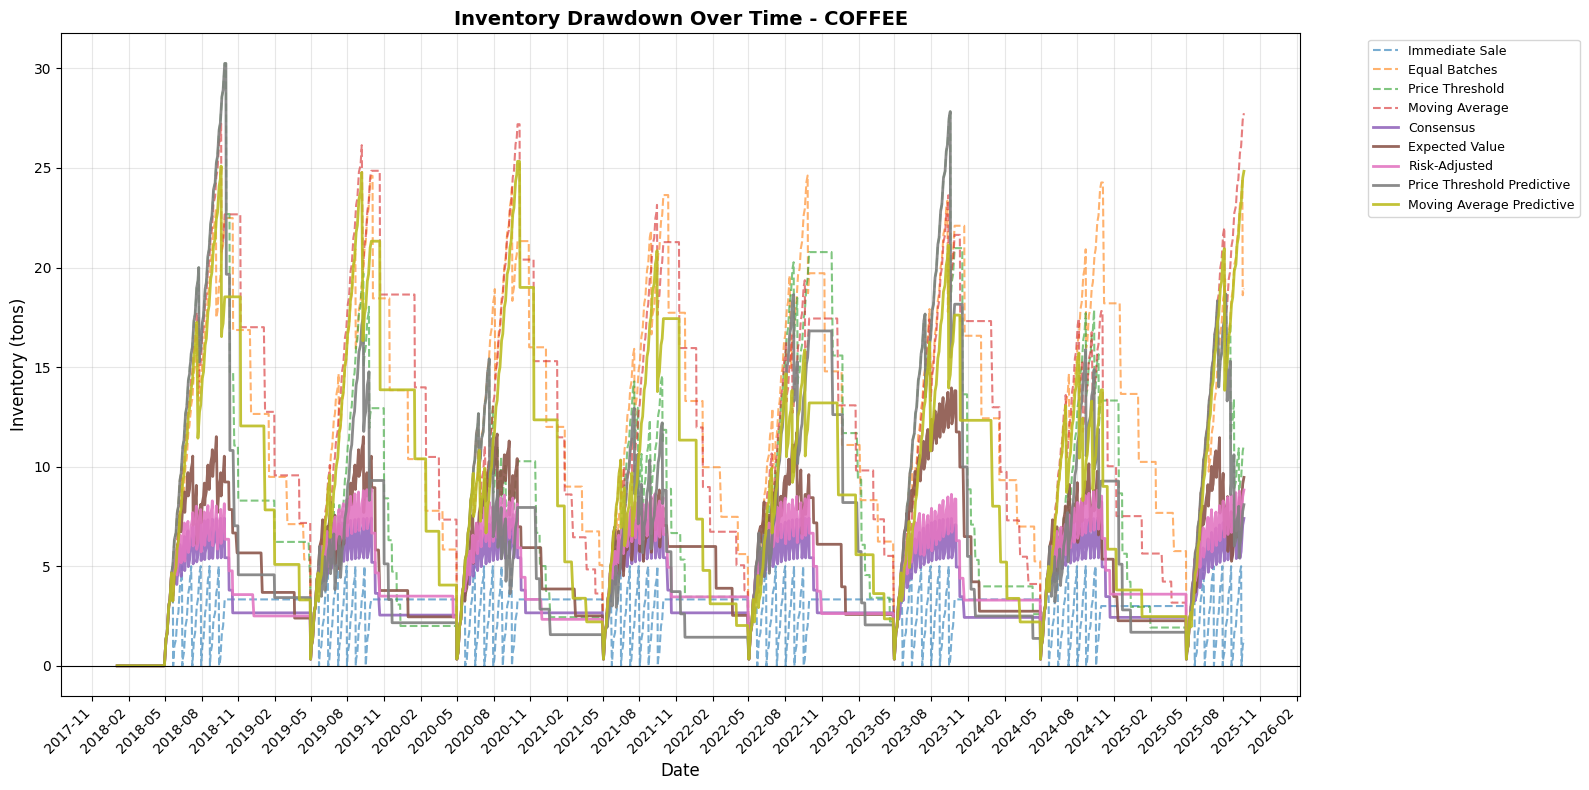


✓ Analysis complete for COFFEE

STARTING ANALYSIS FOR: SUGAR

Loading prepared data for SUGAR...
✓ Loaded SYNTHETIC predictions from: /Volumes/commodity/silver/trading_agent_volume/prediction_matrices_sugar.pkl
✓ Loaded 1944 days of prices
✓ Loaded 1944 prediction matrices (SYNTHETIC)

DATE ALIGNMENT DIAGNOSTIC

First 5 prediction keys:
  [0] 2018-01-02 00:00:00
      Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
      Repr: Timestamp('2018-01-02 00:00:00')
  [1] 2018-01-03 00:00:00
      Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
      Repr: Timestamp('2018-01-03 00:00:00')
  [2] 2018-01-04 00:00:00
      Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
      Repr: Timestamp('2018-01-04 00:00:00')
  [3] 2018-01-05 00:00:00
      Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
      Repr: Timestamp('2018-01-05 00:00:00')
  [4] 2018-01-08 00:00:00
      Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
      Repr: Timestamp('2018-01-08 0

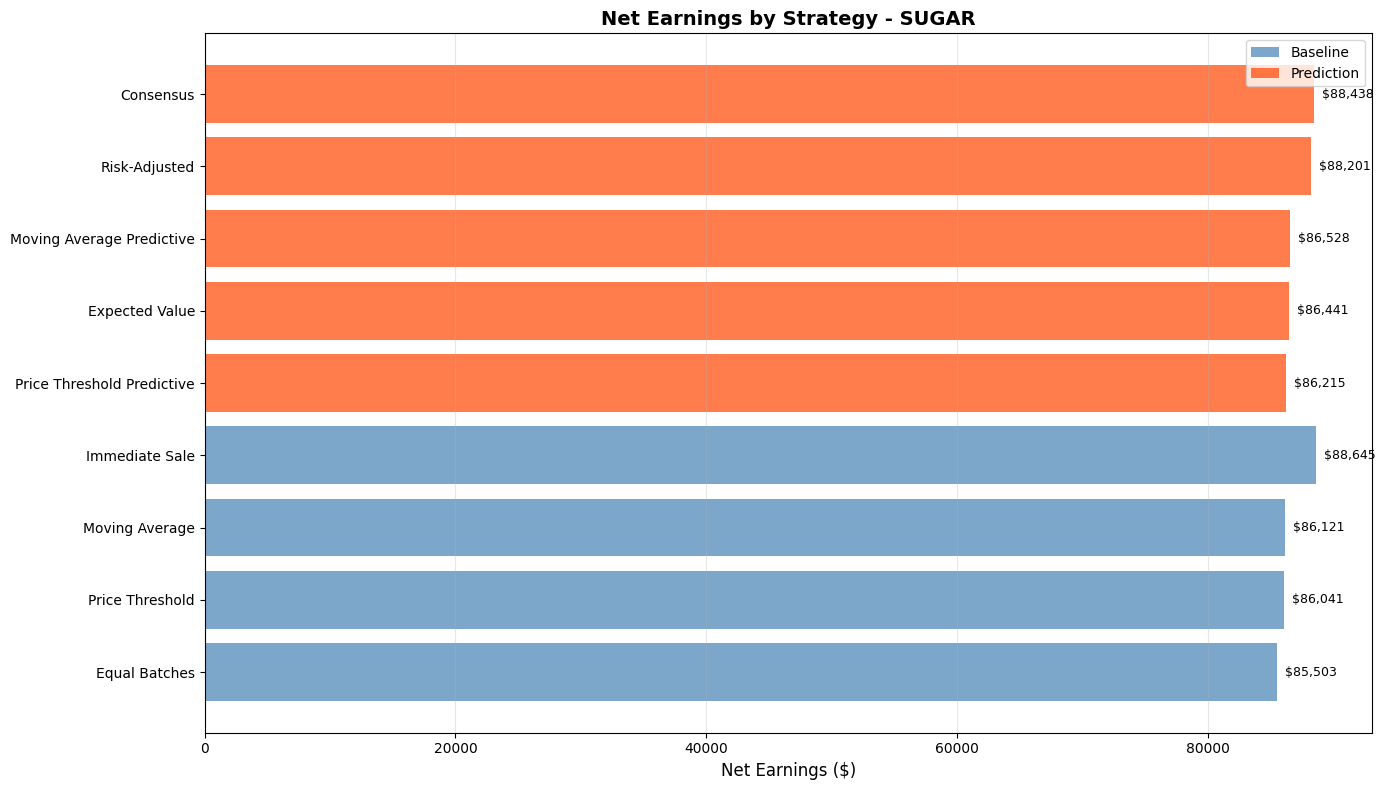


Generating trading timeline visualization...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/trading_timeline_sugar.png


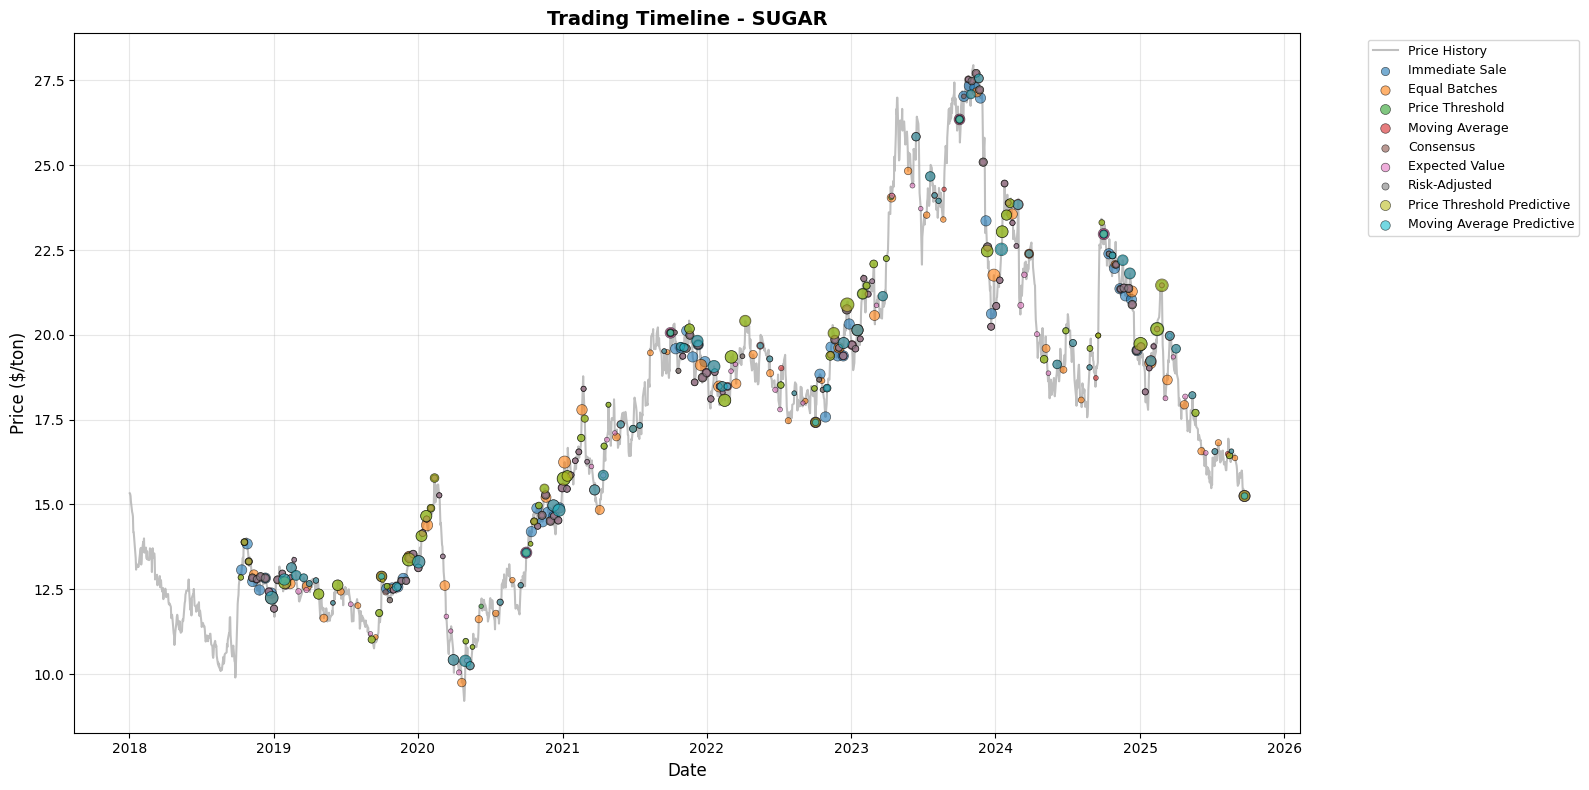


Generating total revenue (without costs) chart for SUGAR...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/total_revenue_no_costs_sugar.png


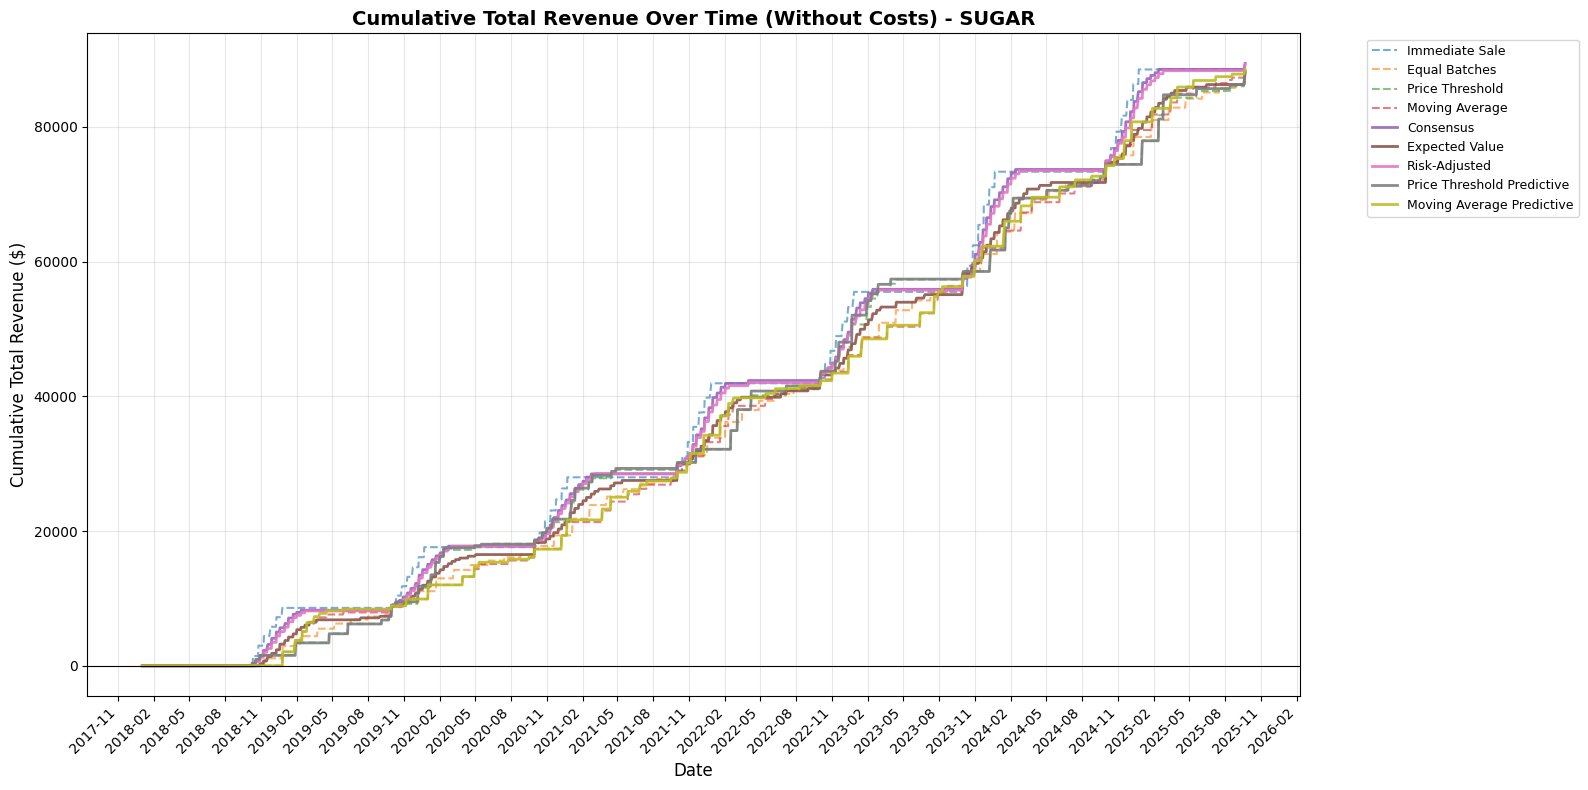


Generating cumulative net revenue chart for SUGAR...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/cumulative_returns_sugar.png


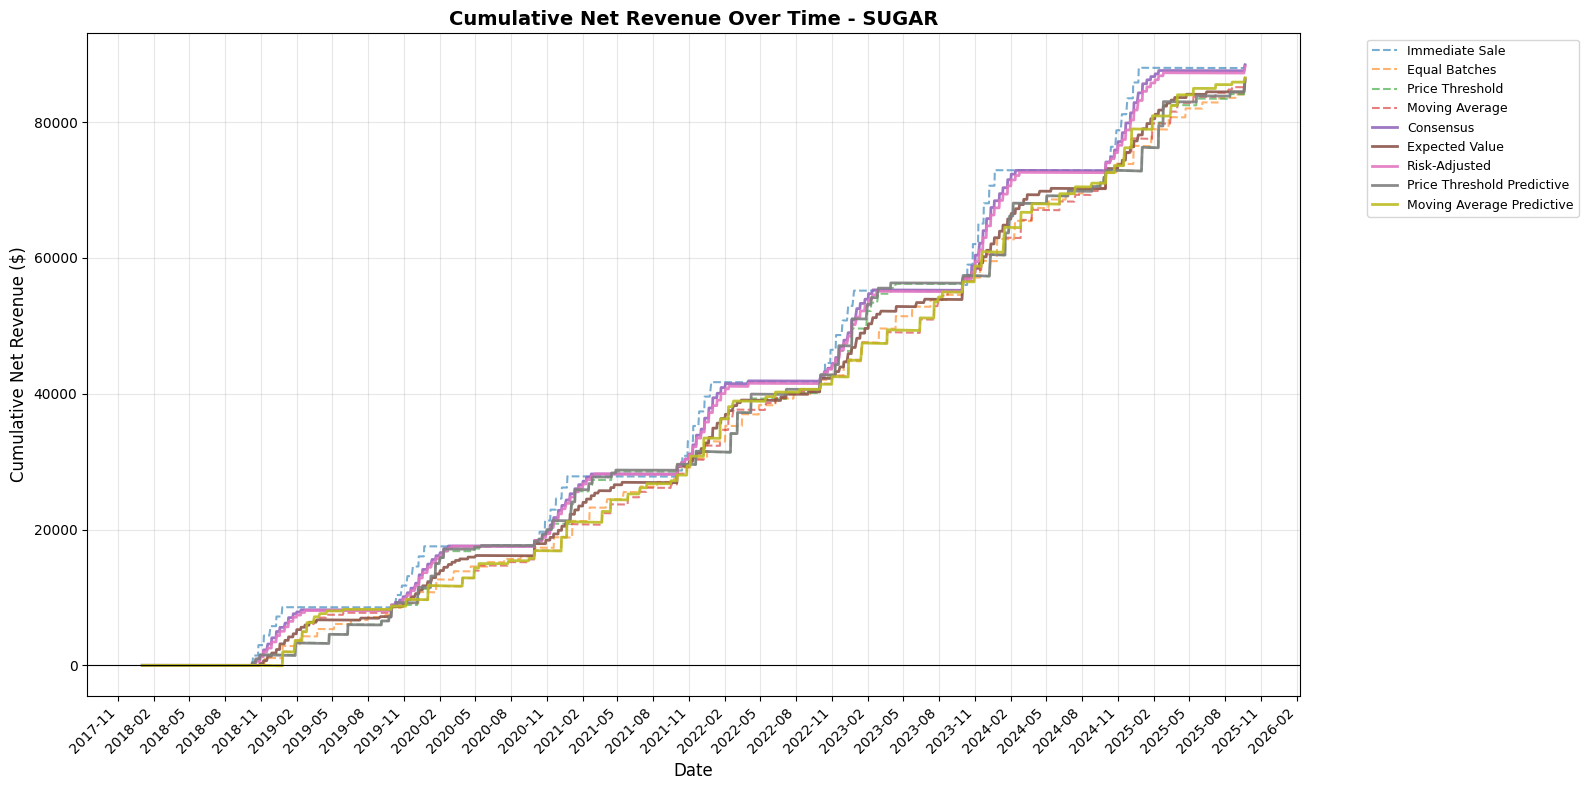


Generating inventory drawdown chart for SUGAR...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/inventory_drawdown_sugar.png


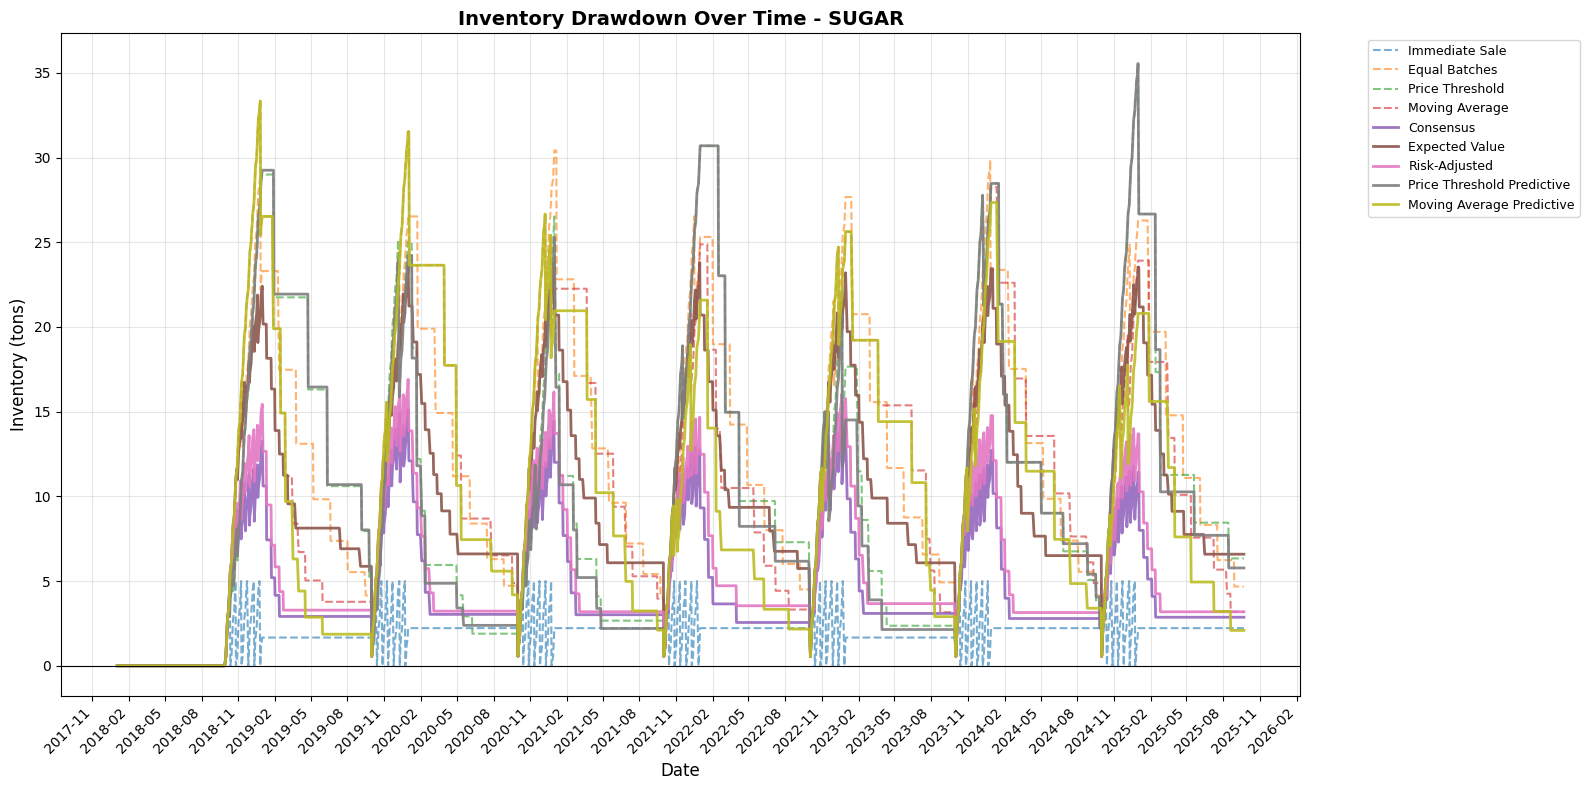


✓ Analysis complete for SUGAR

ALL COMMODITY ANALYSES COMPLETE

CROSS-COMMODITY COMPARISON

📊 Summary by Commodity:


Commodity Best Overall Strategy Best Overall Earnings Best Baseline Strategy Best Baseline Earnings Best Prediction Strategy Best Prediction Earnings Prediction Advantage ($) Prediction Advantage (%) COFFEE Equal Batches 1074998.6073450388 Equal Batches 1074998.6073450388 Price Threshold Predictive 1040465.8404244881 -34532.766920550726 -3.2123545727968423 SUGAR Immediate Sale 88645.06398135291 Immediate Sale 88645.06398135291 Consensus 88438.16200600154 -206.90197535137122 -0.23340495912428294


KEY FINDINGS

💡 Best commodity for prediction-based strategies:
   SUGAR
   Advantage: $-206.90
   (-0.2% improvement)

Generating cross-commodity comparison chart...
✓ Saved: /Volumes/commodity/silver/trading_agent_volume/cross_commodity_comparison.png


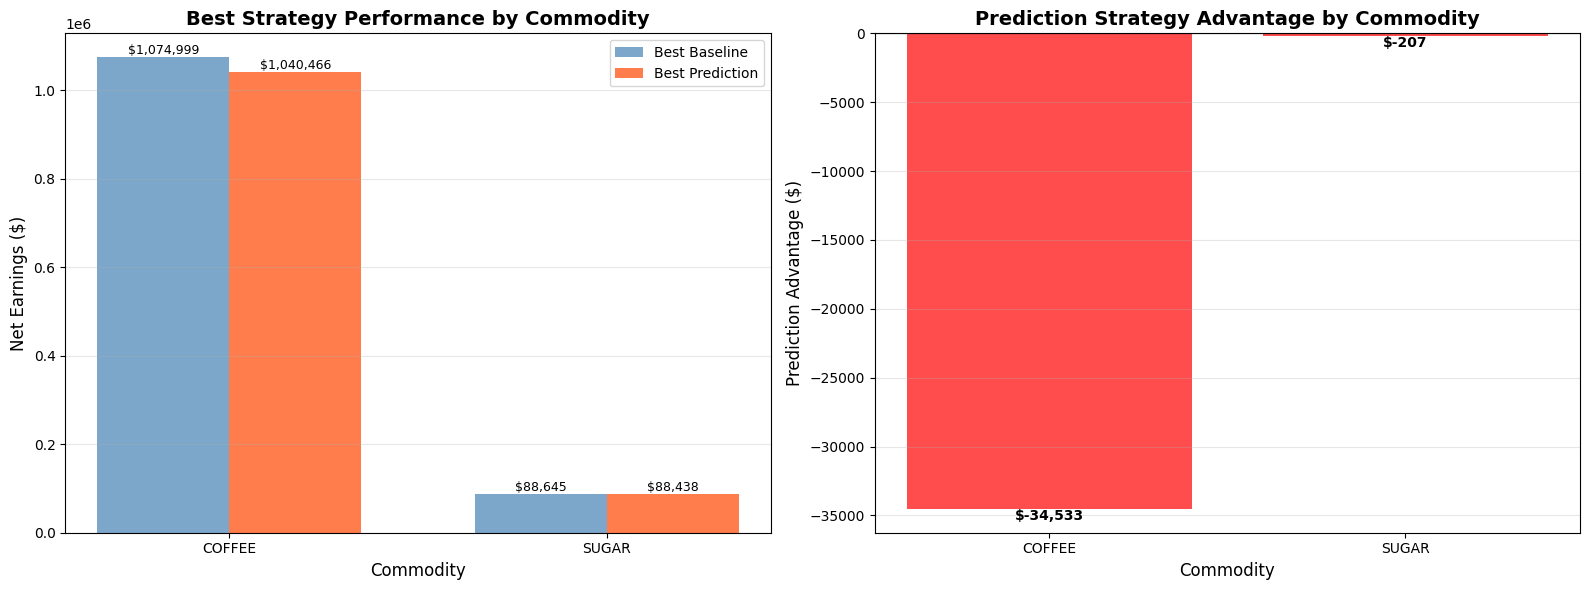

✓ Saved: /Volumes/commodity/silver/trading_agent_volume/cross_commodity_summary.csv

MULTI-COMMODITY COMPARATIVE ANALYSIS COMPLETE

Results saved to: /Volumes/commodity/silver/trading_agent_volume

Commodities analyzed: COFFEE, SUGAR
Strategies tested per commodity: 9
  - 4 Baseline strategies
  - 5 Prediction-based strategies (3 enhanced + 2 A/B test)

✓ All analyses complete!
Forced liquidation amounts:
  2019-10-01:   3.28 tons - new_harvest_starting_liquidate_old_inventory
  2020-10-01:   3.23 tons - new_harvest_starting_liquidate_old_inventory
  2021-10-01:   3.19 tons - new_harvest_starting_liquidate_old_inventory
  2022-10-03:   3.54 tons - new_harvest_starting_liquidate_old_inventory
  2023-10-02:   3.67 tons - new_harvest_starting_liquidate_old_inventory
  2024-10-01:   3.14 tons - new_harvest_starting_liquidate_old_inventory
  2025-09-22:   3.19 tons - end_of_simulation_forced_liquidation

Total: 23.24 tons across 7 events
Average: 3.32 tons per liquidation
% of total harvest

In [0]:
# NOTEBOOK 04: RUN COMPARATIVE ANALYSIS (UPDATED)
# ============================================================================
# Databricks notebook source
# MAGIC %md
# MAGIC # Run Comparative Analysis - All Commodities
# MAGIC 
# MAGIC Runs backtest analysis for all configured commodities sequentially.
# MAGIC Generates commodity-specific results and cross-commodity comparisons.
# MAGIC 
# MAGIC **Tests 9 Strategies:**
# MAGIC - 4 Baselines: Immediate Sale, Equal Batch, Price Threshold, Moving Average
# MAGIC - 5 Prediction-based: Consensus, Expected Value, Risk-Adjusted, Price Threshold Predictive, MA Predictive
# MAGIC 
# MAGIC **Updates:**
# MAGIC - Added Total Revenue (Without Costs) visualization
# MAGIC - Enhanced scenario tracking for Risk-Adjusted strategy
# MAGIC - Includes 2 NEW A/B test strategies (predictive versions of baseline strategies)
# MAGIC - All existing functionality preserved

# COMMAND ----------

#### MAGIC %run ./00_setup_and_config
#### MAGIC %run ./02_strategy_implementations
#### MAGIC %run ./03_backtesting_engine

# COMMAND ----------

import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# COMMAND ----------

# MAGIC %md
# MAGIC ## Run Analysis for All Commodities

# COMMAND ----------

# Store results for all commodities
all_commodity_results = {}

# Loop through each commodity
for CURRENT_COMMODITY in COMMODITY_CONFIGS.keys():
    print("\n" + "=" * 80)
    print(f"STARTING ANALYSIS FOR: {CURRENT_COMMODITY.upper()}")
    print("=" * 80)
    
    # Get commodity-specific configuration
    commodity_config = COMMODITY_CONFIGS[CURRENT_COMMODITY]
    DATA_PATHS = get_data_paths(CURRENT_COMMODITY)
    
    # --------------------------------------------------------------------------
    # Load prepared data
    # --------------------------------------------------------------------------
    print(f"\nLoading prepared data for {CURRENT_COMMODITY.upper()}...")
    
    if USE_DELTA:
        prices = spark.table(DATA_PATHS['prices_prepared']).toPandas()
    else:
        prices = pd.read_csv(DATA_PATHS['prices_prepared'], parse_dates=['date'])
    
    prices['date'] = pd.to_datetime(prices['date'])

    prediction_matrices, predictions_source = load_prediction_matrices(CURRENT_COMMODITY)
    
    print(f"✓ Loaded {len(prices)} days of prices")
    print(f"✓ Loaded {len(prediction_matrices)} prediction matrices ({predictions_source})")

    # ========================================================================
    # DIAGNOSTIC CODE - Check date alignment
    # ========================================================================
    print("\n" + "=" * 80)
    print("DATE ALIGNMENT DIAGNOSTIC")
    print("=" * 80)
    
    # Sample prediction keys
    pred_keys = list(prediction_matrices.keys())
    print(f"\nFirst 5 prediction keys:")
    for idx in range(min(5, len(pred_keys))):
        k = pred_keys[idx]
        print(f"  [{idx}] {k}")
        print(f"      Type: {type(k)}")
        print(f"      Repr: {repr(k)}")
    
    # Sample price dates
    price_dates = prices['date'].tolist()
    print(f"\nFirst 5 price dates:")
    for idx in range(min(5, len(price_dates))):
        d = price_dates[idx]
        print(f"  [{idx}] {d}")
        print(f"      Type: {type(d)}")
        print(f"      Repr: {repr(d)}")
    
    # Check overlap
    pred_set = set(pred_keys)
    price_set = set(price_dates)
    overlap = pred_set.intersection(price_set)
    
    print(f"\nOverlap Analysis:")
    print(f"  Total prediction keys: {len(pred_set)}")
    print(f"  Total price dates: {len(price_set)}")
    print(f"  Matching dates: {len(overlap)}")
    print(f"  Match rate: {100*len(overlap)/len(pred_set) if len(pred_set) > 0 else 0:.1f}%")
    
    if len(overlap) == 0:
        print("\n❌ ERROR: NO MATCHING DATES!")
        print("\nTesting first prediction key:")
        test_key = pred_keys[0]
        print(f"  Test key: {test_key}")
        print(f"  Test key in price_set: {test_key in price_set}")
        
        # Try normalizing
        import pandas as pd
        test_normalized = pd.Timestamp(test_key).normalize()
        print(f"  Normalized: {test_normalized}")
        print(f"  Normalized in price_set: {test_normalized in price_set}")
        
        # Check if any dates are close
        test_date_only = str(test_key).split()[0]
        matching_prices = [d for d in price_dates if str(d).startswith(test_date_only)]
        print(f"  Prices starting with {test_date_only}: {len(matching_prices)}")
        if matching_prices:
            print(f"    Example: {matching_prices[0]}")
    else:
        print("\n✓ SUCCESS: Dates are aligned!")
    
    print("=" * 80)
    # ========================================================================

    
    # Inspect prediction structure
    if len(prediction_matrices) > 0:
        sample_matrix = list(prediction_matrices.values())[0]
        print(f"✓ Prediction structure: {sample_matrix.shape[0]} runs × {sample_matrix.shape[1]} horizons")    

    # with open(DATA_PATHS['prediction_matrices'], 'rb') as f:
    #     prediction_matrices = pickle.load(f)
    
    # print(f"✓ Loaded {len(prices)} days of prices")
    # print(f"✓ Loaded {len(prediction_matrices)} prediction matrices")

    # ========================================================================
    # DIAGNOSTIC CODE - Check date alignment
    # ========================================================================
    print("\n" + "=" * 80)
    print("DATE ALIGNMENT DIAGNOSTIC")
    print("=" * 80)
    
    # Sample prediction keys
    pred_keys = list(prediction_matrices.keys())
    print(f"\nFirst 5 prediction keys:")
    for idx in range(min(5, len(pred_keys))):
        k = pred_keys[idx]
        print(f"  [{idx}] {k}")
        print(f"      Type: {type(k)}")
        print(f"      Repr: {repr(k)}")
    
    # Sample price dates
    price_dates = prices['date'].tolist()
    print(f"\nFirst 5 price dates:")
    for idx in range(min(5, len(price_dates))):
        d = price_dates[idx]
        print(f"  [{idx}] {d}")
        print(f"      Type: {type(d)}")
        print(f"      Repr: {repr(d)}")
    
    # Check overlap
    pred_set = set(pred_keys)
    price_set = set(price_dates)
    overlap = pred_set.intersection(price_set)
    
    print(f"\nOverlap Analysis:")
    print(f"  Total prediction keys: {len(pred_set)}")
    print(f"  Total price dates: {len(price_set)}")
    print(f"  Matching dates: {len(overlap)}")
    print(f"  Match rate: {100*len(overlap)/len(pred_set) if len(pred_set) > 0 else 0:.1f}%")
    
    if len(overlap) == 0:
        print("\n❌ ERROR: NO MATCHING DATES!")
        print("\nTesting first prediction key:")
        test_key = pred_keys[0]
        print(f"  Test key: {test_key}")
        print(f"  Test key in price_set: {test_key in price_set}")
        
        # Try normalizing
        import pandas as pd
        test_normalized = pd.Timestamp(test_key).normalize()
        print(f"  Normalized: {test_normalized}")
        print(f"  Normalized in price_set: {test_normalized in price_set}")
        
        # Check if any dates are close
        test_date_only = str(test_key).split()[0]
        matching_prices = [d for d in price_dates if str(d).startswith(test_date_only)]
        print(f"  Prices starting with {test_date_only}: {len(matching_prices)}")
        if matching_prices:
            print(f"    Example: {matching_prices[0]}")
    else:
        print("\n✓ SUCCESS: Dates are aligned!")
    
    print("=" * 80)
    # ========================================================================

    
    # # Inspect prediction structure
    # if len(prediction_matrices) > 0:
    #     sample_matrix = list(prediction_matrices.values())[0]
    #     print(f"✓ Prediction structure: {sample_matrix.shape[0]} runs × {sample_matrix.shape[1]} horizons")
    
    # --------------------------------------------------------------------------
    # Initialize strategies
    # --------------------------------------------------------------------------
    print("\nInitializing strategies...")
    
    baselines = [
        ImmediateSaleStrategy(),
        EqualBatchStrategy(**BASELINE_PARAMS['equal_batch']),
        PriceThresholdStrategy(
            threshold_pct=BASELINE_PARAMS['price_threshold']['threshold_pct']
        ),
        MovingAverageStrategy(
            ma_period=BASELINE_PARAMS['moving_average']['ma_period']
        )
    ]
    
    prediction_strategies = [
        ConsensusStrategy(**PREDICTION_PARAMS['consensus']),
        ExpectedValueStrategy(
            storage_cost_pct_per_day=commodity_config['storage_cost_pct_per_day'],
            transaction_cost_pct=commodity_config['transaction_cost_pct'],
            **PREDICTION_PARAMS['expected_value']
        ),
        RiskAdjustedStrategy(**PREDICTION_PARAMS['risk_adjusted']),
        # NEW A/B Test Strategies
        PriceThresholdPredictive(
            threshold_pct=BASELINE_PARAMS['price_threshold']['threshold_pct'],
            batch_fraction=0.25,
            max_days_without_sale=60
        ),
        MovingAveragePredictive(
            ma_period=BASELINE_PARAMS['moving_average']['ma_period'],
            batch_fraction=0.25,
            max_days_without_sale=60
        )
    ]
    
    all_strategies = baselines + prediction_strategies
    
    print(f"✓ {len(baselines)} baseline strategies")
    print(f"✓ {len(prediction_strategies)} prediction-based strategies (3 enhanced + 2 A/B test)")
    print(f"Total: {len(all_strategies)} strategies to test")
    
    # --------------------------------------------------------------------------
    # Run backtests
    # --------------------------------------------------------------------------
    print("\n" + "=" * 80)
    print(f"RUNNING BACKTESTS - {CURRENT_COMMODITY.upper()}")
    print("=" * 80)
    
    engine = BacktestEngine(prices, prediction_matrices, commodity_config)
    
    results_dict = {}
    metrics_list = []
    
    for i, strategy in enumerate(all_strategies, 1):
        print(f"\n[{i}/{len(all_strategies)}] Running: {strategy.name}...")
        results = engine.run(strategy)
        metrics = calculate_metrics(results)
        results_dict[strategy.name] = results
        metrics_list.append(metrics)
        
        print(f"  Total Revenue:  ${metrics['total_revenue']:,.2f}")
        print(f"  Net Earnings:   ${metrics['net_earnings']:,.2f}")
        print(f"  Avg Sale Price: ${metrics['avg_sale_price']:.2f}")
        print(f"  Total Costs:    ${metrics['total_costs']:,.2f}") 
        print(f"  Trades:         {metrics['n_trades']}")
    
    print("\n" + "=" * 80)
    print("BACKTESTS COMPLETE")
    print("=" * 80)
    
    # --------------------------------------------------------------------------
    # Analyze Risk-Adjusted Strategy Scenarios
    # --------------------------------------------------------------------------
    print("\nAnalyzing Risk-Adjusted Strategy Scenarios...")
    
    if 'Risk-Adjusted' in results_dict:
        risk_adj_results = results_dict['Risk-Adjusted']
        trades = risk_adj_results['trades']
        
        # DEBUG: Print actual trade reasons
        print("\nDEBUG - All Risk-Adjusted Trade Reasons:")
        reason_counts = {}
        for trade in trades:
            reason = trade.get('reason', 'UNKNOWN')
            reason_counts[reason] = reason_counts.get(reason, 0) + 1
        
        for reason, count in sorted(reason_counts.items(), key=lambda x: x[1], reverse=True):
            print(f"  {count:2d}× {reason}")
        print()
        
        # Extract scenario counts from trade reasons
        # scenario_counts = {
        #     'strong_bullish': 0,
        #     'confident_bullish': 0,
        #     'decelerating': 0,
        #     'high_uncertainty': 0,
        #     'low_confidence': 0,
        #     'confident_bearish': 0,
        #     'other': 0
        # }
        
        # for trade in trades:
        #     reason = trade.get('reason', '')
        #     if 'strong_bullish' in reason:
        #         scenario_counts['strong_bullish'] += 1
        #     elif 'confident_bullish' in reason:
        #         scenario_counts['confident_bullish'] += 1
        #     elif 'decelerating' in reason:
        #         scenario_counts['decelerating'] += 1
        #     elif 'high_uncertainty' in reason or 'choppy' in reason:
        #         scenario_counts['high_uncertainty'] += 1
        #     elif 'low_confidence' in reason:
        #         scenario_counts['low_confidence'] += 1
        #     elif 'confident_bearish' in reason or 'reversal' in reason or 'breakdown' in reason:
        #         scenario_counts['confident_bearish'] += 1
        #     else:
        #         scenario_counts['other'] += 1

        scenario_counts = {
            'very_low_risk_8pct': 0,
            'low_risk_12pct': 0,
            'medium_risk_18pct': 0,
            'med_high_risk_25pct': 0,
            'high_risk_30pct': 0,
            'very_high_risk_40pct': 0,
            'other': 0
        }
        
        for trade in trades:
            reason = trade.get('reason', '')
            if 'very_low_risk' in reason or ('cv' in reason and 'defer' in reason):
                scenario_counts['very_low_risk_8pct'] += 1
            elif 'low_risk' in reason and 'ret' in reason:
                scenario_counts['low_risk_12pct'] += 1
            elif 'medium_risk' in reason and 'baseline' in reason:
                scenario_counts['medium_risk_18pct'] += 1
            elif 'med_high_risk' in reason or 'weak_trend' in reason:
                scenario_counts['med_high_risk_25pct'] += 1
            elif 'high_risk' in reason and 'reduce_exposure' in reason:
                scenario_counts['high_risk_30pct'] += 1
            elif 'very_high_risk' in reason or 'exit_fast' in reason:
                scenario_counts['very_high_risk_40pct'] += 1
            else:
                scenario_counts['other'] += 1
        
        # print("Risk-Adjusted Strategy - Scenario Distribution:")
        # print(f"  Strong Bullish (8% batch):      {scenario_counts['strong_bullish']} trades")
        # print(f"  Confident Bullish (12% batch):  {scenario_counts['confident_bullish']} trades")
        # print(f"  Decelerating (15% batch):       {scenario_counts['decelerating']} trades")
        # print(f"  High Uncertainty (18% batch):   {scenario_counts['high_uncertainty']} trades")
        # print(f"  Low Confidence (25% batch):     {scenario_counts['low_confidence']} trades")
        # print(f"  Confident Bearish (30% batch):  {scenario_counts['confident_bearish']} trades")
        # print(f"  Other (deadline/fallback):      {scenario_counts['other']} trades")

        print("Risk-Adjusted Strategy - Scenario Distribution:")
        print(f"  Very Low Risk (8% batch):       {scenario_counts['very_low_risk_8pct']} trades")
        print(f"  Low Risk (12% batch):           {scenario_counts['low_risk_12pct']} trades")
        print(f"  Medium Risk (18% batch):        {scenario_counts['medium_risk_18pct']} trades")
        print(f"  Med-High Risk (25% batch):      {scenario_counts['med_high_risk_25pct']} trades")
        print(f"  High Risk (30% batch):          {scenario_counts['high_risk_30pct']} trades")
        print(f"  Very High Risk (40% batch):     {scenario_counts['very_high_risk_40pct']} trades")
        print(f"  Other (deadline/fallback):      {scenario_counts['other']} trades")
    
    # --------------------------------------------------------------------------
    # Create results table
    # --------------------------------------------------------------------------
    results_df = pd.DataFrame(metrics_list)
    baseline_names = [s.name for s in baselines]
    results_df['type'] = results_df['strategy'].apply(
        lambda x: 'Baseline' if x in baseline_names else 'Prediction'
    )
    results_df['commodity'] = CURRENT_COMMODITY  # Add commodity identifier
    
    # Sort by net earnings
    results_df = results_df.sort_values('net_earnings', ascending=False)
    
    # --------------------------------------------------------------------------
    # Identify best performers
    # --------------------------------------------------------------------------
    best_baseline = results_df[results_df['type'] == 'Baseline'].iloc[0]
    best_prediction = results_df[results_df['type'] == 'Prediction'].iloc[0]
    best_overall = results_df.iloc[0]
    
    # Calculate advantage
    earnings_diff = best_prediction['net_earnings'] - best_baseline['net_earnings']
    pct_diff = (earnings_diff / abs(best_baseline['net_earnings'])) * 100 if best_baseline['net_earnings'] != 0 else 0
    
    print("\n" + "=" * 80)
    print(f"RESULTS SUMMARY - {CURRENT_COMMODITY.upper()}")
    print("=" * 80)
    print(f"\n🏆 Best Overall: {best_overall['strategy']}")
    print(f"   Net Earnings: ${best_overall['net_earnings']:,.2f}")
    print(f"\n📊 Best Baseline: {best_baseline['strategy']}")
    print(f"   Net Earnings: ${best_baseline['net_earnings']:,.2f}")
    print(f"\n🎯 Best Prediction: {best_prediction['strategy']}")
    print(f"   Net Earnings: ${best_prediction['net_earnings']:,.2f}")
    print(f"\n📈 Prediction Advantage: ${earnings_diff:+,.2f} ({pct_diff:+.1f}%)")
    
    # --------------------------------------------------------------------------
    # Save results
    # --------------------------------------------------------------------------
    print("\nSaving results...")
    
    if USE_DELTA:
        spark.createDataFrame(results_df).write.format("delta").mode("overwrite") \
            .saveAsTable(DATA_PATHS['results'])
        print(f"  ✓ Saved to Delta: {DATA_PATHS['results']}")
    else:
        results_df.to_csv(DATA_PATHS['results'], index=False)
        print(f"  ✓ Saved: {DATA_PATHS['results']}")
    
    with open(DATA_PATHS['results_detailed'], 'wb') as f:
        pickle.dump(results_dict, f)
    print(f"  ✓ Saved: {DATA_PATHS['results_detailed']}")
    
    # --------------------------------------------------------------------------
    # Generate visualizations
    # --------------------------------------------------------------------------
    print("\nGenerating visualizations...")
    
    # Net earnings chart
    fig, ax = plt.subplots(figsize=(14, 8))
    baseline_data = results_df[results_df['type'] == 'Baseline'].sort_values('net_earnings', ascending=True)
    prediction_data = results_df[results_df['type'] == 'Prediction'].sort_values('net_earnings', ascending=True)
    
    y_baseline = range(len(baseline_data))
    y_prediction = range(len(baseline_data), len(baseline_data) + len(prediction_data))
    
    ax.barh(y_baseline, baseline_data['net_earnings'], color='steelblue', alpha=0.7, label='Baseline')
    ax.barh(y_prediction, prediction_data['net_earnings'], color='orangered', alpha=0.7, label='Prediction')
    
    all_strategies_sorted = pd.concat([baseline_data, prediction_data])
    ax.set_yticks(range(len(all_strategies_sorted)))
    ax.set_yticklabels(all_strategies_sorted['strategy'])
    ax.set_xlabel('Net Earnings ($)', fontsize=12)
    ax.set_title(f'Net Earnings by Strategy - {CURRENT_COMMODITY.upper()}', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='x')
    
    for i, (idx, row) in enumerate(all_strategies_sorted.iterrows()):
        ax.text(row['net_earnings'], i, f"  ${row['net_earnings']:,.0f}", va='center', fontsize=9)
    
    plt.tight_layout()
    earnings_chart_path = f"{BASE_PATH}/net_earnings_{CURRENT_COMMODITY}.png"
    plt.savefig(earnings_chart_path, dpi=300, bbox_inches='tight')
    print(f"  ✓ Saved: {earnings_chart_path}")
    plt.show()
    plt.close()
    
    # --------------------------------------------------------------------------
    # Generate Trading Timeline Visualization
    # --------------------------------------------------------------------------
    print("\nGenerating trading timeline visualization...")
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Plot price history as background
    ax.plot(prices['date'], prices['price'], color='gray', linewidth=1.5, 
            alpha=0.5, label='Price History', zorder=1)
    
    # Color map for strategies
    colors = plt.cm.tab10(np.linspace(0, 1, len(all_strategies)))
    strategy_colors = dict(zip([s.name for s in all_strategies], colors))
    
    # Plot trades for each strategy
    for name, results in results_dict.items():
        trades = results['trades']
        if len(trades) > 0:
            trade_dates = [t['date'] for t in trades]
            trade_prices = [t['price'] for t in trades]
            trade_amounts = [t['amount'] for t in trades]
            
            # Marker size proportional to trade amount
            sizes = [amt * 10 for amt in trade_amounts]
            
            ax.scatter(trade_dates, trade_prices, s=sizes, alpha=0.6, 
                      color=strategy_colors[name], label=name, 
                      edgecolors='black', linewidth=0.5, zorder=2)
    
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price ($/ton)', fontsize=12)
    ax.set_title(f'Trading Timeline - {CURRENT_COMMODITY.upper()}', fontsize=14, fontweight='bold')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    timeline_path = f"{BASE_PATH}/trading_timeline_{CURRENT_COMMODITY}.png"
    plt.savefig(timeline_path, dpi=300, bbox_inches='tight')
    print(f"  ✓ Saved: {timeline_path}")
    plt.show()
    plt.close()
    
    # --------------------------------------------------------------------------
    # NEW: Total Revenue Without Costs Visualization
    # --------------------------------------------------------------------------
    print(f"\nGenerating total revenue (without costs) chart for {CURRENT_COMMODITY.upper()}...")
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Calculate and plot cumulative revenue for each strategy (no costs deducted)
    for name, results in results_dict.items():
        daily_state = results['daily_state']
        trades_by_day = {t['day']: t for t in results['trades']}
        
        # Build up cumulative revenue day by day
        cumulative_revenue = []
        dates = []
        running_revenue = 0
        
        for idx, row in daily_state.iterrows():
            day = row['day']
            date = row['date']
            
            # Add any sales revenue from today (no costs subtracted)
            if day in trades_by_day:
                trade = trades_by_day[day]
                running_revenue += trade['revenue']
            
            cumulative_revenue.append(running_revenue)
            dates.append(date)
        
        # Plot full time series
        is_pred = name not in [s.name for s in baselines]
        ax.plot(dates, cumulative_revenue, label=name,
                linestyle='-' if is_pred else '--',
                linewidth=2 if is_pred else 1.5,
                alpha=0.9 if is_pred else 0.6)
    
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Cumulative Total Revenue ($)', fontsize=12)
    ax.set_title(f'Cumulative Total Revenue Over Time (Without Costs) - {CURRENT_COMMODITY.upper()}', 
                 fontsize=14, fontweight='bold')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    
    # Format x-axis to show dates nicely
    import matplotlib.dates as mdates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    
    revenue_only_path = f'{BASE_PATH}/total_revenue_no_costs_{CURRENT_COMMODITY.lower()}.png'
    plt.savefig(revenue_only_path, dpi=300, bbox_inches='tight')
    print(f"  ✓ Saved: {revenue_only_path}")
    plt.show()
    plt.close()
    
    # --------------------------------------------------------------------------
    # Cumulative Net Revenue Visualization
    # --------------------------------------------------------------------------
    print(f"\nGenerating cumulative net revenue chart for {CURRENT_COMMODITY.upper()}...")
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Calculate and plot cumulative net revenue for each strategy
    for name, results in results_dict.items():
        # Use the final results which have correct totals
        total_revenue = results['total_revenue']
        total_transaction_costs = results['total_transaction_costs']
        total_storage_costs = results['total_storage_costs']
        final_net_earnings = results['net_earnings']
        
        daily_state = results['daily_state']
        trades_by_day = {t['day']: t for t in results['trades']}
        
        # Build up cumulative values day by day
        cumulative_net_revenue = []
        dates = []
        running_revenue = 0
        running_transaction_costs = 0
        running_storage_costs = 0
        
        for idx, row in daily_state.iterrows():
            day = row['day']
            date = row['date']
            
            # Add any sales revenue/costs from today
            if day in trades_by_day:
                trade = trades_by_day[day]
                running_revenue += trade['revenue']
                running_transaction_costs += trade['transaction_cost']
            
            # Add today's storage cost (= inventory * daily_rate)
            running_storage_costs += row['daily_storage_cost']
            
            # Net earnings to date
            net_revenue = running_revenue - running_transaction_costs - running_storage_costs
            cumulative_net_revenue.append(net_revenue)
            dates.append(date)
        
        # Verify final value matches
        if len(cumulative_net_revenue) > 0:
            final_calc = cumulative_net_revenue[-1]
            if abs(final_calc - final_net_earnings) > 1:
                print(f"  WARNING {name}: Final mismatch ${final_calc:.2f} vs ${final_net_earnings:.2f}")
        
        # Plot full time series
        is_pred = name not in [s.name for s in baselines]
        ax.plot(dates, cumulative_net_revenue, label=name,
                linestyle='-' if is_pred else '--',
                linewidth=2 if is_pred else 1.5,
                alpha=0.9 if is_pred else 0.6)
    
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Cumulative Net Revenue ($)', fontsize=12)
    ax.set_title(f'Cumulative Net Revenue Over Time - {CURRENT_COMMODITY.upper()}', 
                 fontsize=14, fontweight='bold')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    
    # Format x-axis to show dates nicely
    import matplotlib.dates as mdates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    
    cumulative_returns_path = f'{BASE_PATH}/cumulative_returns_{CURRENT_COMMODITY.lower()}.png'
    plt.savefig(cumulative_returns_path, dpi=300, bbox_inches='tight')
    print(f"  ✓ Saved: {cumulative_returns_path}")
    plt.show()
    plt.close()
    
    # --------------------------------------------------------------------------
    # Inventory Drawdown Visualization
    # --------------------------------------------------------------------------
    print(f"\nGenerating inventory drawdown chart for {CURRENT_COMMODITY.upper()}...")
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Plot inventory levels over time for each strategy
    for name, results in results_dict.items():
        daily_state = results['daily_state']
        
        dates = daily_state['date'].tolist()
        inventory = daily_state['inventory'].tolist()
        
        # Plot
        is_pred = name not in [s.name for s in baselines]
        ax.plot(dates, inventory, label=name,
                linestyle='-' if is_pred else '--',
                linewidth=2 if is_pred else 1.5,
                alpha=0.9 if is_pred else 0.6)
    
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Inventory (tons)', fontsize=12)
    ax.set_title(f'Inventory Drawdown Over Time - {CURRENT_COMMODITY.upper()}', 
                 fontsize=14, fontweight='bold')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    
    # Format x-axis
    import matplotlib.dates as mdates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    
    drawdown_path = f'{BASE_PATH}/inventory_drawdown_{CURRENT_COMMODITY.lower()}.png'
    plt.savefig(drawdown_path, dpi=300, bbox_inches='tight')
    print(f"  ✓ Saved: {drawdown_path}")
    plt.show()
    plt.close()
    
    # --------------------------------------------------------------------------
    # Store results for cross-commodity comparison
    # --------------------------------------------------------------------------
    all_commodity_results[CURRENT_COMMODITY] = {
        'commodity': CURRENT_COMMODITY,
        'results_df': results_df,
        'results_dict': results_dict,
        'best_baseline': best_baseline,
        'best_prediction': best_prediction,
        'best_overall': best_overall,
        'earnings_diff': earnings_diff,
        'pct_diff': pct_diff,
        'prices': prices,
        'config': commodity_config
    }
    
    print(f"\n✓ Analysis complete for {CURRENT_COMMODITY.upper()}")

# COMMAND ----------

# MAGIC %md
# MAGIC ## Cross-Commodity Comparison

# COMMAND ----------

print("\n" + "=" * 80)
print("ALL COMMODITY ANALYSES COMPLETE")
print("=" * 80)

print("\n" + "=" * 80)
print("CROSS-COMMODITY COMPARISON")
print("=" * 80)

comparison_data = []
for commodity_name, results in all_commodity_results.items():
    comparison_data.append({
        'Commodity': commodity_name.upper(),
        'Best Overall Strategy': results['best_overall']['strategy'],
        'Best Overall Earnings': results['best_overall']['net_earnings'],
        'Best Baseline Strategy': results['best_baseline']['strategy'],
        'Best Baseline Earnings': results['best_baseline']['net_earnings'],
        'Best Prediction Strategy': results['best_prediction']['strategy'],
        'Best Prediction Earnings': results['best_prediction']['net_earnings'],
        'Prediction Advantage ($)': results['earnings_diff'],
        'Prediction Advantage (%)': results['pct_diff']
    })

comparison_df = pd.DataFrame(comparison_data)

print("\n📊 Summary by Commodity:")
display(comparison_df)

# Determine which commodity benefits more from predictions
best_commodity_for_predictions = comparison_df.loc[comparison_df['Prediction Advantage ($)'].idxmax()]

print("\n" + "=" * 80)
print("KEY FINDINGS")
print("=" * 80)
print(f"\n💡 Best commodity for prediction-based strategies:")
print(f"   {best_commodity_for_predictions['Commodity']}")
print(f"   Advantage: ${best_commodity_for_predictions['Prediction Advantage ($)']:,.2f}")
print(f"   ({best_commodity_for_predictions['Prediction Advantage (%)']:.1f}% improvement)")

# COMMAND ----------

# MAGIC %md
# MAGIC ## Generate Cross-Commodity Visualization

# COMMAND ----------

print("\nGenerating cross-commodity comparison chart...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Best strategy earnings by commodity
commodity_names = [r['commodity'].upper() for r in all_commodity_results.values()]
best_baseline_earnings = [r['best_baseline']['net_earnings'] for r in all_commodity_results.values()]
best_prediction_earnings = [r['best_prediction']['net_earnings'] for r in all_commodity_results.values()]

x = np.arange(len(commodity_names))
width = 0.35

axes[0].bar(x - width/2, best_baseline_earnings, width, label='Best Baseline', color='steelblue', alpha=0.7)
axes[0].bar(x + width/2, best_prediction_earnings, width, label='Best Prediction', color='orangered', alpha=0.7)
axes[0].set_xlabel('Commodity', fontsize=12)
axes[0].set_ylabel('Net Earnings ($)', fontsize=12)
axes[0].set_title('Best Strategy Performance by Commodity', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(commodity_names)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (baseline, prediction) in enumerate(zip(best_baseline_earnings, best_prediction_earnings)):
    axes[0].text(i - width/2, baseline, f'${baseline:,.0f}', ha='center', va='bottom', fontsize=9)
    axes[0].text(i + width/2, prediction, f'${prediction:,.0f}', ha='center', va='bottom', fontsize=9)

# Chart 2: Prediction advantage by commodity
prediction_advantages = [r['earnings_diff'] for r in all_commodity_results.values()]
colors_advantage = ['green' if x > 0 else 'red' for x in prediction_advantages]

axes[1].bar(commodity_names, prediction_advantages, color=colors_advantage, alpha=0.7)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1].set_xlabel('Commodity', fontsize=12)
axes[1].set_ylabel('Prediction Advantage ($)', fontsize=12)
axes[1].set_title('Prediction Strategy Advantage by Commodity', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (commodity, advantage) in enumerate(zip(commodity_names, prediction_advantages)):
    axes[1].text(i, advantage, f'${advantage:+,.0f}', ha='center', 
                va='bottom' if advantage > 0 else 'top', fontsize=10, fontweight='bold')

plt.tight_layout()

cross_commodity_chart_path = f"{BASE_PATH}/cross_commodity_comparison.png"
plt.savefig(cross_commodity_chart_path, dpi=300, bbox_inches='tight')
print(f"✓ Saved: {cross_commodity_chart_path}")
plt.show()

# COMMAND ----------

# Save cross-commodity comparison
comparison_df.to_csv(f"{BASE_PATH}/cross_commodity_summary.csv", index=False)
print(f"✓ Saved: {BASE_PATH}/cross_commodity_summary.csv")

print("\n" + "=" * 80)
print("MULTI-COMMODITY COMPARATIVE ANALYSIS COMPLETE")
print("=" * 80)
print(f"\nResults saved to: {BASE_PATH}")
print(f"\nCommodities analyzed: {', '.join([c.upper() for c in COMMODITY_CONFIGS.keys()])}")
print(f"Strategies tested per commodity: {len(all_strategies)}")
print(f"  - 4 Baseline strategies")
print(f"  - 5 Prediction-based strategies (3 enhanced + 2 A/B test)")
print(f"\n✓ All analyses complete!")

# Quick check: How much is being liquidated?
import pickle
with open(DATA_PATHS['results_detailed'], 'rb') as f:
    results = pickle.load(f)

forced = [t for t in results['Risk-Adjusted']['trades'] 
          if 'liquidate' in t['reason'].lower() or 'forced' in t['reason'].lower()]

print(f"Forced liquidation amounts:")
for t in forced:
    print(f"  {str(t['date'])[:10]}: {t['amount']:6.2f} tons - {t['reason']}")

total = sum(t['amount'] for t in forced)
print(f"\nTotal: {total:.2f} tons across {len(forced)} events")
print(f"Average: {total/len(forced):.2f} tons per liquidation")
print(f"% of total harvest: {(total/(50*8))*100:.1f}%")

In [0]:

# NOTEBOOK 05: STATISTICAL VALIDATION (UPDATED)
# ============================================================================
# Databricks notebook source
# MAGIC %md
# MAGIC # Statistical Validation - All Commodities
# MAGIC 
# MAGIC Performs statistical tests comparing prediction vs baseline strategies.
# MAGIC Runs sequentially for all configured commodities.

# COMMAND ----------

# MAGIC %run ./00_setup_and_config

# COMMAND ----------

import pandas as pd
import numpy as np
from scipy import stats
import pickle

# COMMAND ----------

# MAGIC %md
# MAGIC ## Process All Commodities

# COMMAND ----------

# Loop through all commodities
for CURRENT_COMMODITY in COMMODITY_CONFIGS.keys():
    print("\n" + "=" * 80)
    print(f"STATISTICAL VALIDATION: {CURRENT_COMMODITY.upper()}")
    print("=" * 80)
    
    # Get commodity-specific paths
    DATA_PATHS = get_data_paths(CURRENT_COMMODITY)
    
    # --------------------------------------------------------------------------
    # Load Results
    # --------------------------------------------------------------------------
    print(f"\nLoading results...")
    
    with open(DATA_PATHS['results_detailed'], 'rb') as f:
        results_dict = pickle.load(f)
    
    if USE_DELTA:
        results_df = spark.table(DATA_PATHS['results']).toPandas()
    else:
        results_df = pd.read_csv(DATA_PATHS['results'])
    
    print(f"✓ Loaded results for {len(results_dict)} strategies")
    
    # --------------------------------------------------------------------------
    # Identify Best Baseline
    # --------------------------------------------------------------------------
    baseline_names = ['Immediate Sale', 'Equal Batches', 'Price Threshold', 'Moving Average']
    baseline_results = results_df[results_df['strategy'].isin(baseline_names)]
    best_baseline = baseline_results.sort_values('net_earnings', ascending=False).iloc[0]['strategy']
    
    print("\nBaseline Comparison:")
    print(f"  Best baseline: {best_baseline}")
    print(f"  Net Earnings: ${baseline_results.loc[baseline_results['strategy'] == best_baseline, 'net_earnings'].iloc[0]:,.2f}")
    
    # --------------------------------------------------------------------------
    # Extract Time Series Data
    # --------------------------------------------------------------------------
    def get_daily_portfolio_values(results, initial_price):
        """Calculate daily portfolio value = remaining inventory value + accumulated net proceeds"""
        daily_state = results['daily_state']
        trades_by_day = {t['day']: t for t in results['trades']}
        
        accumulated_net_proceeds = 0
        portfolio_values = []
        
        for idx, row in daily_state.iterrows():
            day = row['day']
            inventory = row['inventory']
            price = row['price']
            
            if day in trades_by_day:
                trade = trades_by_day[day]
                accumulated_net_proceeds += trade['net_revenue']
            
            inventory_value = inventory * price
            portfolio_value = accumulated_net_proceeds + inventory_value
            portfolio_values.append(portfolio_value)
        
        return np.array(portfolio_values)
    
    print("\nExtracting time series data...")
    initial_price = results_dict[list(results_dict.keys())[0]]['daily_state']['price'].iloc[0]
    
    portfolio_values_dict = {}
    for name, results in results_dict.items():
        pv = get_daily_portfolio_values(results, initial_price)
        portfolio_values_dict[name] = pv
    
    print(f"✓ Extracted time series for {len(portfolio_values_dict)} strategies")
    
    # --------------------------------------------------------------------------
    # Statistical Tests - Predictions vs Best Baseline
    # --------------------------------------------------------------------------
    def get_daily_changes(portfolio_values):
        """Get daily changes in portfolio value"""
        changes = np.diff(portfolio_values)
        return changes
    
    print("\nRunning statistical tests...")
    
    baseline_pv = portfolio_values_dict[best_baseline]
    baseline_changes = get_daily_changes(baseline_pv)
    
    prediction_names = ['Consensus', 'Expected Value', 'Risk-Adjusted']
    comparison_results = []
    
    for pred_strat in prediction_names:
        if pred_strat in portfolio_values_dict:
            pred_pv = portfolio_values_dict[pred_strat]
            pred_changes = get_daily_changes(pred_pv)
            
            # Align lengths
            min_len = min(len(baseline_changes), len(pred_changes))
            baseline_changes_aligned = baseline_changes[:min_len]
            pred_changes_aligned = pred_changes[:min_len]
            
            # Paired t-test on daily changes
            diff = pred_changes_aligned - baseline_changes_aligned
            t_stat, p_value = stats.ttest_rel(pred_changes_aligned, baseline_changes_aligned)
            
            # Effect size (Cohen's d)
            cohens_d = np.mean(diff) / np.std(diff) if np.std(diff) > 0 else 0
            
            # Confidence interval
            ci = stats.t.interval(0.95, len(diff)-1, loc=np.mean(diff), scale=stats.sem(diff))
            
            # Mean difference per day (in dollars)
            mean_daily_diff = np.mean(diff)
            
            # Final earnings difference
            pred_earnings = results_df[results_df['strategy'] == pred_strat]['net_earnings'].iloc[0]
            baseline_earnings = results_df[results_df['strategy'] == best_baseline]['net_earnings'].iloc[0]
            earnings_diff = pred_earnings - baseline_earnings
            
            comparison_results.append({
                'strategy': pred_strat,
                'baseline': best_baseline,
                't_statistic': t_stat,
                'p_value': p_value,
                'significant': p_value < 0.05,
                'cohens_d': cohens_d,
                'mean_daily_diff': mean_daily_diff,
                'ci_lower': ci[0],
                'ci_upper': ci[1],
                'total_earnings_diff': earnings_diff
            })
            
            print(f"\n  {pred_strat} vs {best_baseline}:")
            print(f"    Earnings diff: ${earnings_diff:+,.2f}")
            print(f"    p-value: {p_value:.4f} {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'}")
            print(f"    Significant: {'YES' if p_value < 0.05 else 'NO'}")
            print(f"    Cohen's d: {cohens_d:+.3f}")
    
    if len(comparison_results) > 0:
        comparison_df = pd.DataFrame(comparison_results)
    else:
        comparison_df = pd.DataFrame()
    
    # --------------------------------------------------------------------------
    # Bootstrap Confidence Intervals
    # --------------------------------------------------------------------------
    def bootstrap_earnings(portfolio_values, n_boot=1000):
        """Bootstrap confidence intervals for final net earnings"""
        daily_changes = get_daily_changes(portfolio_values)
        initial_value = portfolio_values[0]
        
        final_values = []
        
        for _ in range(n_boot):
            resampled_changes = np.random.choice(daily_changes, size=len(daily_changes), replace=True)
            final_value = initial_value + np.sum(resampled_changes)
            final_values.append(final_value)
        
        final_values = np.array(final_values)
        
        return {
            'mean': np.mean(final_values),
            'median': np.median(final_values),
            'std': np.std(final_values),
            'ci_lower': np.percentile(final_values, 2.5),
            'ci_upper': np.percentile(final_values, 97.5)
        }
    
    print("\nBootstrapping confidence intervals...")
    
    bootstrap_results = {}
    strategies_to_test = prediction_names + [best_baseline]
    
    for name in strategies_to_test:
        if name in portfolio_values_dict:
            bootstrap_results[name] = bootstrap_earnings(
                portfolio_values_dict[name], 
                n_boot=ANALYSIS_CONFIG['bootstrap_iterations']
            )
    
    # Create bootstrap summary table
    bootstrap_df = pd.DataFrame(bootstrap_results).T
    bootstrap_df = bootstrap_df.reset_index().rename(columns={'index': 'strategy'})
    bootstrap_df = bootstrap_df.sort_values('mean', ascending=False)
    
    print(f"✓ Bootstrap complete for {len(bootstrap_results)} strategies")
    
    # --------------------------------------------------------------------------
    # Summary Statistics
    # --------------------------------------------------------------------------
    summary_stats = []
    for name in [best_baseline] + prediction_names:
        if name in results_df['strategy'].values:
            row = results_df[results_df['strategy'] == name].iloc[0]
            stats_dict = {
                'strategy': name,
                'type': row['type'],
                'net_earnings': row['net_earnings'],
                'avg_sale_price': row['avg_sale_price'],
                'total_costs': row['total_costs'],
                'n_trades': row['n_trades']
            }
            
            if name in bootstrap_results:
                stats_dict['earnings_ci_width'] = bootstrap_results[name]['ci_upper'] - bootstrap_results[name]['ci_lower']
            
            summary_stats.append(stats_dict)
    
    summary_df = pd.DataFrame(summary_stats)
    summary_df = summary_df.sort_values('net_earnings', ascending=False)
    
    # --------------------------------------------------------------------------
    # Save Results
    # --------------------------------------------------------------------------
    print("\nSaving results...")
    
    stat_results = {
        'commodity': CURRENT_COMMODITY,
        'comparisons': comparison_df if len(comparison_results) > 0 else None,
        'bootstrap': bootstrap_results,
        'bootstrap_summary': bootstrap_df,
        'summary_stats': summary_df,
        'best_baseline': best_baseline
    }
    
    with open(DATA_PATHS['statistical_results'], 'wb') as f:
        pickle.dump(stat_results, f)
    print(f"  ✓ Saved: {DATA_PATHS['statistical_results']}")
    
    # Save as CSV for easy viewing
    if len(comparison_results) > 0:
        comparison_df.to_csv(DATA_PATHS['statistical_comparisons'], index=False)
        print(f"  ✓ Saved: {DATA_PATHS['statistical_comparisons']}")
    
    bootstrap_df.to_csv(DATA_PATHS['bootstrap_summary'], index=False)
    summary_df.to_csv(DATA_PATHS['summary_stats'], index=False)
    print(f"  ✓ Saved: {DATA_PATHS['bootstrap_summary']}")
    print(f"  ✓ Saved: {DATA_PATHS['summary_stats']}")
    
    # --------------------------------------------------------------------------
    # Print Key Findings
    # --------------------------------------------------------------------------
    print(f"\n{'='*80}")
    print(f"✓ STATISTICAL VALIDATION COMPLETE - {CURRENT_COMMODITY.upper()}")
    print(f"{'='*80}")
    
    if len(comparison_results) > 0:
        print(f"\nKey findings:")
        print(f"  Best baseline: {best_baseline}")
        
        best_pred_result = comparison_df.loc[comparison_df['total_earnings_diff'].idxmax()]
        print(f"  Best prediction strategy: {best_pred_result['strategy']}")
        print(f"  Earnings advantage: ${best_pred_result['total_earnings_diff']:+,.2f}")
        print(f"  Statistical significance: {'YES (p < 0.05)' if best_pred_result['significant'] else 'NO (p >= 0.05)'}")
        print(f"  Effect size: {best_pred_result['cohens_d']:.3f}")

# COMMAND ----------

print("\n" + "=" * 80)
print("ALL STATISTICAL VALIDATIONS COMPLETE")
print("=" * 80)
print(f"Commodities analyzed: {', '.join([c.upper() for c in COMMODITY_CONFIGS.keys()])}")
print("\n✓ Statistical validation complete for all commodities")


STATISTICAL VALIDATION: COFFEE

Loading results...
✓ Loaded results for 9 strategies

Baseline Comparison:
  Best baseline: Equal Batches
  Net Earnings: $1,074,998.61

Extracting time series data...
✓ Extracted time series for 9 strategies

Running statistical tests...

  Consensus vs Equal Batches:
    Earnings diff: $-53,824.85
    p-value: 0.6676 ns
    Significant: NO
    Cohen's d: -0.010

  Expected Value vs Equal Batches:
    Earnings diff: $-55,117.85
    p-value: 0.6683 ns
    Significant: NO
    Cohen's d: -0.010

  Risk-Adjusted vs Equal Batches:
    Earnings diff: $-50,292.36
    p-value: 0.6774 ns
    Significant: NO
    Cohen's d: -0.009

Bootstrapping confidence intervals...
✓ Bootstrap complete for 4 strategies

Saving results...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/statistical_results_coffee.pkl
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/statistical_comparisons_coffee.csv
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/bo


FEATURE IMPORTANCE ANALYSIS: COFFEE

Loading prepared data...
✓ Loaded REAL predictions from: /Volumes/commodity/silver/trading_agent_volume/prediction_matrices_coffee_real.pkl
Normalizing prediction matrix keys...
✓ Loaded 1944 days of prices
✓ Loaded 2824 prediction matrices (REAL)

Extracting features...
✓ Extracted features for 1930 days

Correlation Analysis:

Feature Correlations with Actual Returns:
  uncertainty              : +0.081 (WEAK)
  prediction_range         : +0.059 (WEAK)
  expected_return          : +0.002 (WEAK)
  directional_consensus    : -0.000 (WEAK)
  skewness                 : -0.013 (WEAK)
  downside_risk            : -0.081 (WEAK)

Training Random Forest model...
✓ Random Forest CV R²: -0.346 ± 0.269
🏃 View run amusing-bug-160 at: https://dbc-5474a94c-61c9.cloud.databricks.com/ml/experiments/3053646599382192/runs/fb72e0d2b57d42c8b413110b7fd09d6b
🧪 View experiment at: https://dbc-5474a94c-61c9.cloud.databricks.com/ml/experiments/3053646599382192

Feature Im

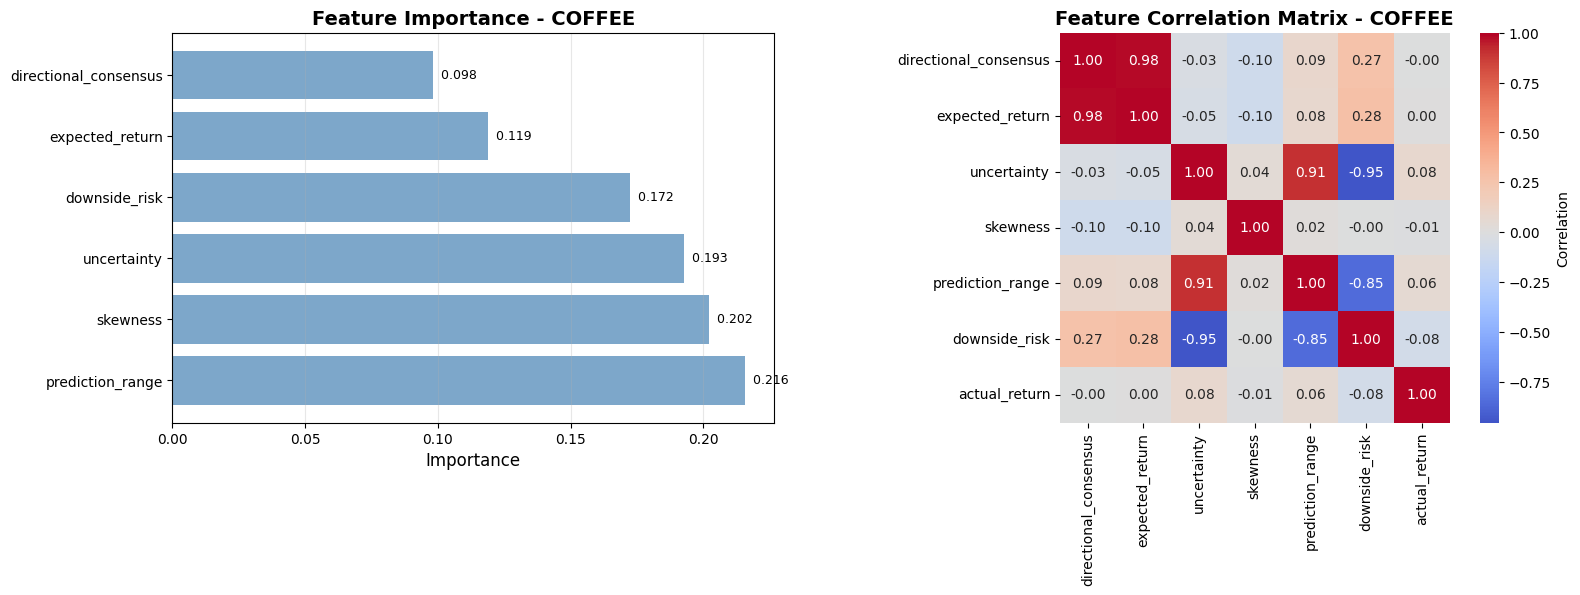


Saving results...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/feature_analysis_coffee.pkl
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/feature_importance_coffee.csv

✓ FEATURE ANALYSIS COMPLETE - COFFEE
  Features analyzed: 6
  Observations: 1930
  Model R²: -0.346
  Top feature: prediction_range (0.216)

FEATURE IMPORTANCE ANALYSIS: SUGAR

Loading prepared data...
✓ Loaded SYNTHETIC predictions from: /Volumes/commodity/silver/trading_agent_volume/prediction_matrices_sugar.pkl
Normalizing prediction matrix keys...
✓ Loaded 1944 days of prices
✓ Loaded 1944 prediction matrices (SYNTHETIC)

Extracting features...
✓ Extracted features for 1930 days

Correlation Analysis:

Feature Correlations with Actual Returns:
  expected_return          : +1.000 (STRONG)
  downside_risk            : +0.999 (STRONG)
  directional_consensus    : +0.955 (STRONG)
  prediction_range         : +0.255 (WEAK)
  skewness                 : -0.033 (WEAK)
  uncertainty              : -0

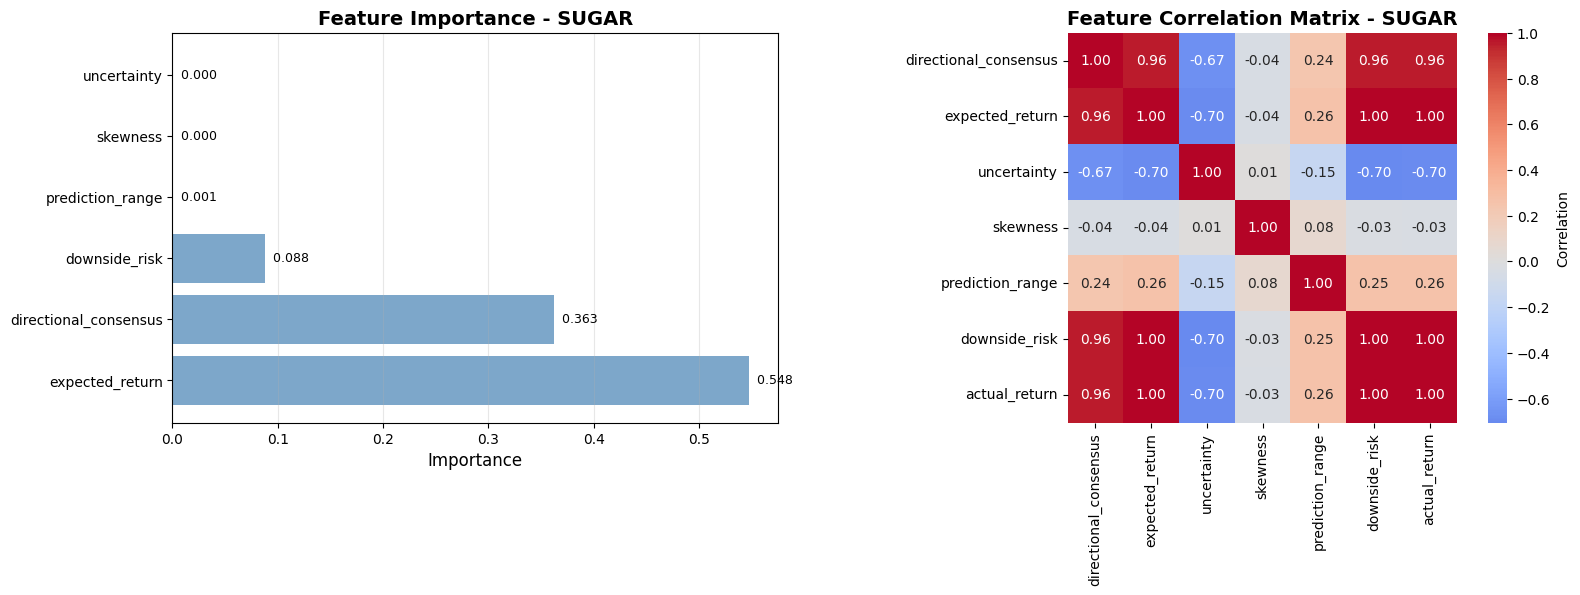


Saving results...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/feature_analysis_sugar.pkl
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/feature_importance_sugar.csv

✓ FEATURE ANALYSIS COMPLETE - SUGAR
  Features analyzed: 6
  Observations: 1930
  Model R²: 0.992
  Top feature: expected_return (0.548)

ALL FEATURE ANALYSES COMPLETE
Commodities analyzed: COFFEE, SUGAR

✓ Feature importance analysis complete for all commodities


In [0]:
# NOTEBOOK 06: FEATURE IMPORTANCE ANALYSIS (UPDATED)
# ============================================================================
# Databricks notebook source
# MAGIC %md
# MAGIC # Feature Importance Analysis - All Commodities
# MAGIC 
# MAGIC Analyzes which prediction features are most important for forecasting returns.
# MAGIC Runs sequentially for all configured commodities.

# COMMAND ----------

# MAGIC %run ./00_setup_and_config

# COMMAND ----------

import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# COMMAND ----------

# MAGIC %md
# MAGIC ## Feature Extraction and Analysis

# COMMAND ----------

def extract_features(predictions, current_price, eval_day=14):
    """
    Extract features from prediction ensemble for a given evaluation day.
    
    Args:
        predictions: N×H matrix of predictions (N runs × H horizons)
        current_price: Current market price
        eval_day: Which day ahead to evaluate (1-14)
    
    Returns:
        dict of features or None if invalid
    """
    if predictions is None or len(predictions) == 0:
        return None
    
    day_preds = predictions[:, eval_day - 1]
    
    return {
        'directional_consensus': np.mean(day_preds > current_price),
        'expected_return': (np.median(day_preds) - current_price) / current_price,
        'uncertainty': (np.percentile(day_preds, 75) - np.percentile(day_preds, 25)) / np.median(day_preds),
        'skewness': float(pd.Series(day_preds).skew()),
        'prediction_range': (np.max(day_preds) - np.min(day_preds)) / current_price,
        'downside_risk': (np.percentile(day_preds, 10) - current_price) / current_price
    }

# COMMAND ----------

# Loop through all commodities
for CURRENT_COMMODITY in COMMODITY_CONFIGS.keys():
    print("\n" + "=" * 80)
    print(f"FEATURE IMPORTANCE ANALYSIS: {CURRENT_COMMODITY.upper()}")
    print("=" * 80)
    
    # Get commodity-specific paths
    DATA_PATHS = get_data_paths(CURRENT_COMMODITY)
    
    # --------------------------------------------------------------------------
    # Load Data
    # --------------------------------------------------------------------------
    print(f"\nLoading prepared data...")
    
    if USE_DELTA:
        prices = spark.table(DATA_PATHS['prices_prepared']).toPandas()
    else:
        prices = pd.read_csv(DATA_PATHS['prices_prepared'], parse_dates=['date'])
    
    prices['date'] = pd.to_datetime(prices['date']).dt.normalize()  # Normalize dates for alignment

    prediction_matrices, predictions_source = load_prediction_matrices(CURRENT_COMMODITY)
    
    # Normalize prediction matrix keys to match normalized price dates
    print(f"Normalizing prediction matrix keys...")
    prediction_matrices_normalized = {
        pd.Timestamp(k).normalize(): v 
        for k, v in prediction_matrices.items()
    }
    prediction_matrices = prediction_matrices_normalized
    
    print(f"✓ Loaded {len(prices)} days of prices")
    print(f"✓ Loaded {len(prediction_matrices)} prediction matrices ({predictions_source})")
    
    # --------------------------------------------------------------------------
    # Build Feature Dataset
    # --------------------------------------------------------------------------
    print(f"\nExtracting features...")
    
    eval_day = ANALYSIS_CONFIG['forecast_horizon']
    feature_data = []
    
    for i in range(len(prices) - eval_day):
        current_date = prices.loc[i, 'date']
        current_price = prices.loc[i, 'price']
        
        if current_date not in prediction_matrices:
            continue
        
        predictions = prediction_matrices[current_date]
        features = extract_features(predictions, current_price, eval_day)
        
        if features is None:
            continue
        
        future_price = prices.loc[i + eval_day, 'price']
        actual_return = (future_price - current_price) / current_price
        
        feature_data.append({
            'date': current_date,
            'current_price': current_price,
            'actual_return': actual_return,
            **features
        })
    
    feature_df = pd.DataFrame(feature_data)
    print(f"✓ Extracted features for {len(feature_df)} days")
    
    if len(feature_df) == 0:
        print(f"\n⚠️  WARNING: No features extracted for {CURRENT_COMMODITY.upper()}!")
        print(f"   This usually means dates don't align between prices and predictions.")
        print(f"   Check that both are normalized properly.")
        continue
    
    # --------------------------------------------------------------------------
    # Correlation Analysis
    # --------------------------------------------------------------------------
    print(f"\nCorrelation Analysis:")
    
    feature_cols = ['directional_consensus', 'expected_return', 'uncertainty', 
                    'skewness', 'prediction_range', 'downside_risk']
    
    correlations = feature_df[feature_cols + ['actual_return']].corr()['actual_return'].drop('actual_return').sort_values(ascending=False)
    
    print("\nFeature Correlations with Actual Returns:")
    for feat, corr in correlations.items():
        strength = "STRONG" if abs(corr) > 0.5 else "MODERATE" if abs(corr) > 0.3 else "WEAK"
        print(f"  {feat:25s}: {corr:+.3f} ({strength})")
    
    # --------------------------------------------------------------------------
    # Random Forest Model
    # --------------------------------------------------------------------------
    print(f"\nTraining Random Forest model...")
    
    X = feature_df[feature_cols].values
    y = feature_df['actual_return'].values
    
    # Handle any NaN values
    X = np.nan_to_num(X, nan=0.0)
    
    # Train with cross-validation
    rf_model = RandomForestRegressor(
        n_estimators=100, 
        max_depth=10, 
        random_state=ANALYSIS_CONFIG['random_seed'], 
        n_jobs=-1
    )
    
    cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
    
    print(f"✓ Random Forest CV R²: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    
    # Fit final model
    rf_model.fit(X, y)
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nFeature Importance (Random Forest):")
    for _, row in feature_importance.iterrows():
        print(f"  {row['feature']:25s}: {row['importance']:.3f}")
    
    # --------------------------------------------------------------------------
    # Visualize Feature Importance
    # --------------------------------------------------------------------------
    print(f"\nGenerating visualizations...")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Feature Importance
    axes[0].barh(range(len(feature_importance)), feature_importance['importance'], color='steelblue', alpha=0.7)
    axes[0].set_yticks(range(len(feature_importance)))
    axes[0].set_yticklabels(feature_importance['feature'])
    axes[0].set_xlabel('Importance', fontsize=12)
    axes[0].set_title(f'Feature Importance - {CURRENT_COMMODITY.upper()}', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, (_, row) in enumerate(feature_importance.iterrows()):
        axes[0].text(row['importance'], i, f"  {row['importance']:.3f}", va='center', fontsize=9)
    
    # Plot 2: Correlation heatmap
    corr_matrix = feature_df[feature_cols + ['actual_return']].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
                square=True, ax=axes[1], cbar_kws={'label': 'Correlation'})
    axes[1].set_title(f'Feature Correlation Matrix - {CURRENT_COMMODITY.upper()}', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    
    feature_chart_path = f"{BASE_PATH}/feature_importance_{CURRENT_COMMODITY}.png"
    plt.savefig(feature_chart_path, dpi=300, bbox_inches='tight')
    print(f"  ✓ Saved: {feature_chart_path}")
    plt.show()
    plt.close()
    
    # --------------------------------------------------------------------------
    # Save Results
    # --------------------------------------------------------------------------
    print(f"\nSaving results...")
    
    feature_results = {
        'commodity': CURRENT_COMMODITY,
        'feature_data': feature_df,
        'correlations': correlations,
        'feature_importance': feature_importance,
        'model_r2_cv': cv_scores.mean(),
        'model_r2_std': cv_scores.std(),
        'model': rf_model
    }
    
    with open(DATA_PATHS['feature_analysis'], 'wb') as f:
        pickle.dump(feature_results, f)
    print(f"  ✓ Saved: {DATA_PATHS['feature_analysis']}")
    
    # Save CSV for easy viewing
    feature_importance.to_csv(f"{BASE_PATH}/feature_importance_{CURRENT_COMMODITY}.csv", index=False)
    print(f"  ✓ Saved: {BASE_PATH}/feature_importance_{CURRENT_COMMODITY}.csv")
    
    print(f"\n{'='*80}")
    print(f"✓ FEATURE ANALYSIS COMPLETE - {CURRENT_COMMODITY.upper()}")
    print(f"{'='*80}")
    print(f"  Features analyzed: {len(feature_cols)}")
    print(f"  Observations: {len(feature_df)}")
    print(f"  Model R²: {cv_scores.mean():.3f}")
    print(f"  Top feature: {feature_importance.iloc[0]['feature']} ({feature_importance.iloc[0]['importance']:.3f})")

# COMMAND ----------

print("\n" + "=" * 80)
print("ALL FEATURE ANALYSES COMPLETE")
print("=" * 80)
print(f"Commodities analyzed: {', '.join([c.upper() for c in COMMODITY_CONFIGS.keys()])}")
print("\n✓ Feature importance analysis complete for all commodities")


SENSITIVITY ANALYSIS: COFFEE

Loading prepared data...
✓ Loaded REAL predictions from: /Volumes/commodity/silver/trading_agent_volume/prediction_matrices_coffee_real.pkl
Normalizing prediction matrix keys...
✓ Loaded 1944 days of prices
✓ Loaded 2824 prediction matrices (REAL)

Running consensus parameter sensitivity...
  Testing 5 consensus thresholds × 5 minimum returns = 25 combinations
Backtest engine initialized:
  Commodity: coffee
  Price days: 1944
  Prediction matrices: 2824
  Matrix structure: 2000 runs × 14 horizons
  Harvest windows: [(5, 9)]
  Annual harvest volume: 50 tons
  Storage cost: 0.025% per day
  Transaction cost: 0.25% per sale
  Harvest days in simulation: 841
  Harvest cycles in simulation: 8
✓ Tested 25 parameter combinations

  ⚠️  WARNING: Only 1 unique net earnings values!
     This suggests parameters are NOT affecting strategy decisions.
     Strategy may be defaulting to baseline behavior.
     Range: $1,021,174 to $1,021,174

  Optimal parameters:
   

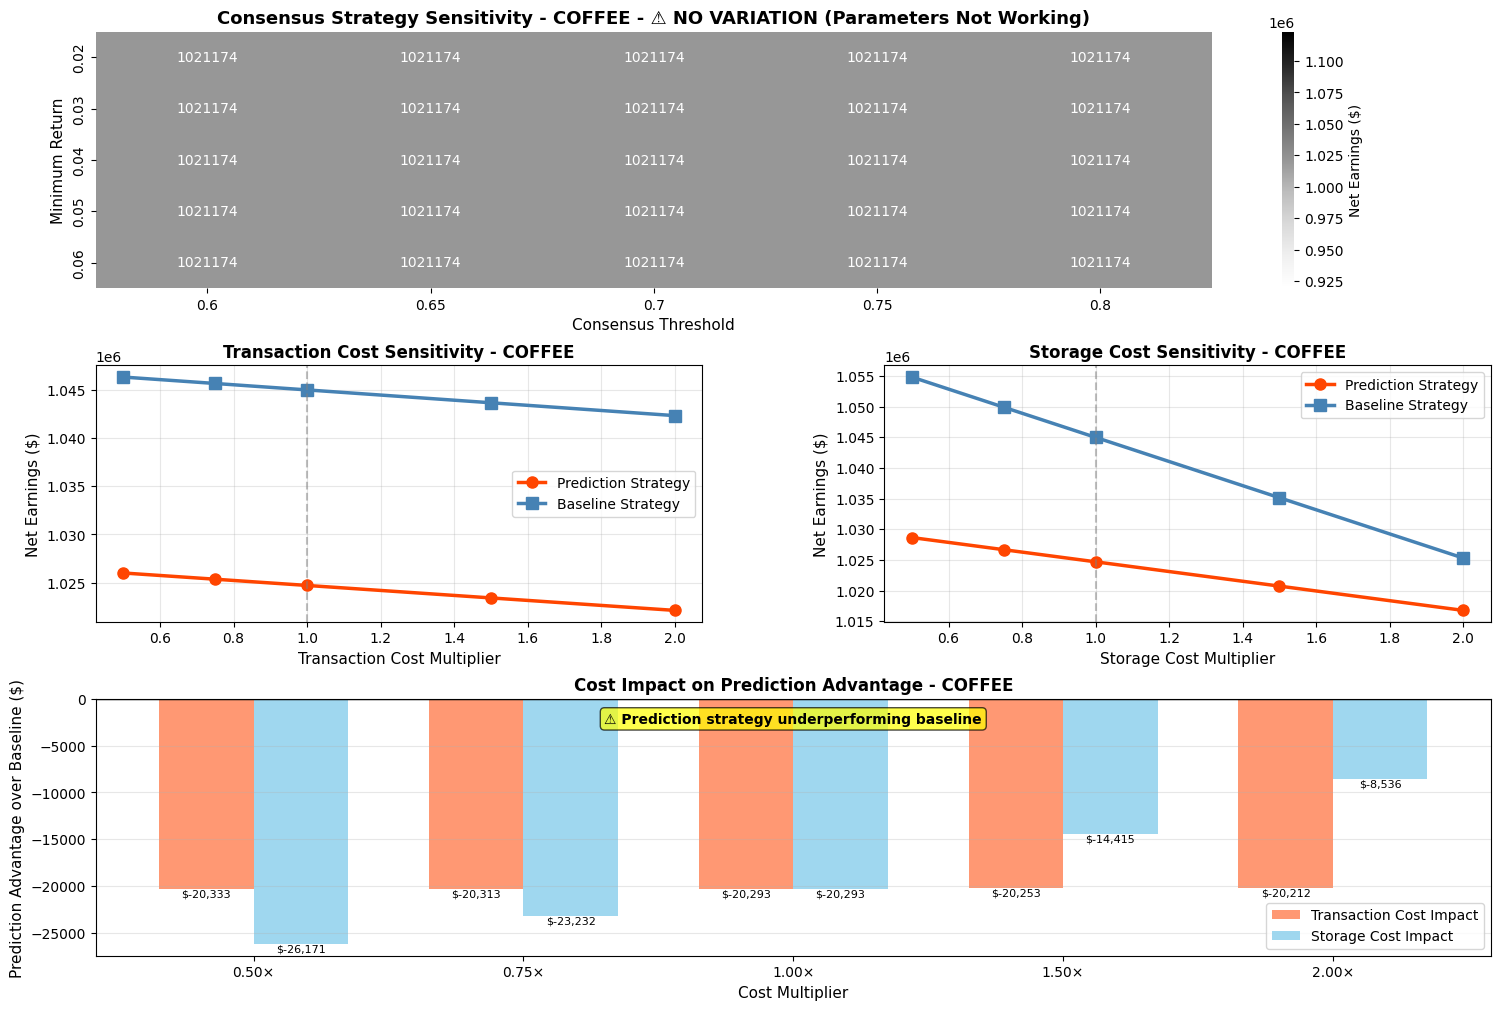


Saving results...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/sensitivity_results_coffee.pkl
  ✓ Saved CSV files

✓ SENSITIVITY ANALYSIS COMPLETE - COFFEE
  Parameter combinations tested: 25
  Transaction cost levels tested: 5
  Storage cost levels tested: 5

  ⚠️  DIAGNOSTIC: Parameters not affecting results (only 1 unique values)
  ⚠️  DIAGNOSTIC: Prediction strategy underperforming by $20,292.76

SENSITIVITY ANALYSIS: SUGAR

Loading prepared data...
✓ Loaded SYNTHETIC predictions from: /Volumes/commodity/silver/trading_agent_volume/prediction_matrices_sugar.pkl
Normalizing prediction matrix keys...
✓ Loaded 1944 days of prices
✓ Loaded 1944 prediction matrices (SYNTHETIC)

Running consensus parameter sensitivity...
  Testing 5 consensus thresholds × 5 minimum returns = 25 combinations
Backtest engine initialized:
  Commodity: sugar
  Price days: 1944
  Prediction matrices: 1944
  Matrix structure: 2000 runs × 14 horizons
  Harvest windows: [(10, 12)]
  Annual harvest 

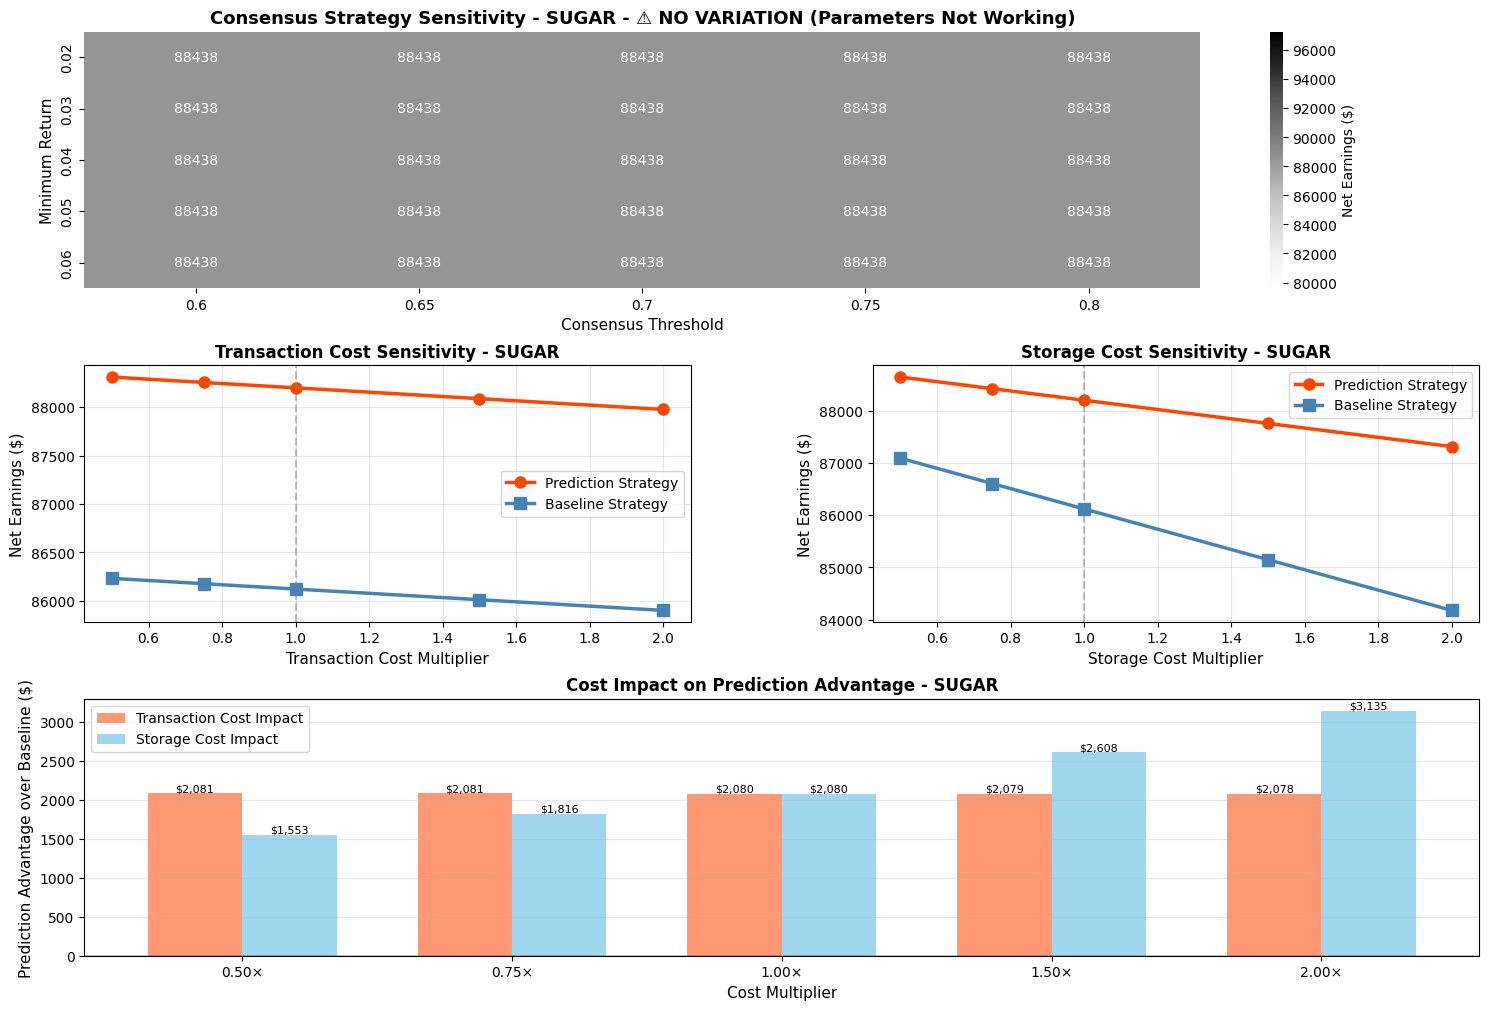


Saving results...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/sensitivity_results_sugar.pkl
  ✓ Saved CSV files

✓ SENSITIVITY ANALYSIS COMPLETE - SUGAR
  Parameter combinations tested: 25
  Transaction cost levels tested: 5
  Storage cost levels tested: 5

  ⚠️  DIAGNOSTIC: Parameters not affecting results (only 1 unique values)

ALL SENSITIVITY ANALYSES COMPLETE
Commodities analyzed: COFFEE, SUGAR

✓ Sensitivity analysis complete for all commodities


In [0]:
# NOTEBOOK 07: SENSITIVITY ANALYSIS (FIXED)
# ============================================================================
# Databricks notebook source
# MAGIC %md
# MAGIC # Sensitivity Analysis - All Commodities (Fixed Visualizations)
# MAGIC 
# MAGIC Tests how robust strategies are to parameter and cost changes.

# COMMAND ----------

# MAGIC %run ./00_setup_and_config
# MAGIC %run ./02_strategy_implementations
# MAGIC %run ./03_backtesting_engine

# COMMAND ----------

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# COMMAND ----------

# MAGIC %md
# MAGIC ## Sensitivity Analysis Functions

# COMMAND ----------

def run_sensitivity_consensus(prices, prediction_matrices, commodity_config):
    """Test sensitivity of Consensus strategy to parameter changes."""
    engine = BacktestEngine(prices, prediction_matrices, commodity_config)
    results = []
    
    # Test different consensus thresholds and minimum returns
    for cons_thresh in [0.60, 0.65, 0.70, 0.75, 0.80]:
        for min_ret in [0.02, 0.03, 0.04, 0.05, 0.06]:
            strategy = ConsensusStrategy(
                consensus_threshold=cons_thresh, 
                min_return=min_ret, 
                evaluation_day=ANALYSIS_CONFIG['forecast_horizon']
            )
            backtest_result = engine.run(strategy)
            metrics = calculate_metrics(backtest_result)
            results.append({
                'consensus_threshold': cons_thresh, 
                'min_return': min_ret, 
                **metrics
            })
    
    return pd.DataFrame(results)

def run_cost_sensitivity(prices, prediction_matrices, commodity_config, cost_type='transaction'):
    """Test sensitivity to transaction or storage cost changes (percentage-based)."""
    results = []
    
    for multiplier in [0.5, 0.75, 1.0, 1.5, 2.0]:
        config = commodity_config.copy()
        
        if cost_type == 'transaction':
            config['transaction_cost_pct'] = commodity_config['transaction_cost_pct'] * multiplier
        elif cost_type == 'storage':
            config['storage_cost_pct_per_day'] = commodity_config['storage_cost_pct_per_day'] * multiplier
        
        engine = BacktestEngine(prices, prediction_matrices, config)
        
        # Run prediction strategy
        pred_strategy = RiskAdjustedStrategy(**PREDICTION_PARAMS['risk_adjusted'])
        pred_result = engine.run(pred_strategy)
        pred_metrics = calculate_metrics(pred_result)
        
        # Run baseline strategy
        baseline_strategy = MovingAverageStrategy(ma_period=BASELINE_PARAMS['moving_average']['ma_period'])
        baseline_result = engine.run(baseline_strategy)
        baseline_metrics = calculate_metrics(baseline_result)
        
        results.append({
            'cost_multiplier': multiplier,
            'prediction_earnings': pred_metrics['net_earnings'],
            'baseline_earnings': baseline_metrics['net_earnings'],
            'advantage': pred_metrics['net_earnings'] - baseline_metrics['net_earnings'],
            'advantage_pct': ((pred_metrics['net_earnings'] - baseline_metrics['net_earnings']) / 
                             abs(baseline_metrics['net_earnings']) * 100) if baseline_metrics['net_earnings'] != 0 else 0
        })
    
    return pd.DataFrame(results)

# COMMAND ----------

# MAGIC %md
# MAGIC ## Run Sensitivity Analysis for All Commodities

# COMMAND ----------

# Loop through all commodities
for CURRENT_COMMODITY in COMMODITY_CONFIGS.keys():
    print("\n" + "=" * 80)
    print(f"SENSITIVITY ANALYSIS: {CURRENT_COMMODITY.upper()}")
    print("=" * 80)
    
    # Get commodity-specific configuration and paths
    commodity_config = COMMODITY_CONFIGS[CURRENT_COMMODITY]
    DATA_PATHS = get_data_paths(CURRENT_COMMODITY)
    
    # --------------------------------------------------------------------------
    # Load Data
    # --------------------------------------------------------------------------
    print(f"\nLoading prepared data...")
    
    if USE_DELTA:
        prices = spark.table(DATA_PATHS['prices_prepared']).toPandas()
    else:
        prices = pd.read_csv(DATA_PATHS['prices_prepared'], parse_dates=['date'])
    
    prices['date'] = pd.to_datetime(prices['date']).dt.normalize()

    prediction_matrices, predictions_source = load_prediction_matrices(CURRENT_COMMODITY)
    
    # Normalize prediction matrix keys
    print(f"Normalizing prediction matrix keys...")
    prediction_matrices_normalized = {
        pd.Timestamp(k).normalize(): v 
        for k, v in prediction_matrices.items()
    }
    prediction_matrices = prediction_matrices_normalized
    
    print(f"✓ Loaded {len(prices)} days of prices")
    print(f"✓ Loaded {len(prediction_matrices)} prediction matrices ({predictions_source})")
    
    # --------------------------------------------------------------------------
    # Consensus Parameter Sensitivity
    # --------------------------------------------------------------------------
    print(f"\nRunning consensus parameter sensitivity...")
    print(f"  Testing 5 consensus thresholds × 5 minimum returns = 25 combinations")
    
    consensus_sensitivity = run_sensitivity_consensus(prices, prediction_matrices, commodity_config)
    print(f"✓ Tested {len(consensus_sensitivity)} parameter combinations")
    
    # Check for identical results (indicates parameter bug)
    unique_earnings = consensus_sensitivity['net_earnings'].nunique()
    if unique_earnings <= 3:
        print(f"\n  ⚠️  WARNING: Only {unique_earnings} unique net earnings values!")
        print(f"     This suggests parameters are NOT affecting strategy decisions.")
        print(f"     Strategy may be defaulting to baseline behavior.")
        print(f"     Range: ${consensus_sensitivity['net_earnings'].min():,.0f} to ${consensus_sensitivity['net_earnings'].max():,.0f}")
    
    # Find optimal parameters
    best_combo = consensus_sensitivity.loc[consensus_sensitivity['net_earnings'].idxmax()]
    print(f"\n  Optimal parameters:")
    print(f"    Consensus threshold: {best_combo['consensus_threshold']:.2f}")
    print(f"    Minimum return: {best_combo['min_return']:.2%}")
    print(f"    Net earnings: ${best_combo['net_earnings']:,.2f}")
    
    # --------------------------------------------------------------------------
    # Transaction Cost Sensitivity
    # --------------------------------------------------------------------------
    print(f"\nRunning transaction cost sensitivity...")
    print(f"  Testing multipliers: 0.5×, 0.75×, 1.0×, 1.5×, 2.0×")
    print(f"  Base transaction cost: {commodity_config['transaction_cost_pct']:.3f}%")
    
    transaction_sensitivity = run_cost_sensitivity(prices, prediction_matrices, commodity_config, 'transaction')
    print(f"✓ Tested {len(transaction_sensitivity)} cost levels")
    
    print("\n  Results:")
    for _, row in transaction_sensitivity.iterrows():
        print(f"    {row['cost_multiplier']:.2f}× cost: Advantage ${row['advantage']:+,.2f} ({row['advantage_pct']:+.1f}%)")
    
    # Check if prediction is underperforming
    baseline_advantage = transaction_sensitivity[transaction_sensitivity['cost_multiplier'] == 1.0]['advantage'].iloc[0]
    if baseline_advantage < 0:
        print(f"\n  ⚠️  WARNING: Prediction strategy underperforming baseline by ${-baseline_advantage:,.2f}")
        print(f"     This suggests the prediction strategy needs improvement.")
    
    # --------------------------------------------------------------------------
    # Storage Cost Sensitivity
    # --------------------------------------------------------------------------
    print(f"\nRunning storage cost sensitivity...")
    print(f"  Testing multipliers: 0.5×, 0.75×, 1.0×, 1.5×, 2.0×")
    print(f"  Base storage cost: {commodity_config['storage_cost_pct_per_day']:.3f}% per day")
    
    storage_sensitivity = run_cost_sensitivity(prices, prediction_matrices, commodity_config, 'storage')
    print(f"✓ Tested {len(storage_sensitivity)} cost levels")
    
    print("\n  Results:")
    for _, row in storage_sensitivity.iterrows():
        print(f"    {row['cost_multiplier']:.2f}× cost: Advantage ${row['advantage']:+,.2f} ({row['advantage_pct']:+.1f}%)")
    
    # --------------------------------------------------------------------------
    # Visualizations (IMPROVED)
    # --------------------------------------------------------------------------
    print(f"\nGenerating visualizations...")
    
    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    
    # Plot 1: Consensus parameter heatmap
    ax1 = fig.add_subplot(gs[0, :])
    pivot_data = consensus_sensitivity.pivot(
        index='min_return', 
        columns='consensus_threshold', 
        values='net_earnings'
    )
    
    # Check if data is essentially constant
    data_range = pivot_data.max().max() - pivot_data.min().min()
    if data_range < 1000:  # Less than $1000 variation
        cmap = 'Greys'
        center = None
        title_suffix = ' - ⚠️ NO VARIATION (Parameters Not Working)'
    else:
        cmap = 'RdYlGn'
        center = pivot_data.median().median()
        title_suffix = ''
    
    sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap=cmap, center=center, 
                ax=ax1, cbar_kws={'label': 'Net Earnings ($)'})
    ax1.set_title(f'Consensus Strategy Sensitivity - {CURRENT_COMMODITY.upper()}{title_suffix}', 
                 fontsize=13, fontweight='bold')
    ax1.set_xlabel('Consensus Threshold', fontsize=11)
    ax1.set_ylabel('Minimum Return', fontsize=11)
    
    # Plot 2: Transaction cost impact
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(transaction_sensitivity['cost_multiplier'], 
            transaction_sensitivity['prediction_earnings'], 
            marker='o', linewidth=2.5, markersize=8, label='Prediction Strategy', color='orangered')
    ax2.plot(transaction_sensitivity['cost_multiplier'], 
            transaction_sensitivity['baseline_earnings'], 
            marker='s', linewidth=2.5, markersize=8, label='Baseline Strategy', color='steelblue')
    ax2.set_xlabel('Transaction Cost Multiplier', fontsize=11)
    ax2.set_ylabel('Net Earnings ($)', fontsize=11)
    ax2.set_title(f'Transaction Cost Sensitivity - {CURRENT_COMMODITY.upper()}', 
                 fontsize=12, fontweight='bold')
    ax2.legend(loc='best')
    ax2.grid(True, alpha=0.3)
    ax2.axvline(x=1.0, color='gray', linestyle='--', alpha=0.5)
    
    # Plot 3: Storage cost impact
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(storage_sensitivity['cost_multiplier'], 
            storage_sensitivity['prediction_earnings'], 
            marker='o', linewidth=2.5, markersize=8, label='Prediction Strategy', color='orangered')
    ax3.plot(storage_sensitivity['cost_multiplier'], 
            storage_sensitivity['baseline_earnings'], 
            marker='s', linewidth=2.5, markersize=8, label='Baseline Strategy', color='steelblue')
    ax3.set_xlabel('Storage Cost Multiplier', fontsize=11)
    ax3.set_ylabel('Net Earnings ($)', fontsize=11)
    ax3.set_title(f'Storage Cost Sensitivity - {CURRENT_COMMODITY.upper()}', 
                 fontsize=12, fontweight='bold')
    ax3.legend(loc='best')
    ax3.grid(True, alpha=0.3)
    ax3.axvline(x=1.0, color='gray', linestyle='--', alpha=0.5)
    
    # Plot 4: Prediction advantage - IMPROVED (side-by-side bars)
    ax4 = fig.add_subplot(gs[2, :])
    
    x = np.arange(len(transaction_sensitivity))
    width = 0.35
    
    bars1 = ax4.bar(x - width/2, transaction_sensitivity['advantage'], 
                   width, label='Transaction Cost Impact', color='coral', alpha=0.8)
    bars2 = ax4.bar(x + width/2, storage_sensitivity['advantage'], 
                   width, label='Storage Cost Impact', color='skyblue', alpha=0.8)
    
    ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax4.set_xlabel('Cost Multiplier', fontsize=11)
    ax4.set_ylabel('Prediction Advantage over Baseline ($)', fontsize=11)
    ax4.set_title(f'Cost Impact on Prediction Advantage - {CURRENT_COMMODITY.upper()}', 
                 fontsize=12, fontweight='bold')
    ax4.set_xticks(x)
    ax4.set_xticklabels([f'{m:.2f}×' for m in transaction_sensitivity['cost_multiplier']])
    ax4.legend(loc='best')
    ax4.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height,
                    f'${height:,.0f}',
                    ha='center', va='bottom' if height >= 0 else 'top',
                    fontsize=8)
    
    # Add warning text if underperforming
    if baseline_advantage < 0:
        ax4.text(0.5, 0.95, '⚠️ Prediction strategy underperforming baseline', 
                transform=ax4.transAxes, ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
                fontsize=10, fontweight='bold')
    
    sensitivity_chart_path = f"{BASE_PATH}/sensitivity_analysis_{CURRENT_COMMODITY}.png"
    plt.savefig(sensitivity_chart_path, dpi=300, bbox_inches='tight')
    print(f"  ✓ Saved: {sensitivity_chart_path}")
    plt.show()
    plt.close()
    
    # --------------------------------------------------------------------------
    # Save Results
    # --------------------------------------------------------------------------
    print(f"\nSaving results...")
    
    sensitivity_results = {
        'commodity': CURRENT_COMMODITY,
        'consensus': consensus_sensitivity,
        'transaction_costs': transaction_sensitivity,
        'storage_costs': storage_sensitivity,
        'optimal_consensus_threshold': best_combo['consensus_threshold'],
        'optimal_min_return': best_combo['min_return'],
        'unique_earnings_count': unique_earnings,
        'baseline_advantage': baseline_advantage
    }
    
    with open(DATA_PATHS['sensitivity_results'], 'wb') as f:
        pickle.dump(sensitivity_results, f)
    print(f"  ✓ Saved: {DATA_PATHS['sensitivity_results']}")
    
    # Save CSVs
    consensus_sensitivity.to_csv(f"{BASE_PATH}/sensitivity_consensus_{CURRENT_COMMODITY}.csv", index=False)
    transaction_sensitivity.to_csv(f"{BASE_PATH}/sensitivity_transaction_{CURRENT_COMMODITY}.csv", index=False)
    storage_sensitivity.to_csv(f"{BASE_PATH}/sensitivity_storage_{CURRENT_COMMODITY}.csv", index=False)
    print(f"  ✓ Saved CSV files")
    
    print(f"\n{'='*80}")
    print(f"✓ SENSITIVITY ANALYSIS COMPLETE - {CURRENT_COMMODITY.upper()}")
    print(f"{'='*80}")
    print(f"  Parameter combinations tested: {len(consensus_sensitivity)}")
    print(f"  Transaction cost levels tested: {len(transaction_sensitivity)}")
    print(f"  Storage cost levels tested: {len(storage_sensitivity)}")
    
    # Diagnostic summary
    if unique_earnings <= 3:
        print(f"\n  ⚠️  DIAGNOSTIC: Parameters not affecting results (only {unique_earnings} unique values)")
    if baseline_advantage < 0:
        print(f"  ⚠️  DIAGNOSTIC: Prediction strategy underperforming by ${-baseline_advantage:,.2f}")

# COMMAND ----------

print("\n" + "=" * 80)
print("ALL SENSITIVITY ANALYSES COMPLETE")
print("=" * 80)
print(f"Commodities analyzed: {', '.join([c.upper() for c in COMMODITY_CONFIGS.keys()])}")
print("\n✓ Sensitivity analysis complete for all commodities")


GENERATING REPORT: COFFEE

Loading results...
✓ Loaded all analysis results

EXECUTIVE SUMMARY - COFFEE

Analysis Date: 2025-10-29
Commodity: COFFEE
Backtest Period: 2018-01-01 to 2025-09-24

📊 Best Baseline: Equal Batches
   Net Earnings: $1,074,998.61
   Avg Sale Price: $3918.51
   Trades: 67

🎯 Best Prediction: Price Threshold Predictive
   Net Earnings: $1,040,465.84
   Avg Sale Price: $3761.00
   Trades: 78

📈 Prediction Advantage:
   Absolute: $-34,532.77
   Relative: -3.2%

📉 Statistical Analysis:
   p-value: 0.6774
   Significant: NO (α=0.05)
   Effect size (Cohen's d): -0.009

🔍 Top Predictive Features:
   5. prediction_range: 0.216
   4. skewness: 0.202
   3. uncertainty: 0.193

Generating dashboard...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/final_dashboard_coffee.png


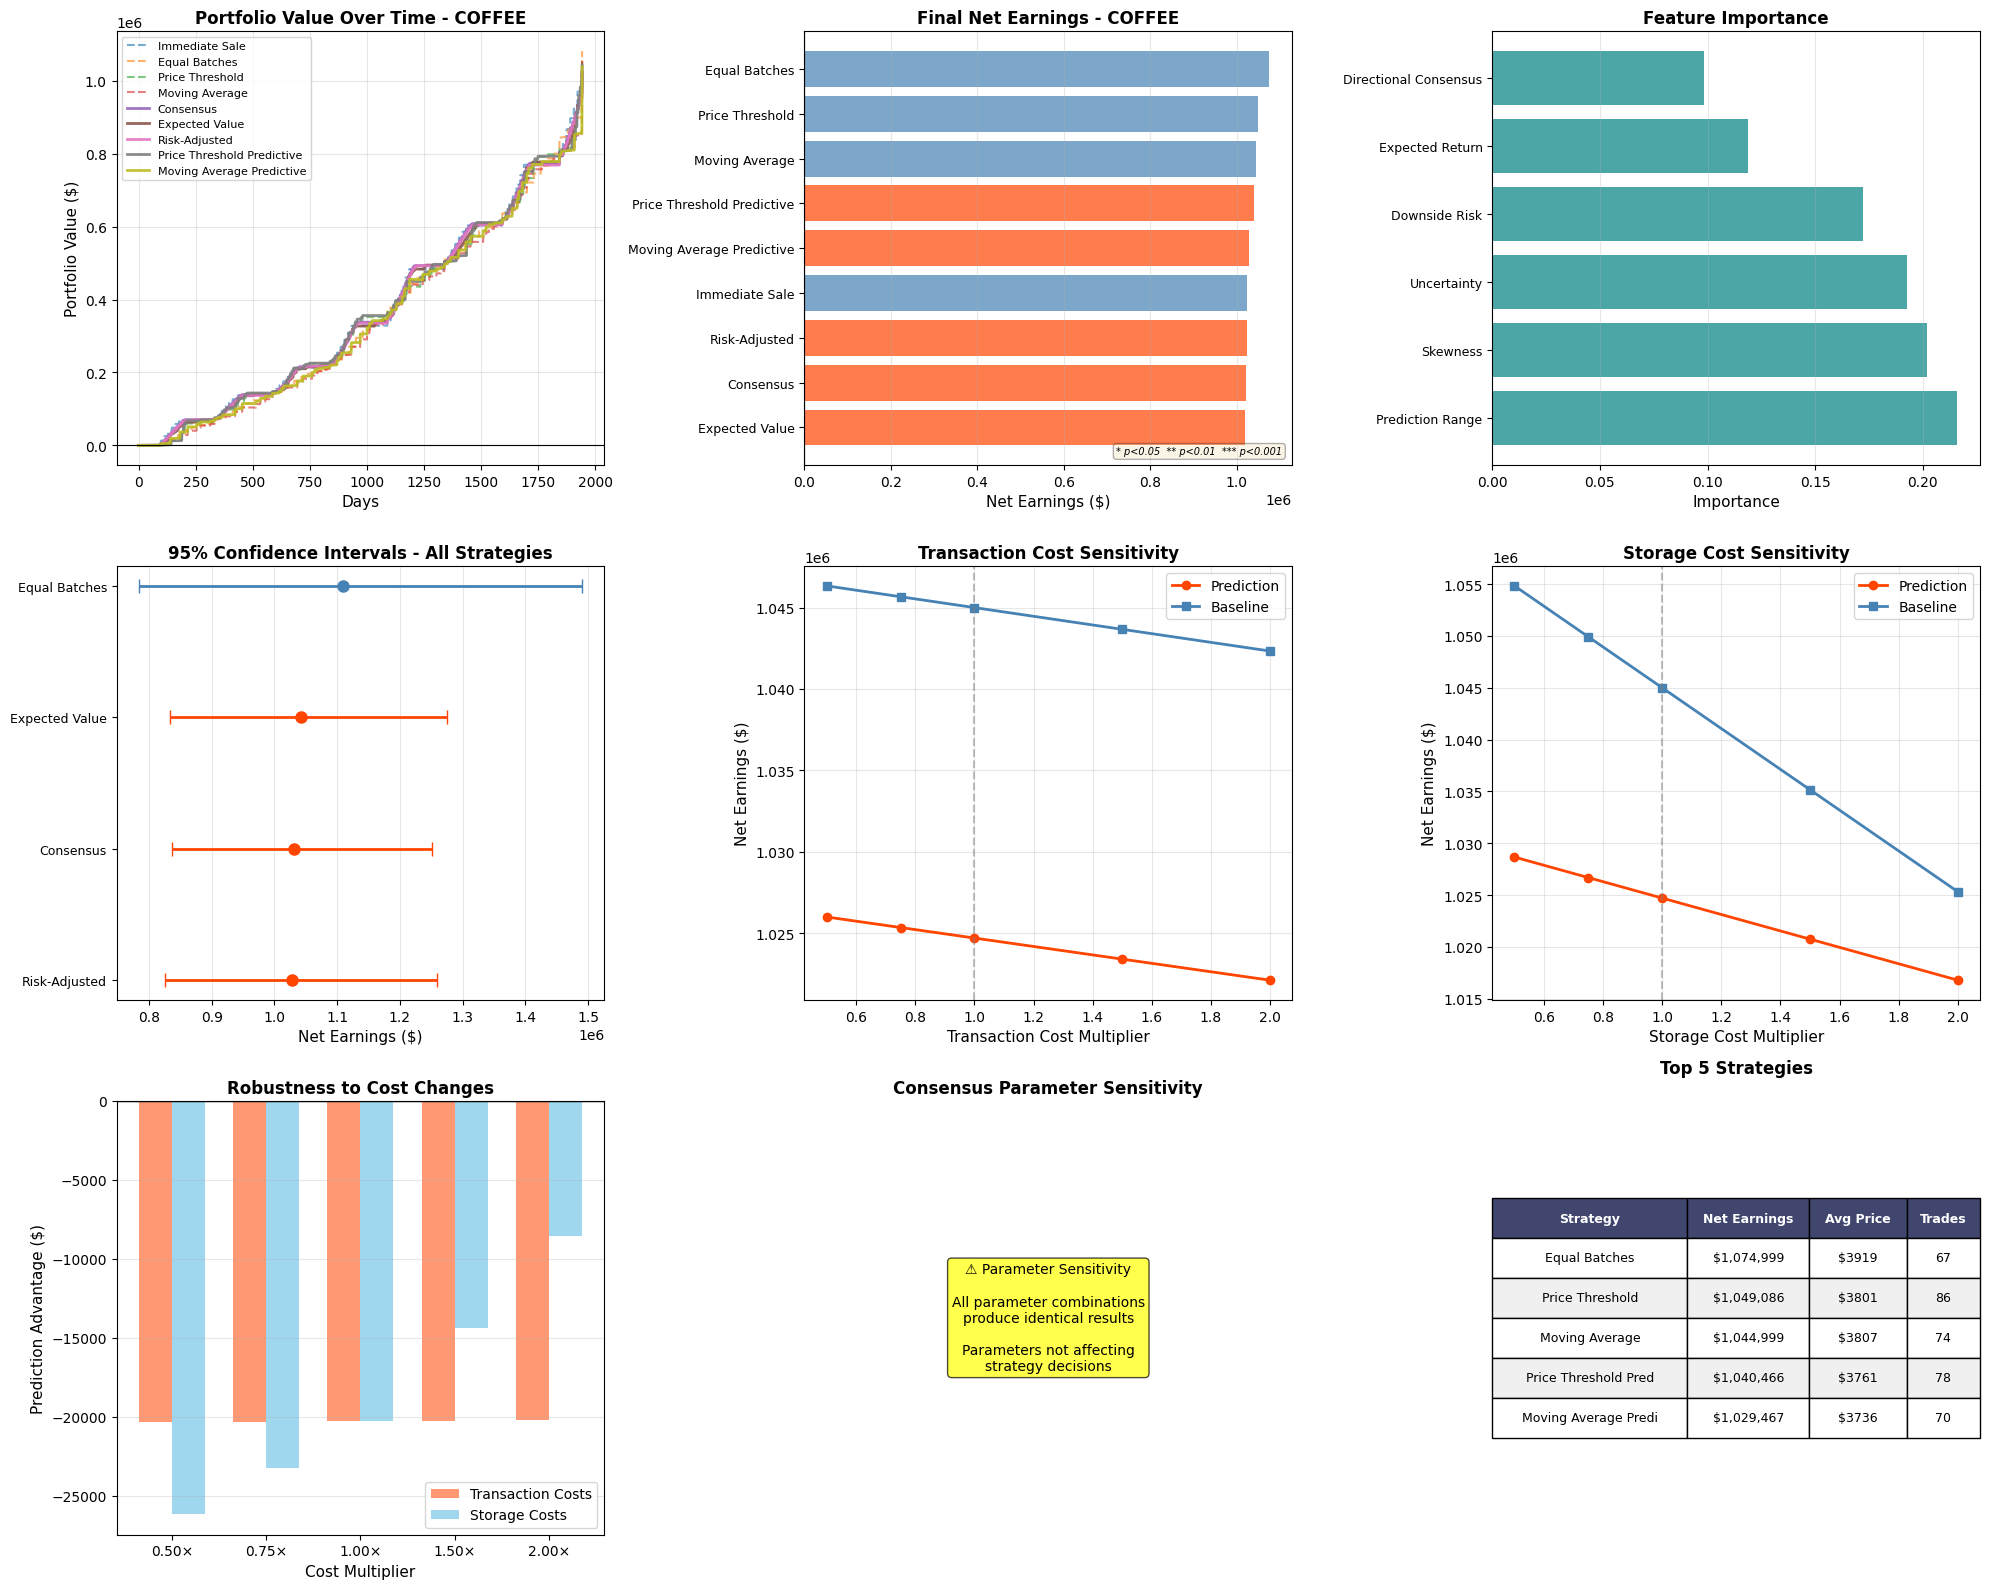

  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/final_summary_coffee.csv

✓ REPORT COMPLETE - COFFEE

GENERATING REPORT: SUGAR

Loading results...
✓ Loaded all analysis results

EXECUTIVE SUMMARY - SUGAR

Analysis Date: 2025-10-29
Commodity: SUGAR
Backtest Period: 2018-01-01 to 2025-09-24

📊 Best Baseline: Immediate Sale
   Net Earnings: $88,645.06
   Avg Sale Price: $360.00
   Trades: 49

🎯 Best Prediction: Consensus
   Net Earnings: $88,438.16
   Avg Sale Price: $360.87
   Trades: 98

📈 Prediction Advantage:
   Absolute: $-206.90
   Relative: -0.2%

📉 Statistical Analysis:
   p-value: 0.9879
   Significant: NO (α=0.05)
   Effect size (Cohen's d): 0.000

🔍 Top Predictive Features:
   2. expected_return: 0.548
   1. directional_consensus: 0.363
   6. downside_risk: 0.088

Generating dashboard...
  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/final_dashboard_sugar.png


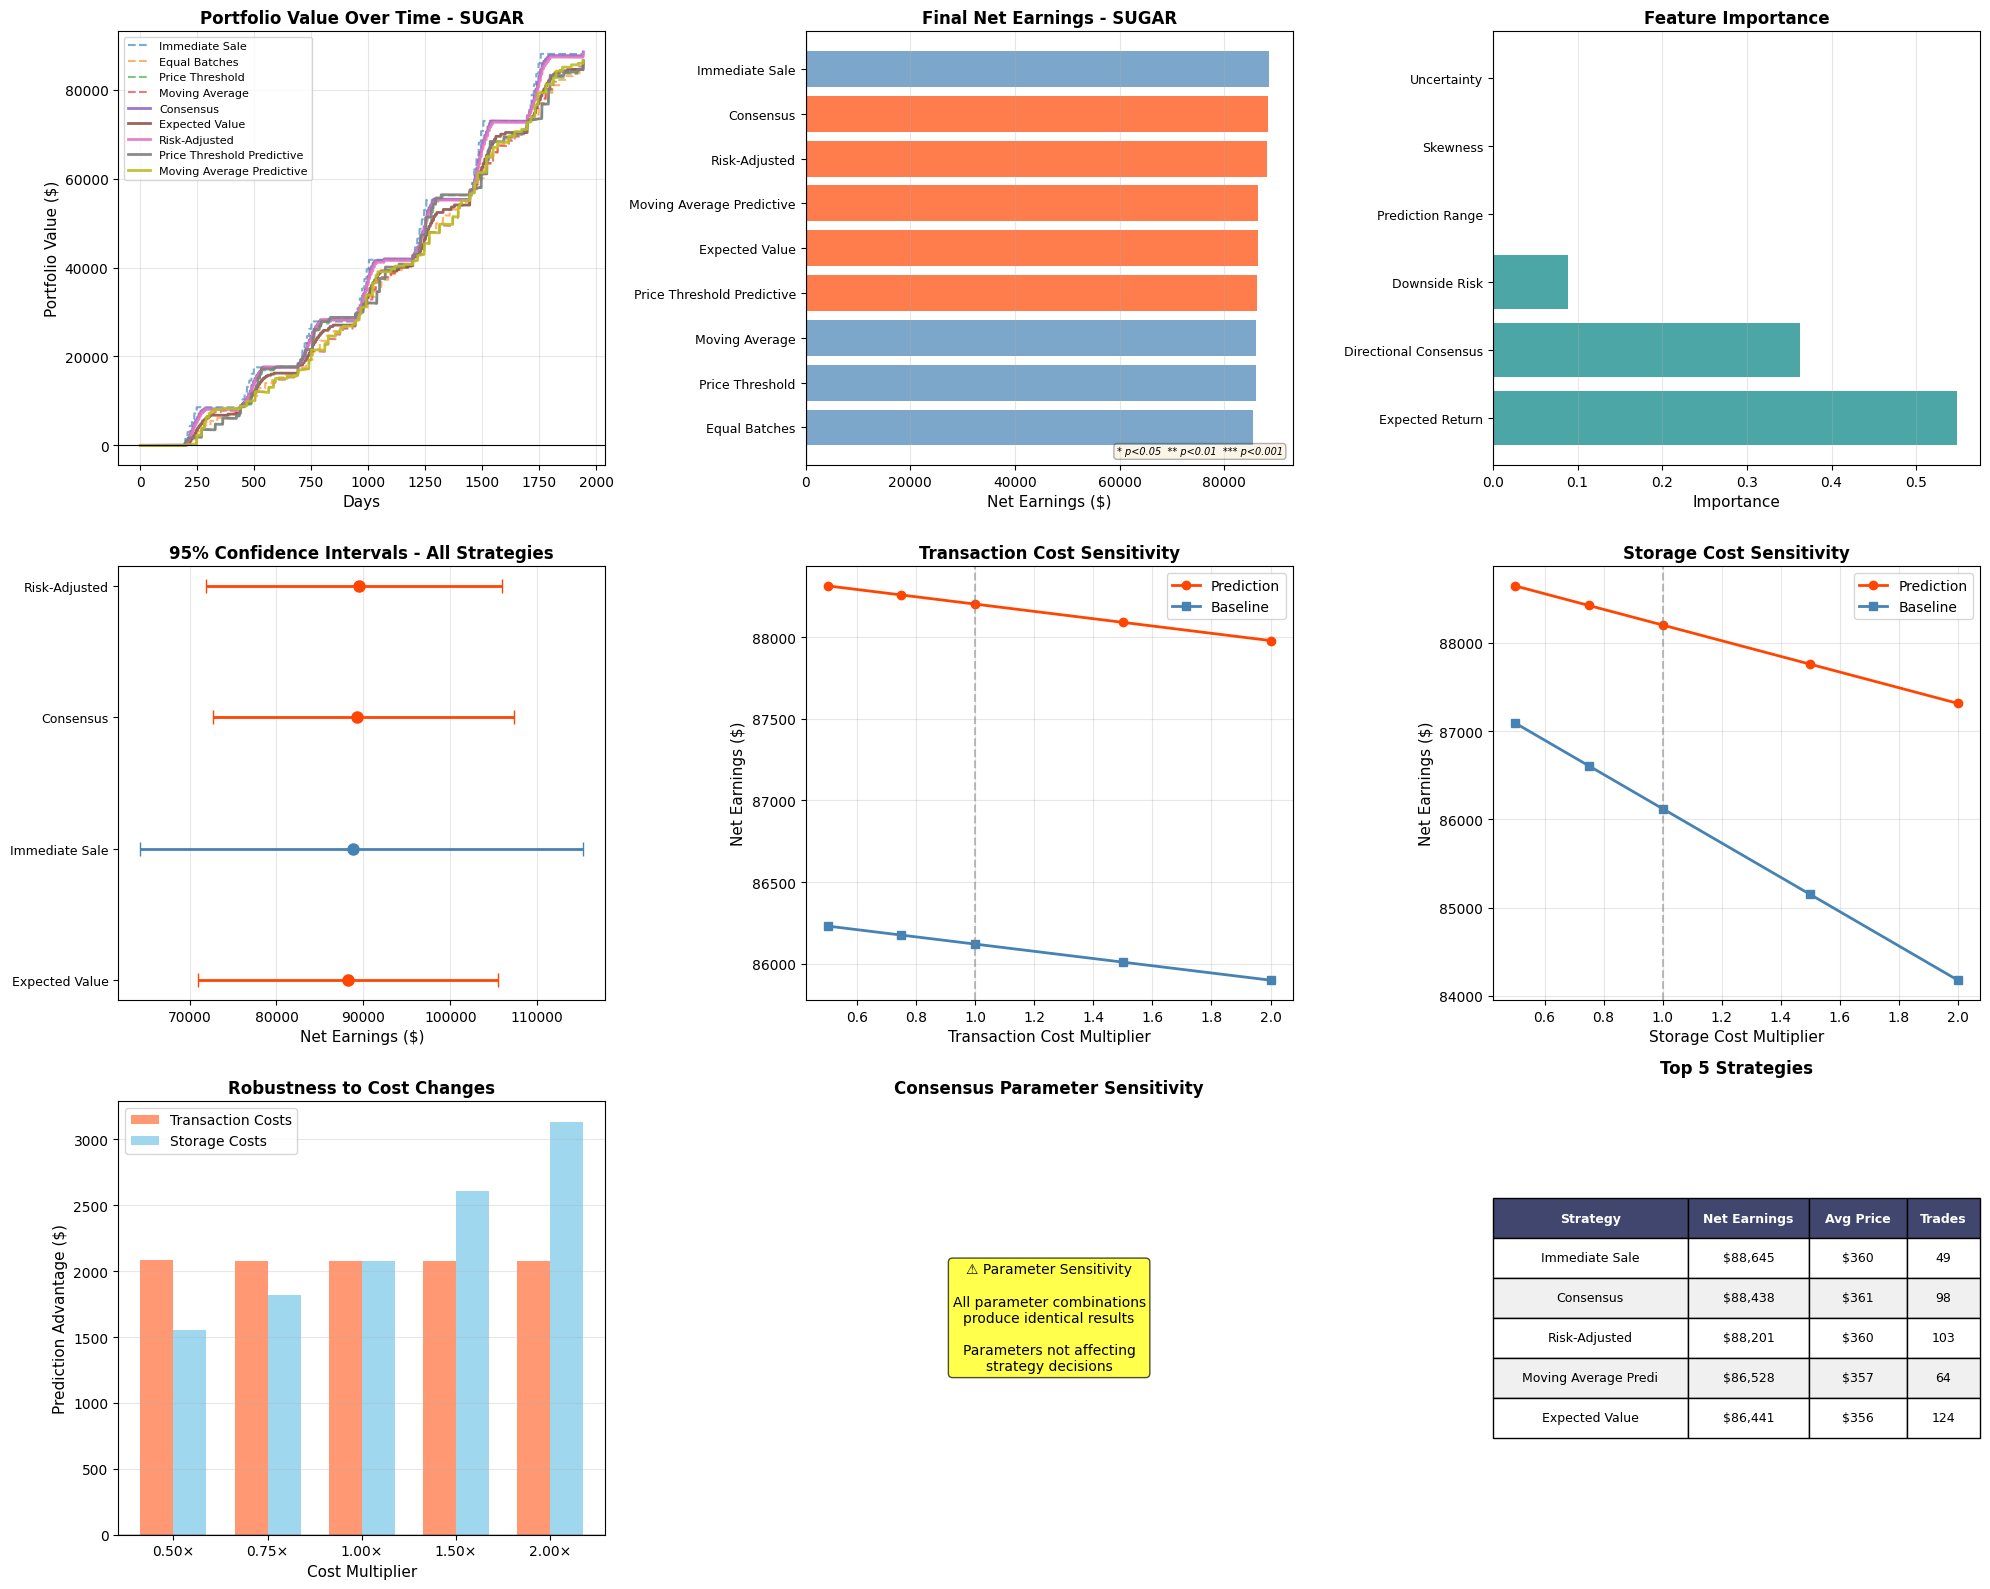

  ✓ Saved: /Volumes/commodity/silver/trading_agent_volume/final_summary_sugar.csv

✓ REPORT COMPLETE - SUGAR

CROSS-COMMODITY COMPARISON

Summary across all commodities:
commodity analysis_date  best_baseline  best_baseline_earnings            best_prediction  best_prediction_earnings  earnings_advantage  earnings_advantage_pct  model_r2      top_feature
   COFFEE    2025-10-29  Equal Batches            1.074999e+06 Price Threshold Predictive              1.040466e+06       -34532.766921               -3.212355 -0.345726 prediction_range
    SUGAR    2025-10-29 Immediate Sale            8.864506e+04                  Consensus              8.843816e+04         -206.901975               -0.233405  0.991809  expected_return

✓ Saved: /Volumes/commodity/silver/trading_agent_volume/cross_commodity_final_summary.csv

ALL REPORTS COMPLETE
Commodities analyzed: COFFEE, SUGAR


In [0]:
# NOTEBOOK 08: VISUALIZATION AND REPORTING (COMPLETE FIXED VERSION)
# ============================================================================
# Databricks notebook source
# MAGIC %md
# MAGIC # Final Report and Dashboard - All Commodities
# MAGIC 
# MAGIC Creates comprehensive reports and visualizations for each commodity
# MAGIC plus cross-commodity comparisons.

# COMMAND ----------

# MAGIC %run ./00_setup_and_config

# COMMAND ----------

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# COMMAND ----------

# MAGIC %md
# MAGIC ## Generate Individual Commodity Reports

# COMMAND ----------

# Store summaries for cross-commodity comparison
all_summaries = []

# Loop through all commodities
for CURRENT_COMMODITY in COMMODITY_CONFIGS.keys():
    print("\n" + "=" * 80)
    print(f"GENERATING REPORT: {CURRENT_COMMODITY.upper()}")
    print("=" * 80)
    
    # Get commodity-specific paths
    DATA_PATHS = get_data_paths(CURRENT_COMMODITY)
    
    # --------------------------------------------------------------------------
    # Load All Results
    # --------------------------------------------------------------------------
    print(f"\nLoading results...")
    
    try:
        with open(DATA_PATHS['results_detailed'], 'rb') as f:
            results_detailed = pickle.load(f)
        
        with open(DATA_PATHS['statistical_results'], 'rb') as f:
            stat_results = pickle.load(f)
        
        with open(DATA_PATHS['feature_analysis'], 'rb') as f:
            feature_results = pickle.load(f)
        
        with open(DATA_PATHS['sensitivity_results'], 'rb') as f:
            sensitivity_results = pickle.load(f)
        
        if USE_DELTA:
            results_df = spark.table(DATA_PATHS['results']).toPandas()
        else:
            results_df = pd.read_csv(DATA_PATHS['results'])
        
        print(f"✓ Loaded all analysis results")
        
    except FileNotFoundError as e:
        print(f"❌ ERROR: Missing required file for {CURRENT_COMMODITY}")
        print(f"   {e}")
        print(f"   Skipping {CURRENT_COMMODITY}...")
        continue
    except Exception as e:
        print(f"❌ ERROR loading data for {CURRENT_COMMODITY}: {e}")
        print(f"   Skipping {CURRENT_COMMODITY}...")
        continue
    
    # --------------------------------------------------------------------------
    # Executive Summary
    # --------------------------------------------------------------------------
    print(f"\n" + "=" * 80)
    print(f"EXECUTIVE SUMMARY - {CURRENT_COMMODITY.upper()}")
    print("=" * 80)
    
    baseline_names = ['Immediate Sale', 'Equal Batches', 'Price Threshold', 'Moving Average']
    best_baseline = results_df[results_df['strategy'].isin(baseline_names)].sort_values('net_earnings', ascending=False).iloc[0]
    best_prediction = results_df[~results_df['strategy'].isin(baseline_names)].sort_values('net_earnings', ascending=False).iloc[0]
    
    print(f"\nAnalysis Date: {datetime.now().strftime('%Y-%m-%d')}")
    print(f"Commodity: {CURRENT_COMMODITY.upper()}")
    print(f"Backtest Period: {ANALYSIS_CONFIG['backtest_start_date']} to {ANALYSIS_CONFIG['backtest_end_date']}")
    
    print(f"\n📊 Best Baseline: {best_baseline['strategy']}")
    print(f"   Net Earnings: ${best_baseline['net_earnings']:,.2f}")
    print(f"   Avg Sale Price: ${best_baseline['avg_sale_price']:.2f}")
    print(f"   Trades: {best_baseline['n_trades']}")
    
    print(f"\n🎯 Best Prediction: {best_prediction['strategy']}")
    print(f"   Net Earnings: ${best_prediction['net_earnings']:,.2f}")
    print(f"   Avg Sale Price: ${best_prediction['avg_sale_price']:.2f}")
    print(f"   Trades: {best_prediction['n_trades']}")
    
    earnings_diff = best_prediction['net_earnings'] - best_baseline['net_earnings']
    pct_diff = (earnings_diff / abs(best_baseline['net_earnings'])) * 100
    
    print(f"\n📈 Prediction Advantage:")
    print(f"   Absolute: ${earnings_diff:+,.2f}")
    print(f"   Relative: {pct_diff:+.1f}%")
    
    # Statistical significance
    if stat_results['comparisons'] is not None and len(stat_results['comparisons']) > 0:
        best_stat = stat_results['comparisons'].loc[stat_results['comparisons']['total_earnings_diff'].idxmax()]
        print(f"\n📉 Statistical Analysis:")
        print(f"   p-value: {best_stat['p_value']:.4f}")
        print(f"   Significant: {'YES' if best_stat['significant'] else 'NO'} (α=0.05)")
        print(f"   Effect size (Cohen's d): {best_stat['cohens_d']:.3f}")
    
    # Feature importance
    print(f"\n🔍 Top Predictive Features:")
    for i, row in feature_results['feature_importance'].head(3).iterrows():
        print(f"   {i+1}. {row['feature']}: {row['importance']:.3f}")
    
    # --------------------------------------------------------------------------
    # Calculate Portfolio Values Over Time
    # --------------------------------------------------------------------------
    def calculate_portfolio_value_series(results):
        """Calculate daily portfolio value: accumulated net proceeds + remaining inventory value"""
        daily_state = results['daily_state']
        trades_by_day = {t['day']: t for t in results['trades']}
        
        accumulated_net_proceeds = 0
        portfolio_values = []
        
        for idx, row in daily_state.iterrows():
            day = row['day']
            inventory = row['inventory']
            price = row['price']
            
            # Add net proceeds from any sales today
            if day in trades_by_day:
                trade = trades_by_day[day]
                accumulated_net_proceeds += (trade['revenue'] - trade['transaction_cost'])
            
            # Subtract daily storage costs
            accumulated_net_proceeds -= row['daily_storage_cost']
            
            # Portfolio = net proceeds + remaining inventory market value
            inventory_value = inventory * price
            portfolio_value = accumulated_net_proceeds + inventory_value
            portfolio_values.append(portfolio_value)
        
        return np.array(portfolio_values)
    
    # Calculate portfolio values for all strategies
    portfolio_series = {}
    for name, results in results_detailed.items():
        portfolio_series[name] = calculate_portfolio_value_series(results)
    
    # --------------------------------------------------------------------------
    # Create Dashboard
    # --------------------------------------------------------------------------
    print(f"\nGenerating dashboard...")
    
    fig = plt.figure(figsize=(20, 16))  # 3×3 grid
    
    # Plot 1: Portfolio Value Over Time
    ax1 = fig.add_subplot(3, 3, 1)
    for name, pv_series in portfolio_series.items():
        is_pred = name not in baseline_names
        ax1.plot(pv_series, label=name, 
                linestyle='-' if is_pred else '--', 
                linewidth=2 if is_pred else 1.5,
                alpha=0.9 if is_pred else 0.6)
    ax1.set_xlabel('Days', fontsize=11)
    ax1.set_ylabel('Portfolio Value ($)', fontsize=11)
    ax1.set_title(f'Portfolio Value Over Time - {CURRENT_COMMODITY.upper()}', fontsize=12, fontweight='bold')
    ax1.legend(fontsize=8, loc='best')
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    
    # Plot 2: Net Earnings Comparison (with significance stars)
    ax2 = fig.add_subplot(3, 3, 2)
    results_sorted = results_df.sort_values('net_earnings', ascending=True)
    results_sorted['type'] = results_sorted['strategy'].apply(
        lambda x: 'Baseline' if x in baseline_names else 'Prediction'
    )
    colors = ['steelblue' if t == 'Baseline' else 'orangered' for t in results_sorted['type']]
    
    bars = ax2.barh(range(len(results_sorted)), results_sorted['net_earnings'], color=colors, alpha=0.7)
    ax2.set_yticks(range(len(results_sorted)))
    ax2.set_yticklabels(results_sorted['strategy'], fontsize=9)
    ax2.set_xlabel('Net Earnings ($)', fontsize=11)
    ax2.set_title(f'Final Net Earnings - {CURRENT_COMMODITY.upper()}', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='x')
    ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    
    # Add statistical significance stars
    if stat_results['comparisons'] is not None and len(stat_results['comparisons']) > 0:
        for i, row in enumerate(results_sorted.itertuples()):
            if row.strategy in stat_results['comparisons']['strategy'].values:
                comp = stat_results['comparisons'][stat_results['comparisons']['strategy'] == row.strategy]
                if len(comp) > 0:
                    p_val = comp['p_value'].iloc[0]
                    stars = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else ''
                    if stars:
                        x_pos = row.net_earnings + (ax2.get_xlim()[1] - ax2.get_xlim()[0]) * 0.02
                        ax2.text(x_pos, i, stars, ha='left', va='center', 
                                fontsize=11, fontweight='bold', color='green')
        
        ax2.text(0.98, 0.02, '* p<0.05  ** p<0.01  *** p<0.001', 
                transform=ax2.transAxes, ha='right', va='bottom',
                fontsize=7, style='italic', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
    
    # Plot 3: Feature Importance
    ax3 = fig.add_subplot(3, 3, 3)
    feature_imp = feature_results['feature_importance']
    ax3.barh(range(len(feature_imp)), feature_imp['importance'], color='teal', alpha=0.7)
    ax3.set_yticks(range(len(feature_imp)))
    ax3.set_yticklabels([f.replace('_', ' ').title() for f in feature_imp['feature']], fontsize=9)
    ax3.set_xlabel('Importance', fontsize=11)
    ax3.set_title('Feature Importance', fontsize=12, fontweight='bold')
    ax3.grid(True, alpha=0.3, axis='x')
    
    # Plot 4: Bootstrap Confidence Intervals (FIXED - all strategies)
    ax4 = fig.add_subplot(3, 3, 4)
    bootstrap_df = stat_results['bootstrap_summary']
    plot_data = bootstrap_df.copy()
    plot_data = plot_data.sort_values('mean', ascending=True)
    plot_data['color'] = plot_data['strategy'].apply(
        lambda x: 'steelblue' if x in baseline_names else 'orangered'
    )
    
    for i, (_, row) in enumerate(plot_data.iterrows()):
        ax4.errorbar(row['mean'], i, 
                    xerr=[[row['mean']-row['ci_lower']], [row['ci_upper']-row['mean']]], 
                    fmt='o', markersize=8, capsize=5, linewidth=2,
                    color=row['color'])
    
    ax4.set_yticks(range(len(plot_data)))
    ax4.set_yticklabels(plot_data['strategy'], fontsize=9)
    ax4.set_xlabel('Net Earnings ($)', fontsize=11)
    ax4.set_title('95% Confidence Intervals - All Strategies', fontsize=12, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='x')
    
    # Plot 5: Transaction Cost Sensitivity
    ax5 = fig.add_subplot(3, 3, 5)
    tc = sensitivity_results['transaction_costs']
    ax5.plot(tc['cost_multiplier'], tc['prediction_earnings'], 
            marker='o', linewidth=2, label='Prediction', color='orangered')
    ax5.plot(tc['cost_multiplier'], tc['baseline_earnings'], 
            marker='s', linewidth=2, label='Baseline', color='steelblue')
    ax5.axvline(1.0, color='gray', linestyle='--', alpha=0.5)
    ax5.set_xlabel('Transaction Cost Multiplier', fontsize=11)
    ax5.set_ylabel('Net Earnings ($)', fontsize=11)
    ax5.set_title('Transaction Cost Sensitivity', fontsize=12, fontweight='bold')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # Plot 6: Storage Cost Sensitivity
    ax6 = fig.add_subplot(3, 3, 6)
    sc = sensitivity_results['storage_costs']
    ax6.plot(sc['cost_multiplier'], sc['prediction_earnings'], 
            marker='o', linewidth=2, label='Prediction', color='orangered')
    ax6.plot(sc['cost_multiplier'], sc['baseline_earnings'], 
            marker='s', linewidth=2, label='Baseline', color='steelblue')
    ax6.axvline(1.0, color='gray', linestyle='--', alpha=0.5)
    ax6.set_xlabel('Storage Cost Multiplier', fontsize=11)
    ax6.set_ylabel('Net Earnings ($)', fontsize=11)
    ax6.set_title('Storage Cost Sensitivity', fontsize=12, fontweight='bold')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    # Plot 7: Prediction Advantage (improved)
    ax7 = fig.add_subplot(3, 3, 7)
    x = np.arange(len(tc))
    width = 0.35
    
    bars1 = ax7.bar(x - width/2, tc['advantage'], width, 
                   label='Transaction Costs', color='coral', alpha=0.8)
    bars2 = ax7.bar(x + width/2, sc['advantage'], width, 
                   label='Storage Costs', color='skyblue', alpha=0.8)
    
    ax7.axhline(0, color='black', linestyle='-', linewidth=1)
    ax7.set_xlabel('Cost Multiplier', fontsize=11)
    ax7.set_ylabel('Prediction Advantage ($)', fontsize=11)
    ax7.set_title('Robustness to Cost Changes', fontsize=12, fontweight='bold')
    ax7.set_xticks(x)
    ax7.set_xticklabels([f'{m:.2f}×' for m in tc['cost_multiplier']])
    ax7.legend()
    ax7.grid(True, alpha=0.3, axis='y')
    
    # Plot 8: Parameter Sensitivity Heatmap (replaces risk-return)
    ax8 = fig.add_subplot(3, 3, 8)
    consensus_sens = sensitivity_results['consensus']
    unique_values = consensus_sens['net_earnings'].nunique()
    
    if unique_values > 3:
        pivot = consensus_sens.pivot('min_return', 'consensus_threshold', 'net_earnings')
        sns.heatmap(pivot, annot=True, fmt='.0f', cmap='RdYlGn', 
                    center=pivot.median().median(), ax=ax8,
                    cbar_kws={'label': 'Net Earnings ($)'})
        ax8.set_title('Consensus Parameter Sensitivity', fontsize=12, fontweight='bold')
        ax8.set_xlabel('Consensus Threshold', fontsize=11)
        ax8.set_ylabel('Minimum Return', fontsize=11)
    else:
        ax8.text(0.5, 0.5, 
                '⚠️ Parameter Sensitivity\n\nAll parameter combinations\nproduce identical results\n\n'
                'Parameters not affecting\nstrategy decisions',
                transform=ax8.transAxes, ha='center', va='center',
                fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
        ax8.set_title('Consensus Parameter Sensitivity', fontsize=12, fontweight='bold')
        ax8.axis('off')
    
    # Plot 9: Summary Table
    ax9 = fig.add_subplot(3, 3, 9)
    ax9.axis('tight')
    ax9.axis('off')
    
    summary_data = []
    for _, row in results_df.sort_values('net_earnings', ascending=False).head(5).iterrows():
        summary_data.append([
            row['strategy'][:20],
            f"${row['net_earnings']:,.0f}",
            f"${row['avg_sale_price']:.0f}",
            f"{row['n_trades']}"
        ])
    
    table = ax9.table(cellText=summary_data,
                     colLabels=['Strategy', 'Net Earnings', 'Avg Price', 'Trades'],
                     cellLoc='center',
                     loc='center',
                     colWidths=[0.4, 0.25, 0.2, 0.15])
    
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2)
    
    for i in range(4):
        table[(0, i)].set_facecolor('#40466e')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    for i in range(1, len(summary_data) + 1):
        for j in range(4):
            if i % 2 == 0:
                table[(i, j)].set_facecolor('#f0f0f0')
    
    ax9.set_title('Top 5 Strategies', fontsize=12, fontweight='bold', pad=20)
    
    plt.tight_layout()
    
    dashboard_path = DATA_PATHS['final_dashboard']
    plt.savefig(dashboard_path, dpi=300, bbox_inches='tight')
    print(f"  ✓ Saved: {dashboard_path}")
    plt.show()
    plt.close()
    
    # --------------------------------------------------------------------------
    # Save Summary
    # --------------------------------------------------------------------------
    summary = {
        'commodity': CURRENT_COMMODITY.upper(),
        'analysis_date': datetime.now().strftime('%Y-%m-%d'),
        'best_baseline': best_baseline['strategy'],
        'best_baseline_earnings': best_baseline['net_earnings'],
        'best_prediction': best_prediction['strategy'],
        'best_prediction_earnings': best_prediction['net_earnings'],
        'earnings_advantage': earnings_diff,
        'earnings_advantage_pct': pct_diff,
        'model_r2': feature_results['model_r2_cv'],
        'top_feature': feature_results['feature_importance'].iloc[0]['feature']
    }
    
    all_summaries.append(summary)
    
    pd.DataFrame([summary]).to_csv(DATA_PATHS['final_summary'], index=False)
    print(f"  ✓ Saved: {DATA_PATHS['final_summary']}")
    
    print(f"\n{'='*80}")
    print(f"✓ REPORT COMPLETE - {CURRENT_COMMODITY.upper()}")
    print(f"{'='*80}")

# COMMAND ----------

# MAGIC %md
# MAGIC ## Cross-Commodity Comparison

# COMMAND ----------

if len(all_summaries) > 0:
    print("\n" + "=" * 80)
    print("CROSS-COMMODITY COMPARISON")
    print("=" * 80)
    
    comparison_df = pd.DataFrame(all_summaries)
    
    print("\nSummary across all commodities:")
    print(comparison_df.to_string(index=False))
    
    comparison_df.to_csv(f"{BASE_PATH}/cross_commodity_final_summary.csv", index=False)
    print(f"\n✓ Saved: {BASE_PATH}/cross_commodity_final_summary.csv")
    
    print("\n" + "=" * 80)
    print("ALL REPORTS COMPLETE")
    print("=" * 80)
    print(f"Commodities analyzed: {', '.join([s['commodity'] for s in all_summaries])}")
else:
    print("\n⚠️  WARNING: No commodities were successfully processed!")
    print("   Check for errors above.")

BLOCK 09: THREE-SCENARIO COMPARATIVE ANALYSIS

ANALYZING: COFFEE

📊 Loading results for COFFEE...
✓ Loaded 9 strategy results
✓ Loaded detailed results for 9 strategies

────────────────────────────────────────────────────────────────────────────────
EXTRACTING THREE SCENARIOS
────────────────────────────────────────────────────────────────────────────────

Available strategies in coffee results:
  1. Equal Batches ($1,074,999)
  2. Price Threshold ($1,049,086)
  3. Moving Average ($1,044,999)
  4. Price Threshold Predictive ($1,040,466)
  5. Moving Average Predictive ($1,029,467)
  6. Immediate Sale ($1,025,055)
  7. Risk-Adjusted ($1,024,706)
  8. Consensus ($1,021,174)
  9. Expected Value ($1,019,881)

Searching for three key scenarios...
✓ Found Immediate Sale: Immediate Sale
✓ Found MA Baseline: Moving Average
✓ Found MA + Predictions: Moving Average Predictive

✓ Extracted 3 scenarios for analysis

────────────────────────────────────────────────────────────────────────────────
S

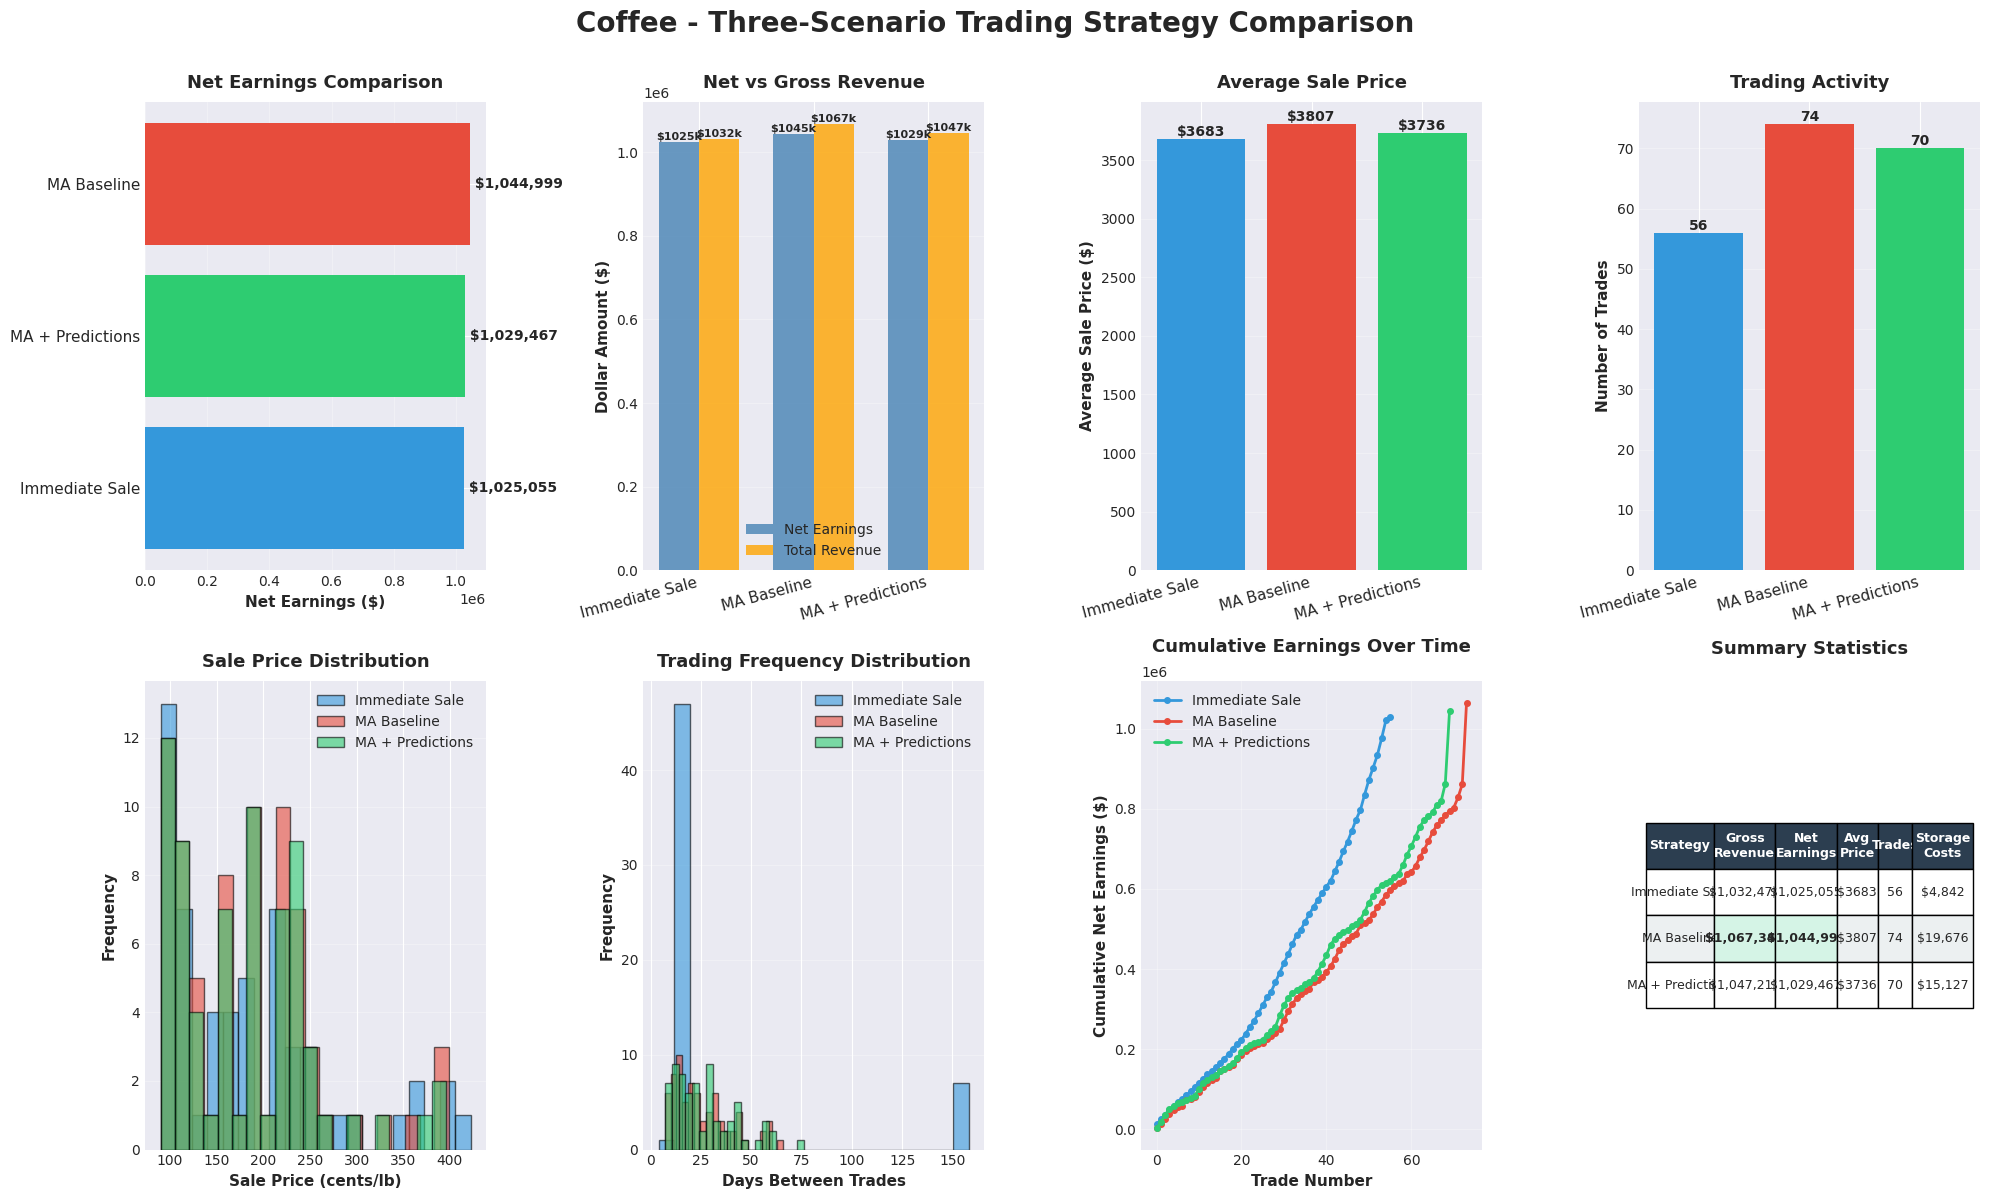


────────────────────────────────────────────────────────────────────────────────
FINAL STATISTICAL REPORT
────────────────────────────────────────────────────────────────────────────────

COMMODITY: COFFEE
Analysis Date: 2025-10-29 17:24:48

────────────────────────────────────────────────────────────────────────────────
SCENARIO PERFORMANCE SUMMARY
────────────────────────────────────────────────────────────────────────────────

MA Baseline:
  Strategy: Moving Average
  Net Earnings: $1,044,999.00
  Average Sale Price: $3807.41
  Number of Trades: 74
  Total Storage Costs: $19,676
  Total Transaction Costs: $2,668

MA + Predictions:
  Strategy: Moving Average Predictive
  Net Earnings: $1,029,467.21
  Average Sale Price: $3735.60
  Number of Trades: 70
  Total Storage Costs: $15,127
  Total Transaction Costs: $2,618

Immediate Sale:
  Strategy: Immediate Sale
  Net Earnings: $1,025,054.57
  Average Sale Price: $3683.04
  Number of Trades: 56
  Total Storage Costs: $4,842
  Total Tran

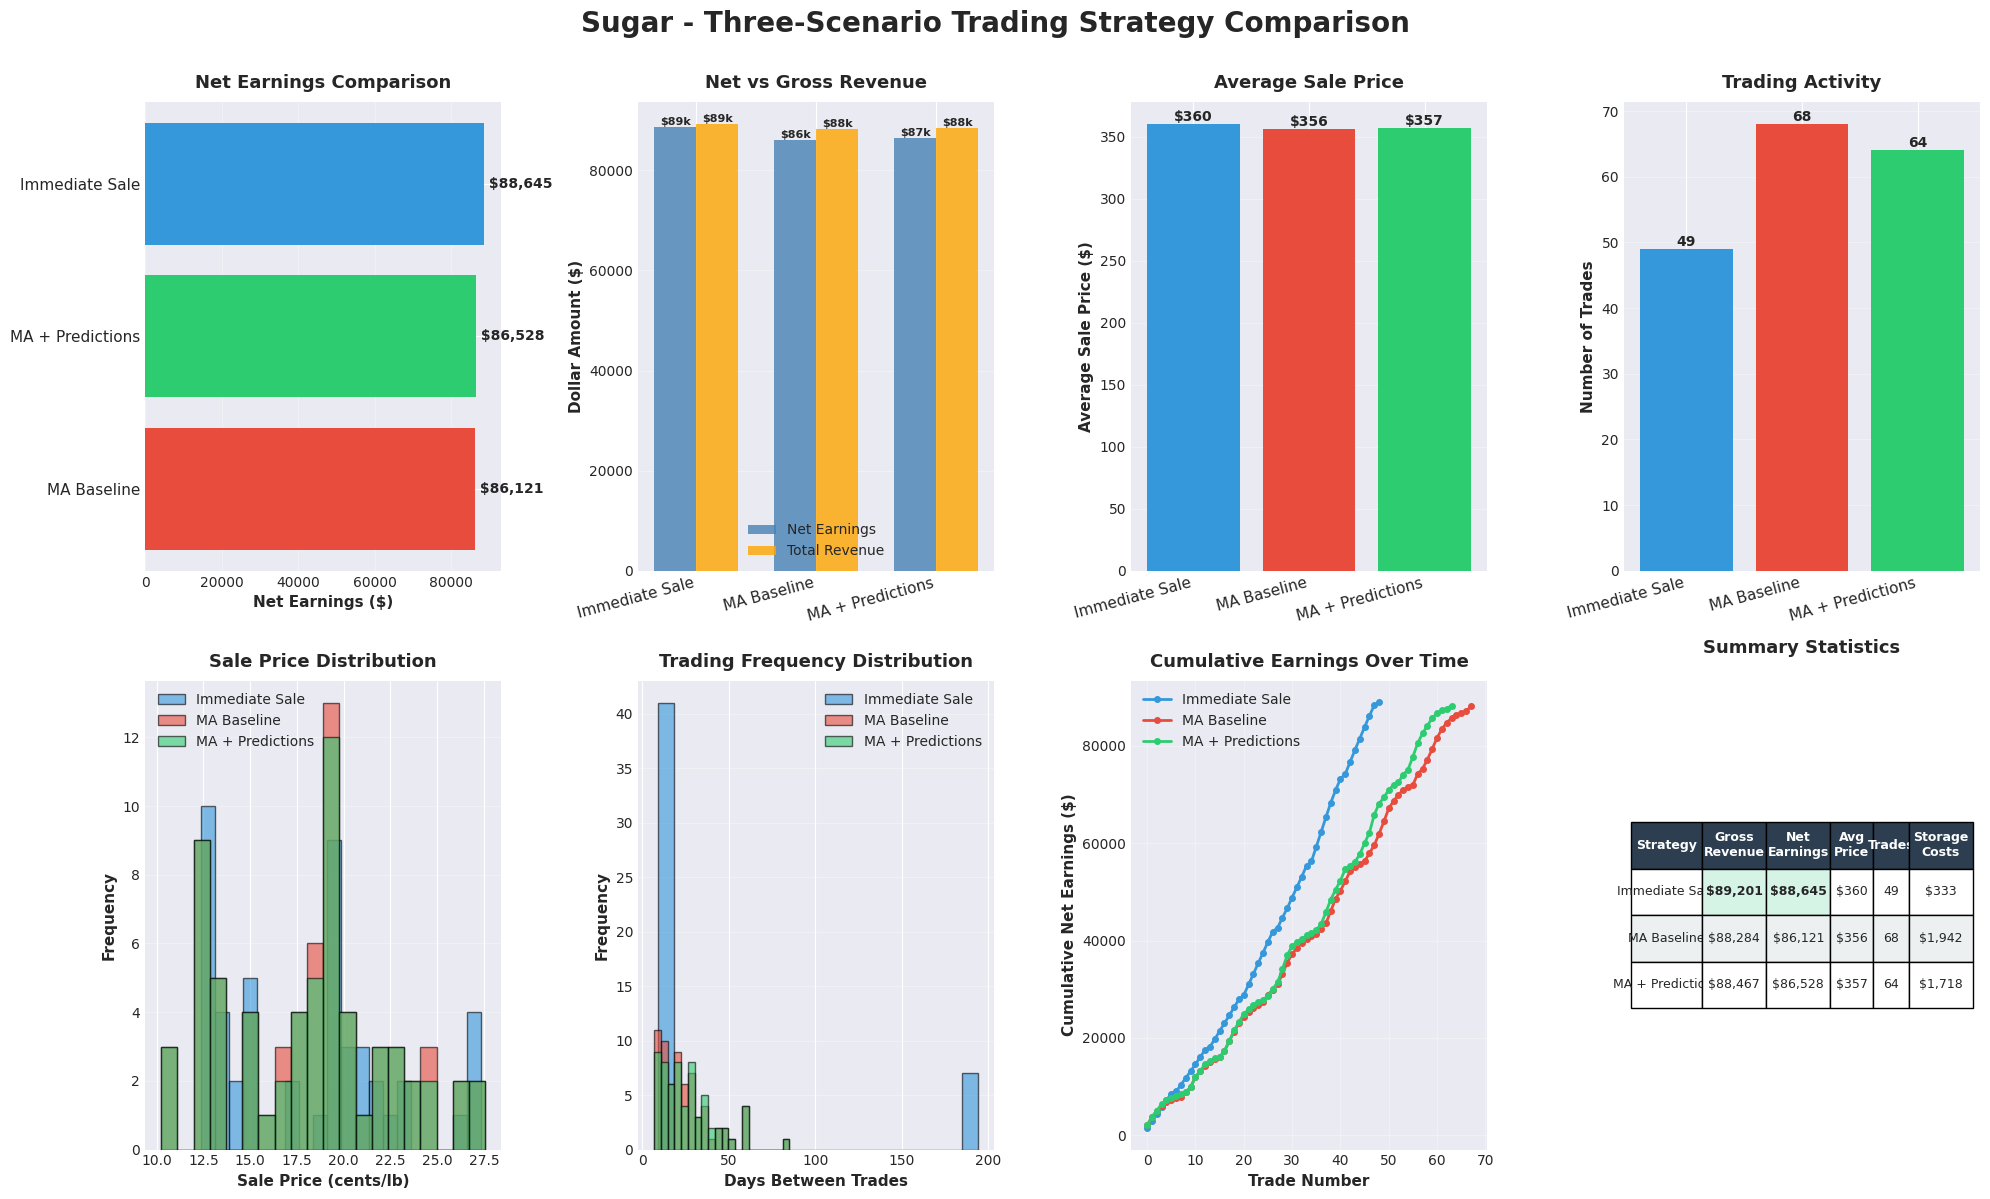


────────────────────────────────────────────────────────────────────────────────
FINAL STATISTICAL REPORT
────────────────────────────────────────────────────────────────────────────────

COMMODITY: SUGAR
Analysis Date: 2025-10-29 17:24:56

────────────────────────────────────────────────────────────────────────────────
SCENARIO PERFORMANCE SUMMARY
────────────────────────────────────────────────────────────────────────────────

Immediate Sale:
  Strategy: Immediate Sale
  Net Earnings: $88,645.06
  Average Sale Price: $360.00
  Number of Trades: 49
  Total Storage Costs: $333
  Total Transaction Costs: $223

MA + Predictions:
  Strategy: Moving Average Predictive
  Net Earnings: $86,528.02
  Average Sale Price: $357.04
  Number of Trades: 64
  Total Storage Costs: $1,718
  Total Transaction Costs: $221

MA Baseline:
  Strategy: Moving Average
  Net Earnings: $86,121.15
  Average Sale Price: $356.30
  Number of Trades: 68
  Total Storage Costs: $1,942
  Total Transaction Costs: $221



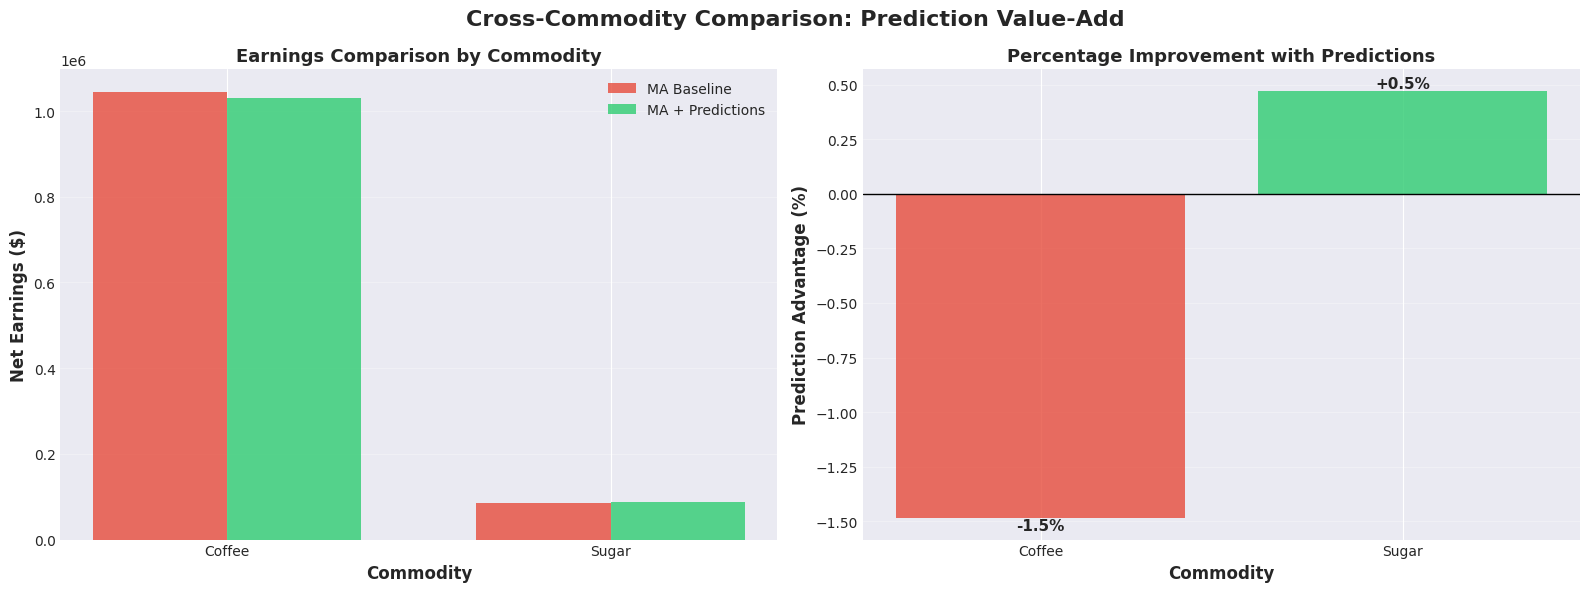


ALL COMMODITIES ANALYZED
Commodities processed: Coffee, Sugar

BLOCK 09 COMPLETE

All analysis outputs saved to: /Volumes/commodity/silver/trading_agent_volume/
  • Individual commodity dashboards (PNG)
  • Comparison tables (CSV)
  • Detailed analysis (PKL)
  • Text reports (TXT)
  • Cross-commodity comparison (PNG, CSV)


In [0]:
# NOTEBOOK 09: THREE-SCENARIO FOCUSED ANALYSIS (MULTI-COMMODITY)
# ============================================================================
# Databricks notebook source
# MAGIC %md
# MAGIC # Block 09: Moving Average vs Predictions vs Immediate Sale Analysis
# MAGIC 
# MAGIC This analysis focuses on three key scenarios for each commodity:
# MAGIC 1. Moving Average Baseline (no predictions)
# MAGIC 2. Moving Average with Predictions
# MAGIC 3. Immediate Sale (simple equal batches)
# MAGIC 
# MAGIC Key Question: **Do predictions add value to the moving average strategy?**

# COMMAND ----------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("BLOCK 09: THREE-SCENARIO COMPARATIVE ANALYSIS")
print("="*80)

# COMMAND ----------

# MAGIC %md
# MAGIC ## Configuration

# COMMAND ----------

# Commodities to analyze
COMMODITIES = ['coffee', 'sugar']
BASE_PATH = '/Volumes/commodity/silver/trading_agent_volume'

# Store results across all commodities
all_commodity_summaries = []

# Color scheme for consistency
COLORS = {'Immediate Sale': '#3498db', 'MA Baseline': '#e74c3c', 'MA + Predictions': '#2ecc71'}

# COMMAND ----------

# MAGIC %md
# MAGIC ## Analysis Functions

# COMMAND ----------

def bootstrap_metric(strategy_name, detailed_results, metric='net_earnings', n_bootstrap=1000, seed=42):
    """
    Calculate bootstrap confidence intervals for a strategy's performance metric.
    
    This resamples trades with replacement to estimate the distribution of outcomes.
    """
    np.random.seed(seed)
    
    # Get the detailed results for this strategy
    # detailed_results is a dict with strategy names as keys
    if strategy_name not in detailed_results:
        return None, None, None
    
    strat_data = detailed_results[strategy_name]
    
    if 'trades' not in strat_data or len(strat_data['trades']) == 0:
        return None, None, None
    
    trades_df = pd.DataFrame(strat_data['trades'])
    
    if len(trades_df) == 0:
        return None, None, None
    
    # Bootstrap resampling
    bootstrap_samples = []
    for _ in range(n_bootstrap):
        # Resample trades with replacement
        sample_trades = trades_df.sample(n=len(trades_df), replace=True)
        
        # Calculate metric for this bootstrap sample
        if metric == 'net_earnings':
            # Recalculate net earnings from the resampled trades
            # Trade structure: 'revenue', 'transaction_cost', 'net_revenue'
            # Note: storage costs are tracked separately in the simulation
            gross_revenue = sample_trades['revenue'].sum()
            transaction_costs = sample_trades['transaction_cost'].sum()
            # We can't recalculate storage costs from trades alone, so use net_revenue
            sample_metric = sample_trades['net_revenue'].sum()
        elif metric == 'total_revenue':
            # Total revenue before any costs
            sample_metric = sample_trades['revenue'].sum()
        elif metric == 'avg_sale_price':
            # Trade structure: 'price' (in cents/lb), 'amount' (in tons)
            sample_metric = (sample_trades['amount'] * sample_trades['price']).sum() / sample_trades['amount'].sum()
        else:
            sample_metric = sample_trades[metric].mean()
        
        bootstrap_samples.append(sample_metric)
    
    # Calculate confidence intervals
    ci_lower = np.percentile(bootstrap_samples, 2.5)
    ci_upper = np.percentile(bootstrap_samples, 97.5)
    mean_estimate = np.mean(bootstrap_samples)
    
    return mean_estimate, ci_lower, ci_upper

# COMMAND ----------

# MAGIC %md
# MAGIC ## Loop Through Each Commodity

# COMMAND ----------

for COMMODITY in COMMODITIES:
    print("\n" + "="*80)
    print(f"ANALYZING: {COMMODITY.upper()}")
    print("="*80)
    
    try:
        # ====================================================================
        # 1. Load Results from Prior Runs
        # ====================================================================
        print(f"\n📊 Loading results for {COMMODITY.upper()}...")
        
        # Load main results
        results_path = f'{BASE_PATH}/results_{COMMODITY}.csv'
        results_df = pd.read_csv(results_path)
        
        # Load detailed results (contains transaction-level data)
        detailed_path = f'{BASE_PATH}/results_detailed_{COMMODITY}.pkl'
        with open(detailed_path, 'rb') as f:
            detailed_results = pickle.load(f)
        
        print(f"✓ Loaded {len(results_df)} strategy results")
        print(f"✓ Loaded detailed results for {len(detailed_results)} strategies")
    
    except FileNotFoundError as e:
        print(f"⚠️  Could not load results for {COMMODITY}: {e}")
        print(f"   Skipping {COMMODITY}...")
        continue
    
    # ====================================================================
    # 2. Extract the Three Scenarios
    # ====================================================================
    print(f"\n{'─'*80}")
    print("EXTRACTING THREE SCENARIOS")
    print(f"{'─'*80}")
    
    # First, show all available strategies
    print(f"\nAvailable strategies in {COMMODITY} results:")
    for i, strat in enumerate(results_df['strategy'].unique(), 1):
        earnings = results_df[results_df['strategy'] == strat]['net_earnings'].values[0]
        print(f"  {i}. {strat} (${earnings:,.0f})")
    
    # Define the three scenarios with EXACT strategy names from the notebook
    # Based on notebook code:
    # - ImmediateSaleStrategy() → "Immediate Sale"
    # - MovingAverageStrategy() → "Moving Average"
    # - MovingAveragePredictive() → "Moving Average Predictive"
    
    SCENARIO_NAMES = {
        'Immediate Sale': 'Immediate Sale',
        'MA Baseline': 'Moving Average',
        'MA + Predictions': 'Moving Average Predictive'
    }
    
    print(f"\nSearching for three key scenarios...")
    
    # Extract relevant strategies
    three_scenarios = []
    
    for label, exact_name in SCENARIO_NAMES.items():
        # Find exact match
        match = results_df[results_df['strategy'] == exact_name]
        
        if len(match) > 0:
            best = match.iloc[0]
            three_scenarios.append({
                'label': label,
                'strategy_name': best['strategy'],
                'data': best.to_dict()
            })
            print(f"✓ Found {label}: {best['strategy']}")
        else:
            print(f"⚠️  No match found for {label} (expected: '{exact_name}')")
    
    if len(three_scenarios) < 3:
        print(f"\n⚠️  Only found {len(three_scenarios)}/3 scenarios for {COMMODITY}")
        print(f"   Available strategies don't match expected patterns.")
        print(f"   Please check strategy names above and update SCENARIO_PATTERNS.")
        print(f"   Skipping {COMMODITY}...")
        continue
    
    # Create comparison dataframe
    comparison_df = pd.DataFrame([s['data'] for s in three_scenarios])
    comparison_df['label'] = [s['label'] for s in three_scenarios]
    
    print(f"\n✓ Extracted {len(comparison_df)} scenarios for analysis")
    
    # ====================================================================
    # 3. Statistical Testing: Do Predictions Add Value?
    # ====================================================================
    print(f"\n{'─'*80}")
    print("STATISTICAL ANALYSIS: PREDICTIONS VALUE-ADD")
    print(f"{'─'*80}")
    
    # Extract MA baseline and MA prediction results
    ma_baseline = comparison_df[comparison_df['label'] == 'MA Baseline'].iloc[0]
    ma_prediction = comparison_df[comparison_df['label'] == 'MA + Predictions'].iloc[0]
    immediate_sale = comparison_df[comparison_df['label'] == 'Immediate Sale'].iloc[0]
    
    # Calculate key differences
    earnings_diff = ma_prediction['net_earnings'] - ma_baseline['net_earnings']
    earnings_pct = (earnings_diff / ma_baseline['net_earnings']) * 100
    
    revenue_diff = ma_prediction['total_revenue'] - ma_baseline['total_revenue']
    revenue_pct = (revenue_diff / ma_baseline['total_revenue']) * 100
    
    price_diff = ma_prediction['avg_sale_price'] - ma_baseline['avg_sale_price']
    price_pct = (price_diff / ma_baseline['avg_sale_price']) * 100
    
    print(f"\n1. NET EARNINGS COMPARISON (After Costs)")
    print(f"   MA Baseline:      ${ma_baseline['net_earnings']:,.2f}")
    print(f"   MA + Predictions: ${ma_prediction['net_earnings']:,.2f}")
    print(f"   Difference:       ${earnings_diff:,.2f} ({earnings_pct:+.2f}%)")
    print(f"   Status:           {'✓ PREDICTIONS ADD VALUE' if earnings_diff > 0 else '✗ PREDICTIONS REDUCE VALUE'}")
    
    print(f"\n2. TOTAL REVENUE COMPARISON (Before Costs)")
    print(f"   MA Baseline:      ${ma_baseline['total_revenue']:,.2f}")
    print(f"   MA + Predictions: ${ma_prediction['total_revenue']:,.2f}")
    print(f"   Difference:       ${revenue_diff:,.2f} ({revenue_pct:+.2f}%)")
    print(f"   Status:           {'✓ PREDICTIONS ADD VALUE' if revenue_diff > 0 else '✗ PREDICTIONS REDUCE VALUE'}")
    
    # Identify if there's a disconnect
    if (earnings_diff > 0 and revenue_diff < 0) or (earnings_diff < 0 and revenue_diff > 0):
        print(f"\n   ⚠️  IMPORTANT: Net and gross revenue show OPPOSITE results!")
        print(f"      This suggests cost assumptions are driving the difference.")
    
    print(f"\n3. AVERAGE PRICE COMPARISON")
    print(f"   MA Baseline:      ${ma_baseline['avg_sale_price']:.2f}")
    print(f"   MA + Predictions: ${ma_prediction['avg_sale_price']:.2f}")
    print(f"   Difference:       ${price_diff:.2f} ({price_pct:+.2f}%)")
    
    print(f"\n4. COST ANALYSIS")
    print(f"   MA Baseline:")
    print(f"      Storage costs:     ${ma_baseline['storage_costs']:,.2f}")
    print(f"      Transaction costs: ${ma_baseline['transaction_costs']:,.2f}")
    print(f"      Total costs:       ${ma_baseline['total_costs']:,.2f}")
    print(f"   MA + Predictions:")
    print(f"      Storage costs:     ${ma_prediction['storage_costs']:,.2f}")
    print(f"      Transaction costs: ${ma_prediction['transaction_costs']:,.2f}")
    print(f"      Total costs:       ${ma_prediction['total_costs']:,.2f}")
    print(f"   Cost difference:      ${ma_prediction['total_costs'] - ma_baseline['total_costs']:+,.2f}")
    
    print(f"\n5. TRADING BEHAVIOR")
    print(f"   MA Baseline trades:      {ma_baseline['n_trades']:.0f}")
    print(f"   MA + Predictions trades: {ma_prediction['n_trades']:.0f}")
    print(f"   Immediate Sale trades:       {immediate_sale['n_trades']:.0f}")
    
    # Calculate metrics vs batch sale baseline
    immediate_sale_earnings_diff = ma_prediction['net_earnings'] - immediate_sale['net_earnings']
    immediate_sale_earnings_pct = (immediate_sale_earnings_diff / immediate_sale['net_earnings']) * 100
    
    print(f"\n6. COMPARISON TO IMMEDIATE SALE (Simplest Strategy)")
    print(f"   Immediate Sale:       ${immediate_sale['net_earnings']:,.2f}")
    print(f"   MA Baseline:      ${ma_baseline['net_earnings']:,.2f} ({(ma_baseline['net_earnings']/immediate_sale['net_earnings']-1)*100:+.1f}%)")
    print(f"   MA + Predictions: ${ma_prediction['net_earnings']:,.2f} ({batch_earnings_pct:+.1f}%)")
    
    # ====================================================================
    # 4. Bootstrap Confidence Intervals
    # ====================================================================
    print(f"\n{'─'*80}")
    print("BOOTSTRAP CONFIDENCE INTERVALS (95%)")
    print(f"{'─'*80}")
    print("Resampling trades 1,000 times to assess outcome uncertainty...\n")
    
    # Calculate bootstrap CIs for all three scenarios (both net earnings and total revenue)
    ci_results = {}
    for scenario in three_scenarios:
        label = scenario['label']
        strategy_name = scenario['strategy_name']
        
        # Net earnings
        mean_earnings, ci_low_earnings, ci_high_earnings = bootstrap_metric(strategy_name, detailed_results, 'net_earnings')
        
        # Total revenue
        mean_revenue, ci_low_revenue, ci_high_revenue = bootstrap_metric(strategy_name, detailed_results, 'total_revenue')
        
        if mean_earnings is not None:
            ci_results[label] = {
                'mean_earnings': mean_earnings,
                'ci_low_earnings': ci_low_earnings,
                'ci_high_earnings': ci_high_earnings,
                'ci_width_earnings': ci_high_earnings - ci_low_earnings,
                'mean_revenue': mean_revenue,
                'ci_low_revenue': ci_low_revenue,
                'ci_high_revenue': ci_high_revenue,
                'ci_width_revenue': ci_high_revenue - ci_low_revenue
            }
            
            print(f"{label}:")
            print(f"  Net Earnings:  ${mean_earnings:,.2f}  [${ci_low_earnings:,.2f}, ${ci_high_earnings:,.2f}]")
            print(f"  Total Revenue: ${mean_revenue:,.2f}  [${ci_low_revenue:,.2f}, ${ci_high_revenue:,.2f}]")
            print(f"  CI Width: ${ci_high_earnings - ci_low_earnings:,.2f} (net) / ${ci_high_revenue - ci_low_revenue:,.2f} (gross)\n")
    
    # Check if CIs overlap
    ci_overlap_net = None
    ci_overlap_revenue = None
    if 'MA Baseline' in ci_results and 'MA + Predictions' in ci_results:
        baseline_ci = ci_results['MA Baseline']
        prediction_ci = ci_results['MA + Predictions']
        
        # Check net earnings overlap
        ci_overlap_net = not (baseline_ci['ci_high_earnings'] < prediction_ci['ci_low_earnings'] or 
                              prediction_ci['ci_high_earnings'] < baseline_ci['ci_low_earnings'])
        
        # Check total revenue overlap
        ci_overlap_revenue = not (baseline_ci['ci_high_revenue'] < prediction_ci['ci_low_revenue'] or 
                                  prediction_ci['ci_high_revenue'] < baseline_ci['ci_low_revenue'])
        
        print("CONFIDENCE INTERVAL OVERLAP ANALYSIS:")
        print("\n  Net Earnings:")
        if ci_overlap_net:
            print("     ⚠️  Confidence intervals OVERLAP")
            print("     → Difference may not be statistically significant")
        else:
            print("     ✓ Confidence intervals DO NOT overlap")
            print("     → Difference is likely statistically significant")
        
        print("\n  Total Revenue:")
        if ci_overlap_revenue:
            print("     ⚠️  Confidence intervals OVERLAP")
            print("     → Difference may not be statistically significant")
        else:
            print("     ✓ Confidence intervals DO NOT overlap")
            print("     → Difference is likely statistically significant")
    
    # ====================================================================
    # 5. Trade-by-Trade Analysis
    # ====================================================================
    print(f"\n{'─'*80}")
    print("TRADE-BY-TRADE COMPARISON")
    print(f"{'─'*80}")
    
    # Extract trade details for MA baseline and MA prediction
    trades_analysis = {}
    
    for scenario in three_scenarios:
        label = scenario['label']
        strategy_name = scenario['strategy_name']
        
        # Get from detailed results dictionary
        if strategy_name in detailed_results:
            result = detailed_results[strategy_name]
            if 'trades' in result and len(result['trades']) > 0:
                trades_df = pd.DataFrame(result['trades'])
                trades_analysis[label] = trades_df
    
    # Compare trade distributions
    t_stat, p_value, cohens_d = None, None, None
    if 'MA Baseline' in trades_analysis and 'MA + Predictions' in trades_analysis:
        baseline_trades = trades_analysis['MA Baseline']
        prediction_trades = trades_analysis['MA + Predictions']
        
        # Calculate days held if we have the data
        if 'day' in baseline_trades.columns:
            # Estimate days held from cumulative days (rough approximation)
            baseline_trades['days_held'] = baseline_trades['day'].diff().fillna(0)
            prediction_trades['days_held'] = prediction_trades['day'].diff().fillna(0)
        
        print(f"\nTRADE STATISTICS:")
        print(f"\nMA Baseline:")
        print(f"  Total trades: {len(baseline_trades)}")
        print(f"  Avg sale price: ${baseline_trades['price'].mean():.2f}")
        print(f"  Std sale price: ${baseline_trades['price'].std():.2f}")
        print(f"  Avg quantity: {baseline_trades['amount'].mean():.2f} tons")
        if 'days_held' in baseline_trades.columns:
            print(f"  Avg days between trades: {baseline_trades['days_held'].mean():.1f}")
        
        print(f"\nMA + Predictions:")
        print(f"  Total trades: {len(prediction_trades)}")
        print(f"  Avg sale price: ${prediction_trades['price'].mean():.2f}")
        print(f"  Std sale price: ${prediction_trades['price'].std():.2f}")
        print(f"  Avg quantity: {prediction_trades['amount'].mean():.2f} tons")
        if 'days_held' in prediction_trades.columns:
            print(f"  Avg days between trades: {prediction_trades['days_held'].mean():.1f}")
        
        # Statistical test on sale prices
        t_stat, p_value = stats.ttest_ind(prediction_trades['price'], 
                                           baseline_trades['price'])
        
        print(f"\nT-TEST ON SALE PRICES:")
        print(f"  t-statistic: {t_stat:.4f}")
        print(f"  p-value: {p_value:.4f}")
        print(f"  Result: {'✓ Significantly different' if p_value < 0.05 else '✗ Not significantly different'} (α=0.05)")
        
        # Effect size (Cohen's d)
        pooled_std = np.sqrt((baseline_trades['price'].std()**2 + 
                             prediction_trades['price'].std()**2) / 2)
        cohens_d = (prediction_trades['price'].mean() - 
                    baseline_trades['price'].mean()) / pooled_std
        
        print(f"  Cohen's d: {cohens_d:.4f}")
        
        # Interpret effect size
        if abs(cohens_d) < 0.2:
            effect = "negligible"
        elif abs(cohens_d) < 0.5:
            effect = "small"
        elif abs(cohens_d) < 0.8:
            effect = "medium"
        else:
            effect = "large"
        
        print(f"  Effect size: {effect}")
    
    # ====================================================================
    # 6. Visualization: Comprehensive Dashboard
    # ====================================================================
    print(f"\n{'─'*80}")
    print("GENERATING VISUALIZATIONS")
    print(f"{'─'*80}")
    
    # Create comprehensive figure
    fig = plt.figure(figsize=(20, 12))
    fig.suptitle(f'{COMMODITY.title()} - Three-Scenario Trading Strategy Comparison', 
                 fontsize=20, fontweight='bold', y=0.995)
    
    # ====================================================================
    # PLOT 1: Earnings Comparison
    # ====================================================================
    ax1 = plt.subplot(2, 4, 1)
    
    scenarios_sorted = comparison_df.sort_values('net_earnings', ascending=True)
    bars = ax1.barh(range(len(scenarios_sorted)), scenarios_sorted['net_earnings'], 
                    color=[COLORS[label] for label in scenarios_sorted['label']])
    
    # Add value labels
    for i, (idx, row) in enumerate(scenarios_sorted.iterrows()):
        ax1.text(row['net_earnings'], i, f" ${row['net_earnings']:,.0f}", 
                va='center', fontsize=10, fontweight='bold')
    
    ax1.set_yticks(range(len(scenarios_sorted)))
    ax1.set_yticklabels(scenarios_sorted['label'], fontsize=11)
    ax1.set_xlabel('Net Earnings ($)', fontsize=11, fontweight='bold')
    ax1.set_title('Net Earnings Comparison', fontsize=13, fontweight='bold', pad=10)
    ax1.grid(axis='x', alpha=0.3)
    
    # ====================================================================
    # PLOT 2: Net Earnings vs Total Revenue Comparison
    # ====================================================================
    ax2 = plt.subplot(2, 4, 2)
    
    x = np.arange(len(comparison_df))
    width = 0.35
    
    bars1 = ax2.bar(x - width/2, comparison_df['net_earnings'], width,
                    label='Net Earnings', color='steelblue', alpha=0.8)
    bars2 = ax2.bar(x + width/2, comparison_df['total_revenue'], width,
                    label='Total Revenue', color='orange', alpha=0.8)
    
    # Add value labels
    for i, (idx, row) in enumerate(comparison_df.iterrows()):
        ax2.text(i - width/2, row['net_earnings'], f"${row['net_earnings']/1000:.0f}k",
                ha='center', va='bottom', fontsize=8, fontweight='bold')
        ax2.text(i + width/2, row['total_revenue'], f"${row['total_revenue']/1000:.0f}k",
                ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    ax2.set_xticks(x)
    ax2.set_xticklabels(comparison_df['label'], fontsize=11, rotation=15, ha='right')
    ax2.set_ylabel('Dollar Amount ($)', fontsize=11, fontweight='bold')
    ax2.set_title('Net vs Gross Revenue', fontsize=13, fontweight='bold', pad=10)
    ax2.legend(fontsize=10)
    ax2.grid(axis='y', alpha=0.3)
    
    # ====================================================================
    # PLOT 3: Average Sale Price
    # ====================================================================
    ax3 = plt.subplot(2, 4, 3)
    
    bars = ax3.bar(range(len(comparison_df)), comparison_df['avg_sale_price'],
                   color=[COLORS[label] for label in comparison_df['label']])
    
    # Add value labels
    for i, (idx, row) in enumerate(comparison_df.iterrows()):
        ax3.text(i, row['avg_sale_price'], f"${row['avg_sale_price']:.0f}", 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax3.set_xticks(range(len(comparison_df)))
    ax3.set_xticklabels(comparison_df['label'], fontsize=11, rotation=15, ha='right')
    ax3.set_ylabel('Average Sale Price ($)', fontsize=11, fontweight='bold')
    ax3.set_title('Average Sale Price', fontsize=13, fontweight='bold', pad=10)
    ax3.grid(axis='y', alpha=0.3)
    
    # ====================================================================
    # PLOT 4: Number of Trades
    # ====================================================================
    ax4 = plt.subplot(2, 4, 4)
    
    bars = ax4.bar(range(len(comparison_df)), comparison_df['n_trades'],
                   color=[COLORS[label] for label in comparison_df['label']])
    
    # Add value labels
    for i, (idx, row) in enumerate(comparison_df.iterrows()):
        ax4.text(i, row['n_trades'], f"{row['n_trades']:.0f}", 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax4.set_xticks(range(len(comparison_df)))
    ax4.set_xticklabels(comparison_df['label'], fontsize=11, rotation=15, ha='right')
    ax4.set_ylabel('Number of Trades', fontsize=11, fontweight='bold')
    ax4.set_title('Trading Activity', fontsize=13, fontweight='bold', pad=10)
    ax4.grid(axis='y', alpha=0.3)
    
    # ====================================================================
    # PLOT 5: Sale Price Distribution (if trade data available)
    # ====================================================================
    ax5 = plt.subplot(2, 4, 5)
    
    if len(trades_analysis) > 0:
        for label, trades_df in trades_analysis.items():
            if len(trades_df) > 0:
                ax5.hist(trades_df['price'], bins=20, alpha=0.6, 
                        label=label, color=COLORS[label], edgecolor='black')
        
        ax5.set_xlabel('Sale Price (cents/lb)', fontsize=11, fontweight='bold')
        ax5.set_ylabel('Frequency', fontsize=11, fontweight='bold')
        ax5.set_title('Sale Price Distribution', fontsize=13, fontweight='bold', pad=10)
        ax5.legend(fontsize=10)
        ax5.grid(axis='y', alpha=0.3)
    else:
        ax5.text(0.5, 0.5, 'Trade-level data\nnot available', 
                ha='center', va='center', transform=ax5.transAxes, fontsize=12)
        ax5.set_title('Sale Price Distribution', fontsize=13, fontweight='bold', pad=10)
    
    # ====================================================================
    # PLOT 6: Days Between Trades Distribution
    # ====================================================================
    ax6 = plt.subplot(2, 4, 6)
    
    if len(trades_analysis) > 0:
        has_data = False
        for label, trades_df in trades_analysis.items():
            if len(trades_df) > 0 and 'day' in trades_df.columns:
                # Calculate days between consecutive trades
                days_between = trades_df['day'].diff().dropna()
                if len(days_between) > 0:
                    ax6.hist(days_between, bins=20, alpha=0.6, 
                            label=label, color=COLORS[label], edgecolor='black')
                    has_data = True
        
        if has_data:
            ax6.set_xlabel('Days Between Trades', fontsize=11, fontweight='bold')
            ax6.set_ylabel('Frequency', fontsize=11, fontweight='bold')
            ax6.set_title('Trading Frequency Distribution', fontsize=13, fontweight='bold', pad=10)
            ax6.legend(fontsize=10)
            ax6.grid(axis='y', alpha=0.3)
        else:
            ax6.text(0.5, 0.5, 'Trade timing data\nnot available', 
                    ha='center', va='center', transform=ax6.transAxes, fontsize=12)
            ax6.set_title('Trading Frequency Distribution', fontsize=13, fontweight='bold', pad=10)
    else:
        ax6.text(0.5, 0.5, 'Trade-level data\nnot available', 
                ha='center', va='center', transform=ax6.transAxes, fontsize=12)
        ax6.set_title('Trading Frequency Distribution', fontsize=13, fontweight='bold', pad=10)
    
    # ====================================================================
    # PLOT 7: Cumulative Earnings (if trade data available)
    # ====================================================================
    ax7 = plt.subplot(2, 4, 7)
    
    if len(trades_analysis) > 0:
        for label, trades_df in trades_analysis.items():
            if len(trades_df) > 0 and 'date' in trades_df.columns:
                # Sort by date and calculate cumulative net revenue
                trades_sorted = trades_df.sort_values('date').copy()
                trades_sorted['cumulative_net'] = trades_sorted['net_revenue'].cumsum()
                
                ax7.plot(range(len(trades_sorted)), trades_sorted['cumulative_net'], 
                        marker='o', markersize=4, label=label, color=COLORS[label], linewidth=2)
        
        ax7.set_xlabel('Trade Number', fontsize=11, fontweight='bold')
        ax7.set_ylabel('Cumulative Net Earnings ($)', fontsize=11, fontweight='bold')
        ax7.set_title('Cumulative Earnings Over Time', fontsize=13, fontweight='bold', pad=10)
        ax7.legend(fontsize=10)
        ax7.grid(alpha=0.3)
    else:
        ax7.text(0.5, 0.5, 'Trade-level data\nnot available', 
                ha='center', va='center', transform=ax7.transAxes, fontsize=12)
        ax7.set_title('Cumulative Earnings Over Time', fontsize=13, fontweight='bold', pad=10)
    
    # ====================================================================
    # PLOT 8: Summary Statistics Table
    # ====================================================================
    ax8 = plt.subplot(2, 4, 8)
    ax8.axis('off')
    
    # Prepare summary data
    summary_data = []
    for _, row in comparison_df.iterrows():
        summary_data.append([
            row['label'],
            f"${row['total_revenue']:,.0f}",
            f"${row['net_earnings']:,.0f}",
            f"${row['avg_sale_price']:.0f}",
            f"{row['n_trades']:.0f}",
            f"${row['storage_costs']:,.0f}"
        ])
    
    # Create table
    table = ax8.table(cellText=summary_data,
                     colLabels=['Strategy', 'Gross\nRevenue', 'Net\nEarnings', 
                               'Avg\nPrice', 'Trades', 'Storage\nCosts'],
                     cellLoc='center',
                     loc='center',
                     colWidths=[0.20, 0.18, 0.18, 0.12, 0.10, 0.18])
    
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2.5)
    
    # Style the header
    for i in range(6):
        cell = table[(0, i)]
        cell.set_facecolor('#2c3e50')
        cell.set_text_props(weight='bold', color='white', fontsize=9)
    
    # Style the rows
    for i in range(1, len(summary_data) + 1):
        for j in range(6):
            cell = table[(i, j)]
            if i % 2 == 0:
                cell.set_facecolor('#ecf0f1')
            # Highlight best values
            if j == 1:  # Gross revenue column
                if summary_data[i-1][1] == max([row[1] for row in summary_data]):
                    cell.set_facecolor('#d5f4e6')
                    cell.set_text_props(weight='bold')
            elif j == 2:  # Net earnings column
                if summary_data[i-1][2] == max([row[2] for row in summary_data]):
                    cell.set_facecolor('#d5f4e6')
                    cell.set_text_props(weight='bold')
    
    ax8.set_title('Summary Statistics', fontsize=13, fontweight='bold', pad=20)
    
    plt.tight_layout(rect=[0, 0, 1, 0.99])
    
    # Save figure
    output_path = f'{BASE_PATH}/three_scenario_analysis_{COMMODITY}.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"\n✓ Saved comprehensive dashboard: {output_path}")
    
    # Display in notebook
    plt.show()
    plt.close()
    
    # ====================================================================
    # 7. Detailed Statistical Report
    # ====================================================================
    print(f"\n{'─'*80}")
    print("FINAL STATISTICAL REPORT")
    print(f"{'─'*80}")
    
    print(f"\nCOMMODITY: {COMMODITY.upper()}")
    print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    
    print(f"\n{'─'*80}")
    print("SCENARIO PERFORMANCE SUMMARY")
    print(f"{'─'*80}")
    
    for _, row in comparison_df.sort_values('net_earnings', ascending=False).iterrows():
        print(f"\n{row['label']}:")
        print(f"  Strategy: {row['strategy']}")
        print(f"  Net Earnings: ${row['net_earnings']:,.2f}")
        print(f"  Average Sale Price: ${row['avg_sale_price']:.2f}")
        print(f"  Number of Trades: {row['n_trades']:.0f}")
        print(f"  Total Storage Costs: ${row['storage_costs']:,.0f}")
        print(f"  Total Transaction Costs: ${row['transaction_costs']:,.0f}")
    
    print(f"\n{'─'*80}")
    print("KEY FINDINGS: DO PREDICTIONS ADD VALUE?")
    print(f"{'─'*80}")
    
    # Calculate key metrics
    ma_baseline_earnings = ma_baseline['net_earnings']
    ma_prediction_earnings = ma_prediction['net_earnings']
    earnings_advantage = ma_prediction_earnings - ma_baseline_earnings
    pct_advantage = (earnings_advantage / ma_baseline_earnings) * 100
    
    ma_baseline_revenue = ma_baseline['total_revenue']
    ma_prediction_revenue = ma_prediction['total_revenue']
    revenue_advantage = ma_prediction_revenue - ma_baseline_revenue
    revenue_pct_advantage = (revenue_advantage / ma_baseline_revenue) * 100
    
    print(f"\n1. NET EARNINGS IMPROVEMENT (After Costs)")
    print(f"   Moving Average Baseline: ${ma_baseline_earnings:,.2f}")
    print(f"   Moving Average + Predictions: ${ma_prediction_earnings:,.2f}")
    print(f"   Absolute Difference: ${earnings_advantage:,.2f}")
    print(f"   Percentage Improvement: {pct_advantage:+.2f}%")
    
    if earnings_advantage > 0:
        print(f"   ✓ VERDICT: Predictions ADD value on net earnings")
        print(f"     Predictions improve net earnings by {pct_advantage:.1f}%")
    else:
        print(f"   ✗ VERDICT: Predictions DO NOT add value on net earnings")
        print(f"     Predictions reduce net earnings by {abs(pct_advantage):.1f}%")
    
    print(f"\n2. TOTAL REVENUE IMPROVEMENT (Before Costs)")
    print(f"   Moving Average Baseline: ${ma_baseline_revenue:,.2f}")
    print(f"   Moving Average + Predictions: ${ma_prediction_revenue:,.2f}")
    print(f"   Absolute Difference: ${revenue_advantage:,.2f}")
    print(f"   Percentage Improvement: {revenue_pct_advantage:+.2f}%")
    
    if revenue_advantage > 0:
        print(f"   ✓ VERDICT: Predictions ADD value on total revenue")
        print(f"     Predictions improve total revenue by {revenue_pct_advantage:.1f}%")
    else:
        print(f"   ✗ VERDICT: Predictions DO NOT add value on total revenue")
        print(f"     Predictions reduce total revenue by {abs(revenue_pct_advantage):.1f}%")
    
    # Check for disconnect between metrics
    if (earnings_advantage > 0 and revenue_advantage < 0) or (earnings_advantage < 0 and revenue_advantage > 0):
        print(f"\n   ⚠️  CRITICAL INSIGHT: Net and gross show OPPOSITE results!")
        print(f"      This means cost assumptions are driving the difference.")
        if revenue_advantage > 0 and earnings_advantage < 0:
            print(f"      → Predictions generate MORE revenue but HIGHER costs")
            cost_diff = ma_prediction['total_costs'] - ma_baseline['total_costs']
            print(f"      → Extra costs: ${cost_diff:,.2f} (storage: ${ma_prediction['storage_costs'] - ma_baseline['storage_costs']:,.2f})")
        elif revenue_advantage < 0 and earnings_advantage > 0:
            print(f"      → Predictions generate LESS revenue but LOWER costs")
            cost_diff = ma_baseline['total_costs'] - ma_prediction['total_costs']
            print(f"      → Cost savings: ${cost_diff:,.2f}")
    
    print(f"\n3. STATISTICAL SIGNIFICANCE")
    if 'MA Baseline' in ci_results and 'MA + Predictions' in ci_results:
        baseline_ci = ci_results['MA Baseline']
        prediction_ci = ci_results['MA + Predictions']
        
        print(f"   Net Earnings:")
        if ci_overlap_net:
            print(f"      ⚠️  95% Confidence intervals overlap")
            print(f"         Baseline CI: [${baseline_ci['ci_low_earnings']:,.0f}, ${baseline_ci['ci_high_earnings']:,.0f}]")
            print(f"         Prediction CI: [${prediction_ci['ci_low_earnings']:,.0f}, ${prediction_ci['ci_high_earnings']:,.0f}]")
            print(f"         → Difference may not be statistically significant")
        else:
            print(f"      ✓ 95% Confidence intervals DO NOT overlap")
            print(f"         Baseline CI: [${baseline_ci['ci_low_earnings']:,.0f}, ${baseline_ci['ci_high_earnings']:,.0f}]")
            print(f"         Prediction CI: [${prediction_ci['ci_low_earnings']:,.0f}, ${prediction_ci['ci_high_earnings']:,.0f}]")
            print(f"         → Difference is statistically significant")
        
        print(f"\n   Total Revenue:")
        if ci_overlap_revenue:
            print(f"      ⚠️  95% Confidence intervals overlap")
            print(f"         Baseline CI: [${baseline_ci['ci_low_revenue']:,.0f}, ${baseline_ci['ci_high_revenue']:,.0f}]")
            print(f"         Prediction CI: [${prediction_ci['ci_low_revenue']:,.0f}, ${prediction_ci['ci_high_revenue']:,.0f}]")
            print(f"         → Difference may not be statistically significant")
        else:
            print(f"      ✓ 95% Confidence intervals DO NOT overlap")
            print(f"         Baseline CI: [${baseline_ci['ci_low_revenue']:,.0f}, ${baseline_ci['ci_high_revenue']:,.0f}]")
            print(f"         Prediction CI: [${prediction_ci['ci_low_revenue']:,.0f}, ${prediction_ci['ci_high_revenue']:,.0f}]")
            print(f"         → Difference is statistically significant")
    
    print(f"\n4. TRADING BEHAVIOR")
    print(f"   MA Baseline: {ma_baseline['n_trades']:.0f} trades")
    print(f"   MA + Predictions: {ma_prediction['n_trades']:.0f} trades")
    trade_diff = ma_prediction['n_trades'] - ma_baseline['n_trades']
    print(f"   Difference: {trade_diff:+.0f} trades")
    
    if trade_diff > 0:
        print(f"   → Predictions lead to MORE trading activity")
    elif trade_diff < 0:
        print(f"   → Predictions lead to LESS trading activity")
    else:
        print(f"   → No change in trading frequency")
    
    print(f"\n5. COMPARISON TO IMMEDIATE SALE")
    immediate_sale_earnings = immediate_sale['net_earnings']
    immediate_sale_revenue = immediate_sale['total_revenue']
    ma_baseline_vs_imm_net = ((ma_baseline_earnings / immediate_sale_earnings) - 1) * 100
    ma_prediction_vs_imm_net = ((ma_prediction_earnings / immediate_sale_earnings) - 1) * 100
    ma_baseline_vs_imm_rev = ((ma_baseline_revenue / immediate_sale_revenue) - 1) * 100
    ma_prediction_vs_imm_rev = ((ma_prediction_revenue / immediate_sale_revenue) - 1) * 100
    
    print(f"   Net Earnings:")
    print(f"      Immediate Sale: ${immediate_sale_earnings:,.2f}")
    print(f"      MA Baseline: {ma_baseline_vs_imm_net:+.1f}%")
    print(f"      MA + Predictions: {ma_prediction_vs_imm_net:+.1f}%")
    
    print(f"   Total Revenue:")
    print(f"      Immediate Sale: ${immediate_sale_revenue:,.2f}")
    print(f"      MA Baseline: {ma_baseline_vs_imm_rev:+.1f}%")
    print(f"      MA + Predictions: {ma_prediction_vs_imm_rev:+.1f}%")
    
    print(f"\n{'─'*80}")
    print("RECOMMENDATION")
    print(f"{'─'*80}")
    
    # Generate recommendation based on all analysis
    # Consider both net earnings and total revenue
    if (earnings_advantage > 0 and pct_advantage > 5) or (revenue_advantage > 0 and revenue_pct_advantage > 5):
        if not ci_overlap_net:
            recommendation = "STRONG: Use predictions"
            print("\n✓ STRONG RECOMMENDATION: Use predictions")
            print("  Rationale:")
            if earnings_advantage > 0 and pct_advantage > 5:
                print(f"  • Predictions significantly improve net earnings ({pct_advantage:.1f}%)")
            if revenue_advantage > 0 and revenue_pct_advantage > 5:
                print(f"  • Predictions significantly improve total revenue ({revenue_pct_advantage:.1f}%)")
            print("  • Difference is statistically significant")
            print("  • Added complexity is justified by performance gain")
        else:
            recommendation = "WEAK: Use predictions"
            print("\n⚠️  WEAK RECOMMENDATION: Use predictions")
            print("  Rationale:")
            if earnings_advantage > 0:
                print(f"  • Predictions show improved net earnings ({pct_advantage:.1f}%)")
            if revenue_advantage > 0:
                print(f"  • Predictions show improved total revenue ({revenue_pct_advantage:.1f}%)")
            print("  • However, confidence intervals overlap")
            print("  • Consider gathering more data for conclusive results")
    elif (earnings_advantage > 0 and pct_advantage > 0) or (revenue_advantage > 0 and revenue_pct_advantage > 0):
        recommendation = "CONDITIONAL: Consider predictions"
        print("\n⚠️  CONDITIONAL RECOMMENDATION: Consider predictions")
        print("  Rationale:")
        if earnings_advantage > 0:
            print(f"  • Predictions show modest improvement in net earnings ({pct_advantage:.1f}%)")
        if revenue_advantage > 0:
            print(f"  • Predictions show modest improvement in total revenue ({revenue_pct_advantage:.1f}%)")
        if earnings_advantage < 0 and revenue_advantage > 0:
            print(f"  • ⚠️  Net earnings DECREASE but total revenue INCREASES")
            print(f"  • This suggests cost assumptions may be too conservative")
        print("  • Benefit may not justify added complexity")
        print("  • Stick with baseline MA unless marginal gains matter")
    else:
        recommendation = "DO NOT use predictions"
        print("\n✗ RECOMMENDATION: Do NOT use predictions")
        print("  Rationale:")
        print("  • Predictions reduce earnings")
        print("  • Baseline moving average performs better")
        print("  • Added complexity is not justified")
    
    print(f"\n{'='*80}")
    print(f"ANALYSIS COMPLETE - {COMMODITY.upper()}")
    print(f"{'='*80}\n")
    
    # ====================================================================
    # 8. Save Analysis Results
    # ====================================================================
    
    # Save the three-scenario comparison
    comparison_output = {
        'commodity': COMMODITY,
        'analysis_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'scenarios': comparison_df.to_dict('records'),
        'ma_baseline_earnings': ma_baseline_earnings,
        'ma_prediction_earnings': ma_prediction_earnings,
        'earnings_advantage': earnings_advantage,
        'pct_advantage': pct_advantage,
        'ma_baseline_revenue': ma_baseline_revenue,
        'ma_prediction_revenue': ma_prediction_revenue,
        'revenue_advantage': revenue_advantage,
        'revenue_pct_advantage': revenue_pct_advantage,
        'confidence_intervals': ci_results if len(ci_results) > 0 else None,
        'ci_overlap_net': ci_overlap_net,
        'ci_overlap_revenue': ci_overlap_revenue,
        't_statistic': t_stat,
        'p_value': p_value,
        'cohens_d': cohens_d,
        'recommendation': recommendation
    }
    
    # Save as pickle
    pkl_path = f'{BASE_PATH}/three_scenario_analysis_{COMMODITY}.pkl'
    with open(pkl_path, 'wb') as f:
        pickle.dump(comparison_output, f)
    print(f"✓ Saved analysis results: {pkl_path}")
    
    # Save as CSV for easy viewing
    csv_path = f'{BASE_PATH}/three_scenario_comparison_{COMMODITY}.csv'
    comparison_df.to_csv(csv_path, index=False)
    print(f"✓ Saved comparison table: {csv_path}")
    
    # Save detailed report as text
    report_path = f'{BASE_PATH}/three_scenario_report_{COMMODITY}.txt'
    with open(report_path, 'w') as f:
        f.write("="*80 + "\n")
        f.write("THREE-SCENARIO TRADING STRATEGY ANALYSIS\n")
        f.write("="*80 + "\n\n")
        f.write(f"Commodity: {COMMODITY.upper()}\n")
        f.write(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
        
        f.write("SCENARIOS ANALYZED:\n")
        f.write("-" * 80 + "\n")
        for _, row in comparison_df.iterrows():
            f.write(f"\n{row['label']}:\n")
            f.write(f"  Net Earnings: ${row['net_earnings']:,.2f}\n")
            f.write(f"  Avg Sale Price: ${row['avg_sale_price']:.2f}\n")
            f.write(f"  Trades: {row['n_trades']:.0f}\n")
        
        f.write("\n" + "="*80 + "\n")
        f.write("KEY FINDING: DO PREDICTIONS ADD VALUE?\n")
        f.write("="*80 + "\n\n")
        f.write(f"Earnings Advantage: ${earnings_advantage:,.2f} ({pct_advantage:+.2f}%)\n")
        
        if earnings_advantage > 0:
            f.write("\n✓ VERDICT: Predictions ADD value\n")
        else:
            f.write("\n✗ VERDICT: Predictions DO NOT add value\n")
        
        f.write(f"\nRecommendation: {recommendation}\n")
        
        f.write("\n" + "="*80 + "\n")
    
    print(f"✓ Saved detailed report: {report_path}")
    
    # Add to cross-commodity summary
    all_commodity_summaries.append({
        'commodity': COMMODITY,
        'ma_baseline_earnings': ma_baseline_earnings,
        'ma_prediction_earnings': ma_prediction_earnings,
        'immediate_sale_earnings': immediate_sale_earnings,
        'earnings_advantage': earnings_advantage,
        'pct_advantage': pct_advantage,
        'ma_baseline_revenue': ma_baseline_revenue,
        'ma_prediction_revenue': ma_prediction_revenue,
        'immediate_sale_revenue': immediate_sale_revenue,
        'revenue_advantage': revenue_advantage,
        'revenue_pct_advantage': revenue_pct_advantage,
        'ci_overlap_net': ci_overlap_net,
        'ci_overlap_revenue': ci_overlap_revenue,
        'p_value': p_value,
        'cohens_d': cohens_d,
        'recommendation': recommendation
    })

# COMMAND ----------

# MAGIC %md
# MAGIC ## Cross-Commodity Comparison

# COMMAND ----------

if len(all_commodity_summaries) > 0:
    print("\n" + "="*80)
    print("CROSS-COMMODITY COMPARISON")
    print("="*80)
    
    cross_df = pd.DataFrame(all_commodity_summaries)
    
    print("\nSummary across all commodities:")
    print("\nCommodity Performance:")
    for _, row in cross_df.iterrows():
        print(f"\n{row['commodity'].upper()}:")
        print(f"  MA Baseline:     ${row['ma_baseline_earnings']:,.2f}")
        print(f"  MA + Predictions: ${row['ma_prediction_earnings']:,.2f}")
        print(f"  Advantage:        ${row['earnings_advantage']:,.2f} ({row['pct_advantage']:+.1f}%)")
        print(f"  Recommendation:   {row['recommendation']}")
    
    # Save cross-commodity comparison
    cross_csv_path = f"{BASE_PATH}/cross_commodity_three_scenario_summary.csv"
    cross_df.to_csv(cross_csv_path, index=False)
    print(f"\n✓ Saved: {cross_csv_path}")
    
    # Create cross-commodity visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Cross-Commodity Comparison: Prediction Value-Add', 
                 fontsize=16, fontweight='bold')
    
    # Plot 1: Earnings comparison
    ax1 = axes[0]
    x = np.arange(len(cross_df))
    width = 0.35
    
    ax1.bar(x - width/2, cross_df['ma_baseline_earnings'], width, 
            label='MA Baseline', color='#e74c3c', alpha=0.8)
    ax1.bar(x + width/2, cross_df['ma_prediction_earnings'], width, 
            label='MA + Predictions', color='#2ecc71', alpha=0.8)
    
    ax1.set_xlabel('Commodity', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Net Earnings ($)', fontsize=12, fontweight='bold')
    ax1.set_title('Earnings Comparison by Commodity', fontsize=13, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels([c.title() for c in cross_df['commodity']])
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    
    # Plot 2: Percentage advantage
    ax2 = axes[1]
    colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in cross_df['pct_advantage']]
    bars = ax2.bar(cross_df['commodity'], cross_df['pct_advantage'], color=colors, alpha=0.8)
    
    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, cross_df['pct_advantage'])):
        ax2.text(bar.get_x() + bar.get_width()/2, val, f'{val:+.1f}%', 
                ha='center', va='bottom' if val > 0 else 'top', fontsize=11, fontweight='bold')
    
    ax2.axhline(0, color='black', linewidth=1)
    ax2.set_xlabel('Commodity', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Prediction Advantage (%)', fontsize=12, fontweight='bold')
    ax2.set_title('Percentage Improvement with Predictions', fontsize=13, fontweight='bold')
    ax2.set_xticklabels([c.title() for c in cross_df['commodity']])
    ax2.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    
    cross_viz_path = f'{BASE_PATH}/cross_commodity_comparison.png'
    plt.savefig(cross_viz_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✓ Saved: {cross_viz_path}")
    
    plt.show()
    plt.close()
    
    print("\n" + "="*80)
    print("ALL COMMODITIES ANALYZED")
    print("="*80)
    print(f"Commodities processed: {', '.join([s['commodity'].title() for s in all_commodity_summaries])}")
else:
    print("\n⚠️  WARNING: No commodities were successfully processed!")
    print("   Check for errors above.")

print("\n" + "="*80)
print("BLOCK 09 COMPLETE")
print("="*80)
print(f"\nAll analysis outputs saved to: {BASE_PATH}/")
print("  • Individual commodity dashboards (PNG)")
print("  • Comparison tables (CSV)")
print("  • Detailed analysis (PKL)")
print("  • Text reports (TXT)")
print("  • Cross-commodity comparison (PNG, CSV)")